In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.metabolome.metabolome_extractor import MetabolomeExtractor

# Extract Metabolites

In [2]:
df = pd.read_csv('data/all_species_asd_epi_health.csv')

C:\Users\rober\AppData\Local\Temp\ipykernel_14420\900789247.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/all_species_asd_epi_health.csv')


In [3]:
df.head()

ncbi_taxon_id taxon_rank_level  relative_abundance  \
0         216816          species            10.48970   
1          28117          species             7.66033   
2         410072          species             6.06971   
3          40518          species             5.94324   
4            853          species             5.41800   

                scientific_name     run_id project_id  host_age  sex   BMI  \
0        Bifidobacterium longum  ERR478958  PRJEB6070      72.0  NaN  25.0   
1          Alistipes putredinis  ERR478958  PRJEB6070      72.0  NaN  25.0   
2             Coprococcus comes  ERR478958  PRJEB6070      72.0  NaN  25.0   
3           Ruminococcus bromii  ERR478958  PRJEB6070      72.0  NaN  25.0   
4  Faecalibacterium prausnitzii  ERR478958  PRJEB6070      72.0  NaN  25.0   

  country phenotype  
0  France    health  
1  France    health  
2  France    health  
3  France    health  
4  France    health

In [4]:
run_ids = list(df.run_id.unique())

In [5]:
len(run_ids)

5520

In [6]:
bacteria_files_map = pd.read_csv('data/microbes_files_map_for_gmrepo2.csv')
metabolome_extractor = MetabolomeExtractor(bacteria_files_map)

In [10]:
bacteria_files_map[bacteria_files_map.name == 'Bacillus atrophaeus']['files'].tolist()

["['../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_1013_1.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_1013_2.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_1942.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_ATCC_49822_1.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_ATCC_49822_2.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_ATCC_9372_1.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_ATCC_9372_2.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_BACI051_E.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_BACI051_N.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_C89.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_Detrick_1.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\Bacillus_atrophaeus_Detrick_2.mat', '../AGORA-2.01\\\\reconstructions\\\\mat\\\\

In [79]:
bacteria_files_map

ncbi_taxon_id  presented_samples  nr_phenotypes  pct_of_all_samples  \
0                 7                  3              1                   8   
1                 9                418              2               11132   
2                17                  3              1                   8   
3                19                338              1                9001   
4                24                352              2                9374   
...             ...                ...            ...                 ...   
2742        1869345                  2              1                  53   
2743        1870819                  2              1                  53   
2744        1870820                  9              1                  24   
2745        1871063                  3              1                   8   
2746        1872629                  4              1                 107   

                              name  \
0         Azorhizobium caulinodans   
1              Buchnera aphidicola   
2     Methylophilus methylotrophus   
3          Pelobacter carbinolicus   
4          Shewanella putrefaciens   
...                            ...   
2742            Lysinibacillus sp.   
2743    Paenibacillus sp. BIHB4019   
2744   Paenibacillus sp. IHBB 9852   
2745             Aeromicrobium sp.   
2746                Arcobacter sp.   

                                                dblinks  ismarker files  
0                                                    []         0    []  
1                                                    []         0    []  
2                                                    []         0    []  
3                                                    []         0    []  
4     [{"anno":"assoc w/ 1 phage clusters","dbtype":...         0    []  
...                                                 ...       ...   ...  
2742                                                 []         0    []  
2743                                                 []         0    []  
2744                                                 []         0    []  
2745                                                 []         0    []  
2746                                                 []         0    []  

[2747 rows x 8 columns]

In [80]:
all_data = None
index = 0
for run_id in run_ids:
    index += 1
    print(index, '/', len(run_ids))
    temp = df[df.run_id == run_id]
    metabolites_df = metabolome_extractor.compute_metabolites_restrictive(temp)
    if metabolites_df is None:
        continue
    metabolites_df['project_id'] = temp.iloc[0].project_id
    metabolites_df['run_id'] = temp.iloc[0].run_id
    metabolites_df['host_age'] = temp.iloc[0].host_age
    metabolites_df['sex'] = temp.iloc[0].sex
    metabolites_df['BMI'] = temp.iloc[0].BMI
    metabolites_df['country'] = temp.iloc[0].country
    metabolites_df['phenotype'] = temp.iloc[0].phenotype
    if all_data is None:
        all_data = metabolites_df.copy()
    else:
        all_data = pd.concat([all_data, metabolites_df.copy()])
        
    

1 / 5520
bacter: Unknown is not in bacteria list.
2 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
3 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
4 / 5520
bacter: Unknown is not in bacteria list.
5 / 5520
bacter: Unknown is not in bacteria list.
6 / 5520
bacter: Unknown is not in bacteria list.
7 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
8 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
9 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
10 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria l

bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
88 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
89 / 5520
bacter: Unknown is not in bacteria list.
90 / 5520
bacter: Unknown is not in bacteria list.
91 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
92 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
93 / 5520
bacter: Unknown is not in bacteria list.
94 / 5520
bacter: Unknown is not in bacteria list.
95 / 5520
bacter: Unknown is not in bacteria list.
96 / 5520
bacter: Unknown is not in bacteria list.
97 / 5520
bacter: Unknown is not in bacteria list.
98 / 5520
bacter: Unknown is not in bacteria list.
99 / 5520
bacter: Unknown is n

bacter: Comamonas sp. is not in bacteria list.
bacter: Unknown is not in bacteria list.
183 / 5520
bacter: Unknown is not in bacteria list.
184 / 5520
bacter: Unknown is not in bacteria list.
185 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
186 / 5520
bacter: Unknown is not in bacteria list.
187 / 5520
bacter: Unknown is not in bacteria list.
188 / 5520
bacter: Unknown is not in bacteria list.
189 / 5520
bacter: Unknown is not in bacteria list.
190 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
191 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
192 / 5520
bacter: Unknown is not in bacteria list.
193 / 5520
bacter: Unknown is not in bacteria list.
194 / 5520
bacter: Unknown is not in bacteria list.
195 / 5520
bacter: Unknown is not in

bacter: Unknown is not in bacteria list.
310 / 5520
bacter: Unknown is not in bacteria list.
311 / 5520
bacter: Unknown is not in bacteria list.
312 / 5520
bacter: Unknown is not in bacteria list.
313 / 5520
bacter: Unknown is not in bacteria list.
314 / 5520
bacter: Unknown is not in bacteria list.
315 / 5520
bacter: Unknown is not in bacteria list.
316 / 5520
bacter: Unknown is not in bacteria list.
317 / 5520
bacter: Unknown is not in bacteria list.
318 / 5520
bacter: Unknown is not in bacteria list.
319 / 5520
bacter: Unknown is not in bacteria list.
320 / 5520
bacter: Unknown is not in bacteria list.
321 / 5520
bacter: Unknown is not in bacteria list.
322 / 5520
bacter: Unknown is not in bacteria list.
323 / 5520
bacter: Unknown is not in bacteria list.
324 / 5520
bacter: Unknown is not in bacteria list.
325 / 5520
bacter: Unknown is not in bacteria list.
326 / 5520
bacter: Unknown is not in bacteria list.
327 / 5520
bacter: Unknown is not in bacteria list.
328 / 5520
bacter: Unkn

bacter: Unknown is not in bacteria list.
470 / 5520
bacter: Unknown is not in bacteria list.
471 / 5520
bacter: Unknown is not in bacteria list.
472 / 5520
bacter: Unknown is not in bacteria list.
473 / 5520
bacter: Unknown is not in bacteria list.
474 / 5520
bacter: Unknown is not in bacteria list.
475 / 5520
bacter: Unknown is not in bacteria list.
476 / 5520
bacter: Unknown is not in bacteria list.
477 / 5520
bacter: Unknown is not in bacteria list.
478 / 5520
bacter: Unknown is not in bacteria list.
479 / 5520
bacter: Unknown is not in bacteria list.
480 / 5520
bacter: Unknown is not in bacteria list.
481 / 5520
bacter: Unknown is not in bacteria list.
482 / 5520
bacter: Unknown is not in bacteria list.
483 / 5520
bacter: Unknown is not in bacteria list.
484 / 5520
bacter: Unknown is not in bacteria list.
485 / 5520
bacter: Unknown is not in bacteria list.
486 / 5520
bacter: Unknown is not in bacteria list.
487 / 5520
bacter: Unknown is not in bacteria list.
488 / 5520
bacter: Unkn

610 / 5520
bacter: Unknown is not in bacteria list.
611 / 5520
bacter: Unknown is not in bacteria list.
612 / 5520
bacter: Unknown is not in bacteria list.
613 / 5520
bacter: Unknown is not in bacteria list.
614 / 5520
bacter: Unknown is not in bacteria list.
615 / 5520
bacter: Unknown is not in bacteria list.
616 / 5520
bacter: Unknown is not in bacteria list.
617 / 5520
bacter: Unknown is not in bacteria list.
618 / 5520
bacter: Unknown is not in bacteria list.
619 / 5520
bacter: Unknown is not in bacteria list.
620 / 5520
bacter: Unknown is not in bacteria list.
621 / 5520
bacter: Unknown is not in bacteria list.
622 / 5520
bacter: Unknown is not in bacteria list.
623 / 5520
bacter: Unknown is not in bacteria list.
624 / 5520
bacter: Unknown is not in bacteria list.
625 / 5520
bacter: Unknown is not in bacteria list.
626 / 5520
bacter: Unknown is not in bacteria list.
627 / 5520
bacter: Unknown is not in bacteria list.
628 / 5520
bacter: Unknown is not in bacteria list.
629 / 5520
b

746 / 5520
bacter: Unknown is not in bacteria list.
747 / 5520
bacter: Unknown is not in bacteria list.
748 / 5520
bacter: Unknown is not in bacteria list.
749 / 5520
bacter: Unknown is not in bacteria list.
750 / 5520
bacter: Unknown is not in bacteria list.
751 / 5520
bacter: Unknown is not in bacteria list.
752 / 5520
bacter: Unknown is not in bacteria list.
753 / 5520
bacter: Unknown is not in bacteria list.
754 / 5520
bacter: Unknown is not in bacteria list.
755 / 5520
bacter: Unknown is not in bacteria list.
756 / 5520
bacter: Unknown is not in bacteria list.
757 / 5520
bacter: Unknown is not in bacteria list.
758 / 5520
bacter: Unknown is not in bacteria list.
759 / 5520
bacter: Unknown is not in bacteria list.
760 / 5520
bacter: Unknown is not in bacteria list.
761 / 5520
bacter: Unknown is not in bacteria list.
762 / 5520
bacter: Unknown is not in bacteria list.
763 / 5520
bacter: Unknown is not in bacteria list.
764 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not i

bacter: Unknown is not in bacteria list.
886 / 5520
bacter: Pseudomonas nitroreducens is not in bacteria list.
bacter: Thauera phenylacetica is not in bacteria list.
bacter: Pseudomonas denitrificans is not in bacteria list.
bacter: Alicycliphilus denitrificans is not in bacteria list.
bacter: Pseudomonas mandelii is not in bacteria list.
bacter: Achromobacter piechaudii is not in bacteria list.
bacter: Unknown is not in bacteria list.
887 / 5520
bacter: Unknown is not in bacteria list.
888 / 5520
bacter: Unknown is not in bacteria list.
889 / 5520
bacter: Unknown is not in bacteria list.
890 / 5520
bacter: Corynebacterium callunae is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Unknown is not in bacteria list.
891 / 5520
bacter: Unknown is not in bacteria list.
892 / 5520
bacter: Unknown is not in bacteria list.
893 / 5520
bacter: Unknown is not in bacteria list.
894 / 5520
bacter: Unknown is not in bacteria list.
895 / 5520
bacter: Unknown is n

bacter: Unknown is not in bacteria list.
1035 / 5520
bacter: Unknown is not in bacteria list.
1036 / 5520
bacter: Unknown is not in bacteria list.
1037 / 5520
bacter: Unknown is not in bacteria list.
1038 / 5520
bacter: Unknown is not in bacteria list.
1039 / 5520
bacter: Unknown is not in bacteria list.
1040 / 5520
bacter: Unknown is not in bacteria list.
1041 / 5520
bacter: Unknown is not in bacteria list.
1042 / 5520
bacter: Unknown is not in bacteria list.
1043 / 5520
bacter: Unknown is not in bacteria list.
1044 / 5520
bacter: Unknown is not in bacteria list.
1045 / 5520
bacter: Unknown is not in bacteria list.
1046 / 5520
bacter: Unknown is not in bacteria list.
1047 / 5520
bacter: Unknown is not in bacteria list.
1048 / 5520
bacter: Unknown is not in bacteria list.
1049 / 5520
bacter: Unknown is not in bacteria list.
1050 / 5520
bacter: Unknown is not in bacteria list.
1051 / 5520
bacter: Unknown is not in bacteria list.
1052 / 5520
bacter: Lachnospiraceae bacterium oral taxon 5

bacter: Unknown is not in bacteria list.
1168 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
1169 / 5520
bacter: Unknown is not in bacteria list.
1170 / 5520
bacter: Unknown is not in bacteria list.
1171 / 5520
bacter: Unknown is not in bacteria list.
1172 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
1173 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
1174 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
1175 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
1176 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: candidate divisio

bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
1256 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
1257 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
1258 / 5520
bacter: unclassified Peptostreptococcaceae (miscellaneous) is not in bacteria list.
bacter: Unknown is not in bacteria list.
1259 / 5520
bacter: Unknown is not in bacteria list.
1260 / 5520
bacter: Unknown is not in bacteria list.
1261 / 5520
bacter: Unknown is not in bacteria list.
1262 / 5520
bacter: Unknown is not in bacteria list.
1263 / 5520
bacter: Unknown is not in bacteria list.
1264 / 5520
bacter: Unknown is not in bacteria list.
1265 / 5520
bacter: Unknown is not in bacteria list.
1266 / 5520
bacter: Unknown is not in bacteria list.
1267 / 5520
bacter: Unknown is not in bacteria

bacter: Unknown is not in bacteria list.
1406 / 5520
bacter: Unknown is not in bacteria list.
1407 / 5520
bacter: Unknown is not in bacteria list.
1408 / 5520
bacter: Unknown is not in bacteria list.
1409 / 5520
bacter: Unknown is not in bacteria list.
1410 / 5520
bacter: Unknown is not in bacteria list.
1411 / 5520
bacter: Unknown is not in bacteria list.
1412 / 5520
bacter: Unknown is not in bacteria list.
1413 / 5520
bacter: Unknown is not in bacteria list.
1414 / 5520
bacter: Unknown is not in bacteria list.
1415 / 5520
bacter: Unknown is not in bacteria list.
1416 / 5520
bacter: Unknown is not in bacteria list.
1417 / 5520
bacter: Unknown is not in bacteria list.
1418 / 5520
bacter: Unknown is not in bacteria list.
1419 / 5520
bacter: Unknown is not in bacteria list.
1420 / 5520
bacter: Unknown is not in bacteria list.
1421 / 5520
bacter: Unknown is not in bacteria list.
1422 / 5520
bacter: Unknown is not in bacteria list.
1423 / 5520
bacter: Unknown is not in bacteria list.
1424 

bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Pontibacter korlensis is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Alicyclobacillus genomosp. 1 is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Candidatus Pantoea carbekii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1504 / 5520
bacter: Marininema halotolerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
1505 / 5520
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Unknown is not in bacteria list.
1506 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1507 / 5520
bacter: Bacillus smithii is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not i

bacter: Unknown is not in bacteria list.
1549 / 5520
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1550 / 5520
bacter: Unknown is not in bacteria list.
1551 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Unknown is not in bacteria list.
1552 / 5520
bacter: Lactobacillus hayakitensis is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Unknown is not in bacteria list.
1553 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1554 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1555 / 5520
bacter: Unknown is not in bacteria list.
1556 / 5520
bacter: Unknown is not in bacteria list.
1557 / 5520
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Synergistes sp. RMA 14551 is not in bacteria list.
b

1603 / 5520
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Unknown is not in bacteria list.
1604 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Unknown is not in bacteria list.
1605 / 5520
bacter: Weissella koreensis is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Weissella sp. NBRC 107272 is not in bacteria list.
bacter: Weissella soli is not 

bacter: Pelosinus fermentans is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1642 / 5520
bacter: Methylomonas koyamae is not in bacteria list.
bacter: Unknown is not in bacteria list.
1643 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1644 / 5520
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1645 / 5520
bacter: Unknown is not in bacteria list.
1646 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1647 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Gemmobacter nectariphilus is not in bacteria list.
bacter: Sphingobacterium thalpophilum is not in bacteria list.
bacter: Unknown is not in bacteria list.
1648 / 5520
bacter: Dehalobacter restrictus is not in bacteria list.
bact

1693 / 5520
bacter: Aeribacillus pallidus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1694 / 5520
bacter: Alcanivorax sp. K2-1 is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Unknown is not in bacteria list.
1695 / 5520
bacter: Chroococcidiopsis sp. PCC 7431 is not in bacteria list.
bacter: Unknown is not in bacteria list.
1696 / 5520
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Unknown is not in bacteria list.
1697 / 5520
bacter: Deinococcus grandis is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1698 / 5520
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Deinococcus apachensis is not in

bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1745 / 5520
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Unknown is not in bacteria list.
1746 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1747 / 5520
bacter: Rhodopseudomonas julia is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Unknown is not in bacteria list.
1748 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Weissella sp. NBRC 107204 is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Unknown is not in bacteria list.
1749

1789 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1790 / 5520
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1791 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Thermoflavimicrobium dichotomicum is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1792 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1793 / 5520
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Unknown is not in bacteria list.
1794 / 5520
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Unknown is not in bacteria l

1831 / 5520
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1832 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1833 / 5520
bacter: Altererythrobacter troitsensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1834 / 5520
bacter: Leadbetterella byssophila is not in bacteria list.
bacter: Emticicia oligotrophica is not in bacteria list.
bacter: Sphingomonas rhizogenes is not in bacteria list.
bacter: Runella sp. NBRC 15129 is not in bacteria list.
bacter: Unknown is not in bacteria list.
1835 / 5520
bacter: Lacibacter cauensis is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Unknown is not in bacteria list.
1836 / 5520
bacter: Unknown is not in bacteria list.
1837 / 5520
bacter: Burkholderia gladioli is 

1880 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1881 / 5520
bacter: Rahnella variigena is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Unknown is not in bacteria list.
1882 / 5520
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1883 / 5520
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
1884 / 5520
bacter: Aeromonas hydrophila is not in bacteria li

bacter: Unknown is not in bacteria list.
1915 / 5520
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Methylomonas koyamae is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Unknown is not in bacteria list.
1916 / 5520
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Ornithinimicrobium pekingense is not in bacteria list.
bacter: Desulfovibrio magneticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
1917 / 5520
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Unknown is not in bacteria list.
1918 / 5520
bacter: Unknown is not in bacteria list.
1919 / 5520
bacter: Bacteriovorax stolpii is not i

1948 / 5520
bacter: Burkholderia gladioli is not in bacteria list.
bacter: Unknown is not in bacteria list.
1949 / 5520
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1950 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Francisella persica is not in bacteria list.
bacter: Unknown is not in bacteria list.
1951 / 5520
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Arthrobacter agilis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1952 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
1953 / 

1973 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Mycoplasma arthritidis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Arcanobacterium canis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1974 / 5520
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Unknown is not in bacteria list.
1975 / 5520
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Unknown is not in bacteria list.
1976 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Pantoea conspicua is not in bacteria list.
bacter: Unknown is not in bacteria list.
1977 / 5520
bacter: Unknown is not in bacteria list.
1978 / 5520
bacter: Marinospirillum minutulum is not in 

bacter: Leuconostoc fallax is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Gemmobacter nectariphilus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2004 / 5520
bacter: Agrobacterium tumefaciens is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2005 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Unknown is not in bacteria list.
2006 / 5520
bacter: Leuconostoc fallax is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Halothermothrix orenii is no

2039 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2040 / 5520
bacter: Actinomyces oricola is not in bacteria list.
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2041 / 5520
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2042 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2043 / 5520
bacter: Flexivirga endophytica is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Cytophaga aurantiaca is not in bacteria list

2063 / 5520
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2064 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2065 / 5520
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Acidovorax temperans is not in bacteria list.
bacter: Desulfovibrio mexicanus is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Unknown is not in bacteria list.
2066 / 5520
bacter: Brevibacterium sandarakinum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2067 / 5520
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2068 / 5520
bacter: Unknown is not in bacteria list.
20

2090 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Nocardiopsis sp. YIM C20 is not in bacteria list.
bacter: Tangfeifania diversioriginum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2091 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Salinirepens amamiensis is not in bacteria list.
bacter: Pedobacter suwonensis is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Unknown is not in bacteria list.
2092 / 5520
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Flavobacterium cheniae is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Pseudomonas jinjuensis is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Sporanaerobacter acetigenes is not in bacteria list.
bacter: Unknown is not in ba

2117 / 5520
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2118 / 5520
bacter: Halomonas phoceae is not in bacteria list.
bacter: Salegentibacter echinorum is not in bacteria list.
bacter: Aliifodinibius sp. YIM 95756 is not in bacteria list.
bacter: Aliifodinibius roseus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Alcanivorax sp. NBRC 101098 is not in bacteria list.
bacter: Marinobacter lacisalsi is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Janibacter melonis is not in bacteria list.
bacter: Arcobacter thereius is not in bacteria list.
bacter: Streptomyces hainanensis is not in bacteria list.
bacter: Janibacter terrae is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Brenneria alni is not in 

2135 / 5520
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Lactobacillus frumenti is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2136 / 5520
bacter: Pseudomonas jinjuensis is not in bacteria list.
bacter: Lactobacillus heilongjiangensis is not in bacteria list.
bacter: Lactobacillus sp. NBRC 106041 is not in bacteria list.
bacter: Planococcus salinarum is not in bacteria list.
bacter: Lactobacillus sp. NBRC 106047 is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Pedobacter caeni is not in bacteria list.
bacter: Deinococcus marmoris is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Peptoniphilus stercorisuis is not in bacteria list.
bact

2151 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2152 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Acetobacterium carbinolicum is not in bacteria list.
bacter: Pseudomonas jinjuensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2153 / 5520
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Gallicola barnesae is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: [Eubacterium] nodatum 

2176 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2177 / 5520
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Unknown is not in bacteria list.
2178 / 5520
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2179 / 5520
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Spor

2202 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Cobetia marina is not in bacteria list.
bacter: Unknown is not in bacteria list.
2203 / 5520
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Deinococcus yunweiensis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2204 / 5520
bacter: Unknown is not in bacteria list.
2205 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Paracoccus marcusii is not in bacteria list.
bacter: Legionella nautarum is not in bacteria list.
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2206 / 5520
bacter: Gemmobacter nectariphilus is not in bacteria list.
bacter: Methylomonas koyamae is not in bacteria list.

2224 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2225 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2226 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Pontibacter korlensis is not in bacteria list.
bacter: Mucilaginibacter lappiensis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2227 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Tistrella mobil

2252 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Marinospirillum minutulum is not in bacteria list.
bacter: Brochothrix sp. NBRC 101651 is not in bacteria list.
bacter: Oceanisphaera sp. NBRC 102020 is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Sporanaerobacter acetigenes is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2253 / 5520
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Unknown is not in bacteria list.
2254 / 5520
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Pseudonocardia tropica is not in bacteria list.
bacter: Unknown is not in bacteria list.
2255 / 5520
bacter: Clostridium argentinense is not in bacteri

bacter: Unknown is not in bacteria list.
2276 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Flexivirga endophytica is not in bacteria list.
bacter: Deinococcus misasensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2277 / 5520
bacter: Unknown is not in bacteria list.
2278 / 5520
bacter: Cytophaga hutchinsonii is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2279 / 5520
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2280 / 5520
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Rothia nasimurium is not in b

2308 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Pectinatus frisingensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2309 / 5520
bacter: Rothia nasimurium is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2310 / 5520
bacter: Unknown is not in bacteria list.
2311 / 5520
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2312 / 5520
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2313 / 5520
bacter: Clostridium argentinense is not in

2341 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Unknown is not in bacteria list.
2342 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2343 / 5520
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Salinirepens amamiensis is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2344 / 5520
bacter: Pantoea agg

2370 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2371 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2372 / 5520
bacter: Paracoccus zeaxanthinifaciens is not in bacteria list.
bacter: Desulfobulbus elongatus is not in bacteria list.
bacter: Lactobacillus hayakitensis is not in bacteria list.
bacter: Deinococcus grandis is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2373 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Unknown is not in bacteria list.
2374 / 5520
bacter: Unknown is not in bacteria list.
2375 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2376 / 5520
bacter: Actinomyces massiliensis 

2408 / 5520
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Gemmobacter nectariphilus is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Unknown is not in bacteria list.
2409 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Paenibacillus sp. IHB B 3415 is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2410 / 5520
bacter: Ancalomicrobium adetum is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Unknown is not in bacteria list.
2411 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacter

2441 / 5520
bacter: Pedobacter caeni is not in bacteria list.
bacter: Unknown is not in bacteria list.
2442 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Cytophaga hutchinsonii is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Brevibacterium siliguriense is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Algoriphagus terrigena is not in bacteria list.
bacter: Deinococcus misasensis is not in bacteria list.
bacter: alpha proteobacterium LMG 20591 is not in bacteria list.
bacter: Marinobacter sp. NBRC 101712 is not in bacteria list.
bacter: Oxalicibacterium flavum is not in bacteria list.
bacter: Leptolyngbya boryana is not in bacteria list.
bacter: Chroococcidiopsis thermalis is not in bacteria list.
bacter: Hymenobacter rigui is not in bacteria list.
bacter: Pedob

bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2472 / 5520
bacter: Unknown is not in bacteria list.
2473 / 5520
bacter: Unknown is not in bacteria list.
2474 / 5520
bacter: Unknown is not in bacteria list.
2475 / 5520
bacter: Unknown is not in bacteria list.
2476 / 5520
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Paraburkholderia mimosarum is not in bacteria list.
bacter: Pandoraea sputorum is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacte

2485 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Treponema caldarium is not in bacteria list.
bacter: Syntrophobacter wolinii is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Unknown is not in bacteria list.
2486 / 5520
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Rhodobacter sp. YIM 71281 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Myroides odoratimimus is not in bacteria list.
bacter: Ferrimicrobium acidiphilum is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Prosthecomi

bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Kocuria aegyptia is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Pontibacter roseus is not in bacteria list.
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Sphingobacterium spiritivorum is not in bacteria list.
bacter: Leadbetterella byssophila is not in bacteria list.
bacter: Thermobispora bispora is not in bacteria list.
bacter: Unknown is not in bacteria list.
2493 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Weissella koreensi

bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Demequina lutea is not in bacteria list.
bacter: Acetobacter ghanensis is not in bacteria list.
bacter: Lutibacter sp. R-30339 is not in bacteria list.
bacter: Deinococcus murrayi is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Bacillus nakamurai is not in bacteria list.
bacter: Chlamydia psittaci is not in bacteria list.
bacter: Thermococcus sibiricus is not in bacteria list.
bacter: Rubellimicrobium mesophilum is not in bacteria list.
bacter: Blastopirellula marina is not in bacteria list.
bacter: Vibrio coralliilyticus is not in bacteria list.
bacter: Enteractinococcus coprophilus is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria li

bacter: Thermodesulfovibrio thiophilus is not in bacteria list.
bacter: Rickettsia typhi is not in bacteria list.
bacter: Methanococcus voltae is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Flexithrix dorotheae is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Pediococcus parvulus is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: [Clostridium] litorale is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Desulfobulbus sp. DSM 2033 is not in bacteria list.
bacter: Porphyrobacter sp. MBIC3936 is not in bacteria list.
bacter: Thermaerobacter subterraneus is not in bacteria list.
bacter: Methanogenium cariaci is not in bacteria list.
bacter: Spirochaeta americana is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Unknown is not in bacteria list.
2505 / 5520
bacter: Caulobacter vibrioides i

2514 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bacillus carboniphilus is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Thioalkalimicrobium cyclicum is not in bacteria list.
bacter: Streptomyces sp. YIM 75704 is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Unknown is not in bacteria list.
2515 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Brochothrix sp. NBRC 101651 is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: L

2522 / 5520
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bacteroides sp. MC_12 is not in bacteria list.
bacter: Jiangella alkaliphila is not in bacteria list.
bacter: Kribbella catacumbae is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Asaia bogorensis is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Rhizobium mesoamericanum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Unknown is not in bacteria list.
2523 / 5520
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Bifidobacterium saeculare

2530 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Thermonema lapsum is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Methanococcus maripaludis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2531 / 5520
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Planoco

bacter: Deinococcus sp. YIM F302 is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Paraburkholderia mimosarum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Tepidimonas taiwanensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Paraburkholderia tropica is not in bacteria list.
bacter: Deinococcus apachensis is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Paraburkholderia phytofirmans is not in bacteria list.
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Porphyrobacter sanguineus is not in bacteria list.
bacter: Paraburkholderia caledonica is not in bacteria list.
bacter: Methylophaga frappieri is not in bacteria list.
bacter: Sphingomonas

2546 / 5520
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Pandoraea sputorum is not in bacteria list.
bacter: Paraburkholderia mimosarum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Cellvibrio fulvus is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Nitratiruptor tergarcus is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Thiothrix lacustris is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Methylobacte

2553 / 5520
bacter: Methanococcus maripaludis is not in bacteria list.
bacter: Thermofilum pendens is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Desulfurivibrio alkaliphilus is not in bacteria list.
bacter: Roseimaritima ulvae is not in bacteria list.
bacter: Thermodesulfovibrio thiophilus is not in bacteria list.
bacter: Thalassobaculum salexigens is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Marinobacter sp. NBRC 101712 is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: marine gamma proteobacterium HTCC2089 is not in bacteria list.
bacter: Spirochaeta bajacaliforniensis is not in bacteria list.
bacter: Desulfobulbus elongatus

2555 / 5520
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Paraburkholderia mimosarum is not in bacteria list.
bacter: Burkholderia thailandensis is not in bacteria list.
bacter: Burkholderia contaminans is not in bacteria list.
bacter: Paraburkholderia caledonica is not in bacteria list.
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Flexithrix dorotheae is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Paenibacillus lentimorbus is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Lactobacillus vaccinostercus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidat

2560 / 5520
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Methylotenera mobilis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Legionella gresilensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2561 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Demequina aurantiaca is not in bacteria list.
bacter: Desulfovibrio putealis is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Tangfeifania diversioriginum is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Exiguobacterium ox

2564 / 5520
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Rathayibacter tanaceti is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Lactobacillus senioris is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Rapidithrix thailandica is not in bacteria list.
bacter: Pediococcus parvulus is not in bacteria list.
bacter: Lactobacillus collinoides is not in bacteria list.
bacter

2568 / 5520
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Tepidimonas taiwanensis is not in bacteria list.
bacter: Ideonella dechloratans is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Marinoscillum furvescens is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Glycomyces arizonensis is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Chishuiella changwenlii is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Sinorhizobium arboris is not in bacteria list.
bacter: Chitinophaga japonensis is not in bacteria list.
bacter: Cardinium endosymbiont of Encarsia pergandiella is not in bacteria list.
bacter: Pis

bacter: Lihuaxuella thermophila is not in bacteria list.
bacter: Spirulina major is not in bacteria list.
bacter: Bacillus azotoformans is not in bacteria list.
bacter: Thermoactinomyces intermedius is not in bacteria list.
bacter: Nocardioides plantarum is not in bacteria list.
bacter: Candidatus Pantoea carbekii is not in bacteria list.
bacter: Salinarimonas rosea is not in bacteria list.
bacter: Frankia sp. is not in bacteria list.
bacter: Novosphingobium sp. PP1Y is not in bacteria list.
bacter: Rhizobium sp. ORS 1463 is not in bacteria list.
bacter: Ferroglobus placidus is not in bacteria list.
bacter: Legionella geestiana is not in bacteria list.
bacter: Oceanisphaera litoralis is not in bacteria list.
bacter: Desulfovibrio hydrothermalis is not in bacteria list.
bacter: Novosphingobium aromaticivorans is not in bacteria list.
bacter: Phaeobacter inhibens is not in bacteria list.
bacter: Thermomonospora curvata is not in bacteria list.
bacter: Methylobacterium nodulans is not in 

bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: Unknown is not in bacteria list.
2577 / 5520
bacter: Pasteurella multocida is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Desulfovibrio longus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2578 / 5520
bacter: Exiguobacterium acetylicum is not in bacteria list.
bacter: Treponema caldarium is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Asaccharobacter celatus is not in

bacter: Rothia nasimurium is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Unknown is not in bacteria list.
2593 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Ureibacillus thermophilus is not in bacteria list.
bacter: Corynebacterium spheniscorum is not in bacteria list.
bacter: Bacillus methanolicus is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Bacillus simplex is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2594 / 5520
bacter: Clostridium argentinense is not in

2601 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Unknown is not in bacteria list.
2602 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: Unknown is not in bacteria list.
2603 / 5520
bacter: Unknown is not in bacteria list.
2604 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2605 / 5520
bacter: Desulfovibrio magneticus is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Unknown is not in bacteria list.
2606 / 5520
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Actinomyces massilien

2621 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2622 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Cytophaga hutchinsonii is not in bacteria list.
bacter: Paenibacillus sp. IHB B 2251 is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Bacillus simplex is not 

2628 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Bacillus decolorationis is not in bacteria list.
bacter: Agrobacterium tumefaciens is not in bacteria list.
bacter: Vagococcus carniphilus is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Clostrid

bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Pedobacter kyungheensis is not in bacteria list.
bacter: Cryptosporangium minutisporangium is not in bacteria list.
bacter: Lactobacillus oligofermentans is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Calditerrivibrio nitroreducens is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Unknown is not in bacteria list.

2649 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Syntrophus buswellii is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Pelodictyon luteolum is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Unknown is not in bacteria list.
2650 / 5520
bacter: 

bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Cyanobacterium aponinum is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Chroococcidiopsis sp. PCC 6712 is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Thermoactinomyces vulgaris is not in bacteria list.
bacter: Rahnella sp. Y9602 is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Clostri

2677 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Desulfovibrio alkalitolerans is not in bacteria list.
bacter: Thioflavicoccus mobilis is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: [Eubacterium] minutum is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteri

2682 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter:

2690 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Streptomyces filamentosus is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Unknown is not in bacteria list.
2691 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2692 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Unknown is not in bacteria list.
2693 / 5520
bacter: Oxobacter pfennigii is not in b

2707 / 5520
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Clostridium bowmanii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2708 / 5520
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Pedobacter 

2714 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Clostridium lundense is not in bacteria list.
bacter: Desulfacinum hydrothermale is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Acetomicrobium flavidum is not in bacteria list.
bacter: Lactobacillus bifermentans is not in bacteria list.
bacter: Thermoanaerobacter kivui is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Desulfovibrio alkalitolerans is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Acti

2723 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Unknown is not in bacteria list.
2724 / 5520
bacter: Succinispira mobilis is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Oxobacter pfennigii is not in

2737 / 5520
bacter: Anaerofilum agile is not in bacteria list.
bacter: Syntrophobacter wolinii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2738 / 5520
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: [Haemophilus] ducreyi is not in bacteria list.
bacter: Unknown is not in bacteria list.
2739 / 5520
bacter: [Actinobacillus] rossii is not in bacteria l

2746 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Ureibacillus suwonensis is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Aneurinibacillus thermoaerophilus is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: Weissella sp. NBRC 107272 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2747 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Weissella koreensi

2762 / 5520
bacter: Pasteurella multocida is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Actinobacillus ureae is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2763 / 5520
bacter: Pasteurella multocida is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Nakamurella lactea is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Unknown is not in bacteria list.
2764 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Nonomuraea soli 

2776 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Peptoniphilus methioninivorax is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2777 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Synergistes sp. RMA 14551 is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Streptomyces beijiangensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2778 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Clostridium argent

bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Cyanobacterium aponinum is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2790 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Unknown is not in bacteria list.
2791 / 5520
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
2792 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Asa

2801 / 5520
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2802 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Rickettsia typhi is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Unknown is not in bacteria list.
2803 / 5520
bacter: Pedobacter luteus is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Unknown is not in bacteria list.
2804 / 5520
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Exiguobacterium profundum is n

bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Granulicatella balaenopterae is not in bacteria list.
bacter: Thermoanaerobacterium sp. JCM 9321 is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Limnobacter litoralis is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Bacillus methanolicus is not in bacteria list.
bacter: Brevibacillus agri is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2815 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Dehalobacter re

bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Desulfovibrio magneticus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Salinibacterium amurskyense is not in bacteria list.
bacter: Hydrogenophaga taeniospiralis is not in bacteria list.
bacter: Herbaspirillum autotrophicum is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Acidovorax sp. JCM 10072 is not in bacteria list.
bacter: Pasteurella canis i

bacter: Nonomuraea soli is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Curtobacterium flaccumfaciens is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Chlorobaculum limnaeum is not in bacteria list.
bacter: Gordonia rhizosphera is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacteria list.
bacter: Thermovirga lienii is not in bacteria list.
bacter: Nakamurella lactea is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2834 / 5520
bacter: Nonomuraea soli is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
b

2841 / 5520
bacter: Spiroplasma diabroticae is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lactobacillus aquaticus is not in bacteria list.
bacter: Acidovorax sp. JCM 10072 is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Limnobacter litoralis is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Curtobacterium flaccumfaciens is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Lactobacillus satsumensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2842

2854 / 5520
bacter: Anaerofilum agile is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Thiomonas delicata is not in bacteria list.
bacter: Unknown is not in bacteria list.
2855 / 5520
bacter: Anaerofilum agile is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Lactobacillus aquaticus is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Pectinatus cerevisiiphilus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
2856 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
b

2875 / 5520
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Actinobacillus ureae is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2876 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Unknown is not in bacteria list.
2877 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Unknown is not in bacteria list.
2878 / 5520
bacter: Pasteurel

2886 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Clostridium collagenovorans is not in bacteria list.
bacter: Unknown is not in bacteria list.
2887 / 5520
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2888 / 5520
bacter: Nonomuraea soli is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Actinobacillus pleuropneumoniae is not in bacteria list.
bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: Oxobacter

2897 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Paenibacillus sp. IHB B 2251 is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Paenibacillus sp. IHB B 3415 is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Spiroplasma diabroticae is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Dolosigranulum pigrum is

2903 / 5520
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in 

bacter: Tindallia magadiensis is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Ornithinimicrobium humiphilum is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Sporosarcina aquimarina is not in bacteria list.
bacter: Microbacterium sp. HBUM179443 is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Thermoactinomyces vulgaris is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: Unknown is not in bacteria list.
2908 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Anaerofilum agile 

2922 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
2923 / 5520
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Brevibacillus sediminis is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Exiguobacterium acetylicum is not in bacteria list.
bacter: Brevibacillus agri is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2924 / 5520
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Rahnella sp. Y

2941 / 5520
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Acidovorax sp. JCM 10072 is not in bacteria list.
bacter: Exiguobacterium acetylicum is not in bacteria list.
bacter: Glutamicibacter nicotianae is not in bacteria list.
bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: Spiroplasma diabroticae is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Psychrobacter sp. G is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: [Clostridium] papyrosolve

2951 / 5520
bacter: Bacillus halodurans is not in bacteria list.
bacter: Soehngenia saccharolytica is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Psychrobacter sp. G is not in bacteria list.
bacter: Desulfotomaculu

2957 / 5520
bacter: Clostridium argentinense is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Thermoanaerobacterium sp. JCM 9321 is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Alicyclobacillus pomorum is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Oxalob

2971 / 5520
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Spiroplasma diabroticae is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Flavobacterium suncheonense is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Lactobacillus satsumensis is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Nonomuraea rubra is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Unk

2977 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Thermoanaerobacter sp. X513 is not in bacteria list.
bacter: Desulfococcus multivorans is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Desulfovibrio putealis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Desulfovibrio africanus is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2978 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Desulfovibrio aminophilus is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Halothermothrix orenii is n

2990 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Mycoplasma salivarium is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Unknown is not in bacteria list.
2991 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Paenibacillus agarexedens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Unknown is not in bacteria list.
2992 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Microbacterium xinjiangensis is not in bacteria list.
bacter: Synergistes sp. RMA 14551 is not in bacteria list.
bacter: Past

bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Desulfobotulus sapovorans is not in bacteria list.
bacter: Ureibacillus terrenus is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Propionibacterium acidipropionici is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Lactococcus hircilactis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3070 / 5520
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bifidobacterium bohemi

bacter: Truepera radiovictrix is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Cohnella xylanilytica is not in bacteria list.
bacter: Geothermomicrobium terrae is not in bacteria list.
bacter: Sporolactobacillus inulinus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Glycomyces scopariae is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Lactobacillus nodensis is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Unknown is not in bacteria list.
3078 / 5520
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Actinotignum

bacter: Exiguobacterium marinum is not in bacteria list.
bacter: Pediococcus parvulus is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Bacillus sp. CCBAU 10952 is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Nitrosomonas cryotolerans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Psychrobacter sp. KOPRI 25501 is not in bacteria list.
bacter: Aneurinibacillus thermoaerophilus is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Unknown is not in bacteria list.
3087 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not in bact

3092 / 5520
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Bacillus pichinotyi is not in bacteria list.
bacter: Cycloclasticus sp. P1 is not in bacteria list.
bacter: [Pasteurella] aerogenes is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Salinicoccus roseus is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Unknown is not in bacteria list.
3093 / 5520
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Sphingomonas yunnanensis is not in bacteria list.
bacte

3102 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Streptomyces filamentosus is not in bacteria list.
bacter: Microbulbifer sp. NBRC 101765 is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Pseudonocardia sp. YIM 45552 is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Lactobacillus amylophilus is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Paenibacillus sp. IHB B 2310 is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Bi

3111 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Nocardia abscessus is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Sporosarcina koreensis is not in bacteria list.
bacter: Echinicola pacifica is not in bacteria list.
bacter: Unknown is not in bacteria list.
3112 / 5520
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Syntrophobacter fumaroxidans is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Arthrobacter sanguinis is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Candidatus Pantoea carbek

bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: Gordonia westfalica is not in bacteria list.
bacter: Rhodococcus corynebacterioides is not in bacteria list.
bacter: Unknown is not in bacteria list.
3119 / 5520
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Exiguobacterium marinum is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Tetragenococcus muriaticus

3126 / 5520
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Candidatus Blochmannia chromaiodes is not in bacteria list.
bacter: Lactobacillus collinoides is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Lactobacillus amylophilus is not in bacteria list.
bacter: Marinobacter sp. BSs20148 is not in bacteria list.
bacter: [Brevibacterium] halotolerans is not in bacteria list.
bacter: Pediococcus parvulus is not in bacteria list.
bacter: Candidatus Amoebophilus asiaticus is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
ba

3136 / 5520
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Desulfobotulus sapovorans is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Deinococcus aquatilis is not in bacteria list.
bacter: [Clostridium] thermoalcaliphilum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3137 / 5520
bacter: Facklamia ignava is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Lactobacillus amylolyticus is not in bacteria list.
bacter: Lactobacillus oligofermentans is not in bacteria list.
bacter: Streptococcus canis is not in bacteria list.
bacter: Bi

bacter: Brenneria alni is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Desulfovibrio salexigens is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Glutamicibacter nicotianae is not in bacteria list.
bacter: Alkalibacillus halophilus is not in bacteria list.
bacter: Bacillus carboniphilus is not in bacteria list.
bacter: Desulfovibrio hydrothermalis is not in bacteria list.
bacter: Kroppenstedtia eburnea is not in bacteria list.
bacter: Spirochaeta americana is not in bacteria list.
bacter: Heliobacterium gestii is not in bacteria list.
bacter: Lactobacillus similis is not in bacteria list.
bacter: Bacillus nakamurai is not in bacteria list.
bacter: Pontibacillus marinus is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Thioalkalivibrio versutus is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Desulfacinum hydrothe

bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Leadbetterella byssophila is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Vitreoscilla stercoraria is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: [Pasteurella] aerogenes is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Psychrobacter sp. G is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Actinobacillus pleuropneumoniae is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bac

3150 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Rhodopseudomonas julia is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Anaerobacillus alkalidiazotrophicus is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Desulfothermus okinawensis is not in bacteria list.
bacte

3159 / 5520
bacter: Rhodococcus kroppenstedtii is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Microbulbifer sp. NBRC 101765 is not in bacteria list.
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Mechercharimyces mesophilus is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Unknown is not in bacteria list.
3160 / 5520
bac

3168 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Anaerobacillus alkalidiazotrophicus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Microbulbifer sp. NBRC 101765 is not in bacteria list.
bacter: Deinococcus maricopensis is not in bacteria list.
bacter: Streptomyces filamentosus is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Oceanicola granulosus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bac

3177 / 5520
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Desulfobulbus japonicus is not in bacteria list.
bacter: Alkalibacillus halophilus is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Lactobacillus kimchicus is not in bacteria list.
bacter: Lactobacillus namurensis is not in bacteria list.
bacter: Lactobacillus paucivorans is not in bacteria list.
bacter: Lactobacillus frumenti is not in bacteria list.
bacter: Lactobacillus siliginis is not in bacteria list.
bacter

3183 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Candidatus Symbiobacter mobilis is not in bacteria list.
bacter: Acinetobacter calcoaceticus is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Deinococcus radiopugnans is not in bacteria list.
bacter: Desulfobulbus japonicus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Microbacterium sp. ORS 1472 is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Desulfovibrio bizertensis is not in 

3192 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Clostridium bowmanii is not in bacteria list.
bacter: Unknown is not in bacteria list.
3193 / 5520
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Anaerobacillus alkalidiazotrophicus is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Microbulbifer sp. NBRC 101765 is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Stackebrandtia sp. YIM ART06 is not in bacteria list.
bac

3203 / 5520
bacter: Bacteroides sp. MC_12 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: [Haemophilus] ducreyi is not in bacteria list.
bacter: Clostridium oceanicum is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: [Desulfobacterium] catecholicum is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Natronincola histidinovorans is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Acidiferrobacter thiooxy

3210 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Actinomyces nasicola is not in bacteria list.
bacter: Paenibacillus glacialis is not in bacteria list.
bacter: Cyclobacterium marinum is not in bacteria list.
bacter: Sporolactobacillus inulinus is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3211 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Streptococcus pasteuri is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacte

bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Methylocaldum gracile is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Glutamicibacter mysorens is not in bacteria list.
bacter: Glutamicibacter bergerei is not in bacteria list.
bacter: Idiomarina zobellii is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Lactobacillus malefermentans is not in bacteria list.
bacter: Lactobacillus collinoides is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Unknown is 

3224 / 5520
bacter: Bifidobacterium psychraerophilum is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Propionibacterium acidipropionici is not in bacteria list.
bacter: Streptomyces sp. YIM 75781 is not in bacteria list.
bacter: [Desulfobacterium] catecholicum is not in bacteria list.
bacter: Lactobacillus kimchicus is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Bacillus smithii is not 

3230 / 5520
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Microbulbifer sp. NBRC 101765 is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Corynebacterium massiliense is not in bacteria list.
bacter: Rhodococcus corynebacterioides is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Rhodococcus rhodnii is not in bacteria list.
bacter: Rathayibacter rathayi is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Streptococcus macacae is not in bacteria list.
bacter: Rhodococcus opacus is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Aeromonas sa

3236 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Alkalibacter saccharofermentans is not in bacteria list.
bacter: Sporolactobacillus inulinus is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Unknown is not in bacteria list.
3237 / 5520
bacter: Unknown is not in bacteria list.
3238 / 5520
bacter: Unknown is not in bacteria list.
3239 / 5520
bacter: Unknown is not in bacteria list.
3240 / 5520
bacter: Unknown is not in bacteria list.
3241 / 5520
bacter: Unknown is not in bacteria list.
3242 / 5520
bacter: Unknown is not in bacteria list.
3243 / 5520
bacter: Unknown is not in bacteria list.
3244 / 5520
bacter: Unknown is not in bacteria list.

3296 / 5520
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bartonella doshiae is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3297 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Arcanobacterium canis is not in bacteria list.
bacter: Synechococcus sp. PCC 7502 is not in bacteria list.
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
3298 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria li

3322 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Methylobacterium populi is not in bacteria list.
bacter: Unknown is not in bacteria list.
3323 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
3324 / 5520
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Acinetobacter sp. NBRC 100985 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3325 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bradyrhizobium sp. ORS 278 is not in bacteria list.
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Lactobacillus satsumensis is not in bacteria list.
bacter: 

3347 / 5520
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Propionibacterium acidifaciens is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Unknown is not in bacteria list.
3348 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Synergistes sp. RMA 14551 is not in bacteria list.
bacter: Kingella oralis is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3349 / 5520
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.


3371 / 5520
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Sphingomonas sp. BF14 is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Marininema halotolerans is not in bacteria list.
bacter: Thermoleophilum minutum is not in bacteria list.
bacter: Unknown is not in bacteria list.
3372 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3373 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not in bac

3394 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Paracoccus marcusii is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Unknown is not in bacteria list.
3395 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Legionella moravica is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3396 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Hyphomicrob

3417 / 5520
bacter: Corynebacterium tuscaniense is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
3418 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3419 / 5520
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria li

3431 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Acinetobacter sp. NBRC 100985 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Peptoniphilus methioninivorax is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Arthrobacter sanguinis is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Unknown is not in bacteria list.
3432 / 5520
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Unknown is not in bacteria list.
3433 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Deinococcus misasensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3434 / 5520
bacter: D

3455 / 5520
bacter: Succinispira mobilis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3456 / 5520
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Dietzia lutea is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Clostridium argentinense is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Corynebacterium flavescens is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Unknown is not in bacteria list.
3457 / 5520
bacter: Rothia nasimurium is not in

bacter: Unknown is not in bacteria list.
3479 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Rhodopseudomonas julia is not in bacteria list.
bacter: Arcanobacterium canis is not in bacteria list.
bacter: Bacillus methanolicus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3480 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Anaerobacillus macyae is not in bacteria list.
bacter: Unknown is not in bacteria list.
3481 / 5520
bacter: Novosphingobium sp. STM-14 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3482 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Dolosigranulum pigrum is not in bacteria list.
bacter: Bacillus simplex is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3483 / 5520
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bact

3506 / 5520
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: Unknown is not in bacteria list.
3507 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Lactobacillus hayakitensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3508 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Salinibacterium amurskyense is not in bacteria list.
bacter: Unknown is not in bacteria list.
3509 / 5520
bacter: Salinirepens amamiensis is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Unknown is not in bacteria list.
3510 / 5520
bacter: Rothia nasimurium 

bacter: Pasteurella multocida is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Salinibacterium amurskyense is not in bacteria list.
bacter: Paracoccus zeaxanthinifaciens is not in bacteria list.
bacter: Unknown is not in bacteria list.
3537 / 5520
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Spiroplasma mirum is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Brochothrix sp. NBRC 101651 is not in bacteria list.
bacter: Carboxydothermus hydrogenoformans is not in bacteria list.
bacter: Aneurinibacillus aneurinilyticus is not in bacteria list.
bacter: Burkholder

bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3555 / 5520
bacter: Salinirepens amamiensis is not in bacteria list.
bacter: Cryptosporangium aurantiacum is not in bacteria list.
bacter: Jeotgalibacillus marinus is not in bacteria list.
bacter: Alishewanella jeotgali is not in bacteria list.
bacter: Unknown is not in bacteria list.
3556 / 5520
bacter: Weissella koreensis is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
3557 / 5520
bacter: Chitinophaga japonensis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria

bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3573 / 5520
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Pantoea eucalypti is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Kingella oralis is not in bacteria list.
bacter: Jeotgalibacillus marinus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Unknown is not in bacteria list.
3574 / 5520
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: Methylomonas koyamae is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Rothia sp. Y

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Unknown is not in bacteria list.
3596 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Arcanobacterium canis is not in bacteria list.
bacter: Unknown is not in bacteria list.
3597 / 5520
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Unknown is not in bacteria list.
3598 / 5520
bacter: Methylomonas koyamae is not in bacteria list.
bacter: Unknown is not in bacteria list.
3599 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Methylobacterium sp. PC30.44 is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Sphingomonas sp. NBRC 101873 is not in bacteria list.
bacter: Unknown is not in bacteria list.
3600 / 5520
bacter: Methylobacterium sp. PC30.44 is not in 

3663 / 5520
bacter: Unknown is not in bacteria list.
3664 / 5520
bacter: Unknown is not in bacteria list.
3665 / 5520
bacter: Unknown is not in bacteria list.
3666 / 5520
bacter: Unknown is not in bacteria list.
3667 / 5520
bacter: Unknown is not in bacteria list.
3668 / 5520
bacter: Unknown is not in bacteria list.
3669 / 5520
bacter: Unknown is not in bacteria list.
3670 / 5520
bacter: Unknown is not in bacteria list.
3671 / 5520
bacter: Unknown is not in bacteria list.
3672 / 5520
bacter: Unknown is not in bacteria list.
3673 / 5520
bacter: Unknown is not in bacteria list.
3674 / 5520
bacter: Unknown is not in bacteria list.
3675 / 5520
bacter: Unknown is not in bacteria list.
3676 / 5520
bacter: Unknown is not in bacteria list.
3677 / 5520
bacter: Unknown is not in bacteria list.
3678 / 5520
bacter: Unknown is not in bacteria list.
3679 / 5520
bacter: Unknown is not in bacteria list.
3680 / 5520
bacter: Unknown is not in bacteria list.
3681 / 5520
bacter: Unknown is not in bacteria

bacter: Unknown is not in bacteria list.
3818 / 5520
bacter: Unknown is not in bacteria list.
3819 / 5520
bacter: Unknown is not in bacteria list.
3820 / 5520
bacter: Unknown is not in bacteria list.
3821 / 5520
bacter: Unknown is not in bacteria list.
3822 / 5520
bacter: Unknown is not in bacteria list.
3823 / 5520
bacter: Unknown is not in bacteria list.
3824 / 5520
bacter: Unknown is not in bacteria list.
3825 / 5520
bacter: Unknown is not in bacteria list.
3826 / 5520
bacter: Unknown is not in bacteria list.
3827 / 5520
bacter: Unknown is not in bacteria list.
3828 / 5520
bacter: Unknown is not in bacteria list.
3829 / 5520
bacter: Unknown is not in bacteria list.
3830 / 5520
bacter: Unknown is not in bacteria list.
3831 / 5520
bacter: Unknown is not in bacteria list.
3832 / 5520
bacter: Unknown is not in bacteria list.
3833 / 5520
bacter: Unknown is not in bacteria list.
3834 / 5520
bacter: Unknown is not in bacteria list.
3835 / 5520
bacter: Unknown is not in bacteria list.
3836 

3933 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: [Eubacterium] minutum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Anaerococcus tetradius is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Rothia nasimurium is not in bacteria list.
bacter: Nocardia salmonicida is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: Unknown is not in bacteria list.
3934 / 5520
bacter: Halobacteroides halobius is not in bacteria list.
bacter: [Eubacterium] minutum is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bisgaard Taxon 14 is not in bacteria list.
bacter: Bacillus sp. JCM 9763 is not in bacteria

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Lactobacillus hamsteri is not in bacteria list.
bacter: Streptomyces mucoflavus is not in bacteria list.
bacter: Saccharopolyspora rectivirgula is not in bacteria list.
bacter: Sulfobacillus acidophilus is not in bacteria list.
bacter: Lactobacillus nodensis is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Streptomyces geldanamycininus is not in bacteria list.
bacter: Streptomyces sp. YIM C513 is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Actinocorallia herbida is not in bacteria list.
bacter: Nocardia salmonicida is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Streptomyces spectabilis is not in bacteria list.
bacter:

3998 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Unknown is not in bacteria list.
3999 / 5520
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Streptomyces sp. YIM 75791 is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Microbacterium oleivorans is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4000 / 5520
bacter: Arthrobacter agilis is not in bacteria list.
bacter: Desulfatibacillum aliphaticivorans is not in bacteria list.
bacter: Lactobacillus tucceti is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria li

bacter: Oceanisphaera litoralis is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Unknown is not in bacteria list.
4008 / 5520
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Liberibacter crescens is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Streptomyces sp. YIM C513 is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Mycobacterium phlei is not in bacteria list.
bacter: Thermodesulfovibrio thiophilus is not in bacteria list.
bacter: Dysgonomonas macrotermitis

4043 / 5520
bacter: Nesterenkonia halophila is not in bacteria list.
bacter: Desulfovibrio aminophilus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4044 / 5520
bacter: Nonomuraea soli is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Nesterenkonia sp. YIM 90719 is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Bifidobacterium sp. JCM 7042 is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Streptomyces phaeochromogenes is not in bacteria list.
bacter: Legionella taurinensis is not in bacteria list.
bacter: Tetragenoc

bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfovibrio alkalitolerans is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Niabella soli is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4052 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Mycobacterium vulneris is not in bacteria list.
bacter: Acholeplasma hippikon is not in bacteria

4089 / 5520
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Prosthecomicrobium pneumaticum is not in bacteria list.
bacter: Pantoea gaviniae is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Clostridium collagenovorans is not in bacteria list.
bacter: Streptomyces sp. YIM C513 is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4090 / 5520
bacter: Unknown is not in bacteria list.
4091 / 5520
bacter: Unknown is not in bacteria list.
4092 / 5520
bacter: Unknown is not in bacteria list.
4093 / 5520
bacter: Unknown is not in bacteria list.
4094 / 5520
bacter: Unknown is not in bacteria list.
4095 / 5520
bacter: Unknown is not in bacteria list.
4096 / 5520
bacter: Unknown is not in bacteria list.
4097 / 5520
bacter: Unknown is not in bacteria list.
4098 / 5520
bacter: Unknown is not in bacteria list.
4099 / 5520

4123 / 5520
bacter: Unknown is not in bacteria list.
4124 / 5520
bacter: Unknown is not in bacteria list.
4125 / 5520
bacter: Unknown is not in bacteria list.
4126 / 5520
bacter: Unknown is not in bacteria list.
4127 / 5520
bacter: Deinococcus marmoris is not in bacteria list.
bacter: Desulfovibrio senezii is not in bacteria list.
bacter: Pseudomonas pertucinogena is not in bacteria list.
bacter: Acetobacter aceti is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Saccharomonospora sp. YIM 90557 is not in bacteria list.
bacter: Dichotomicrobium thermohalophilum is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Granulosicoccus antarcticus is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Sneathiella glossodoripedis is not in bacteria list.
bacter: Unknown is no

4147 / 5520
bacter: Unknown is not in bacteria list.
4148 / 5520
bacter: Unknown is not in bacteria list.
4149 / 5520
bacter: Unknown is not in bacteria list.
4150 / 5520
bacter: Unknown is not in bacteria list.
4151 / 5520
bacter: Unknown is not in bacteria list.
4152 / 5520
bacter: Unknown is not in bacteria list.
4153 / 5520
bacter: Unknown is not in bacteria list.
4154 / 5520
bacter: Unknown is not in bacteria list.
4155 / 5520
bacter: Unknown is not in bacteria list.
4156 / 5520
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Desulfovibrio giganteus is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Candidatus Amoebophilus asiaticus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in b

bacter: Candidatus Accumulibacter phosphatis is not in bacteria list.
bacter: Exiguobacterium sibiricum is not in bacteria list.
bacter: Syntrophobacter fumaroxidans is not in bacteria list.
bacter: Alicycliphilus denitrificans is not in bacteria list.
bacter: Chlorobium ferrooxidans is not in bacteria list.
bacter: Chlamydia trachomatis is not in bacteria list.
bacter: gamma proteobacterium HdN1 is not in bacteria list.
bacter: Pseudogulbenkiania sp. NH8B is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Tistrella mobilis is not in bacteria list.
bacter: Xanthobacter autotrophicus is not in bacteria list.
bacter: Mycoplasma crocodyli is not in bacteria list.
bacter: Synechococcus sp. RCC307 is not in bacteria list.
bacter: Starkeya novella is not in bacteria list.
bacter: Bartonella tribocorum is not in bacteria list.
bacter: Kangiella koreensis is not in bacteria list.
bacter: Thermodesulfobium narugense is not in bacteria list.
bacter: Cylindrosperm

4166 / 5520
bacter: Unknown is not in bacteria list.
4167 / 5520
bacter: Unknown is not in bacteria list.
4168 / 5520
bacter: Unknown is not in bacteria list.
4169 / 5520
bacter: Unknown is not in bacteria list.
4170 / 5520
bacter: Unknown is not in bacteria list.
4171 / 5520
bacter: Pannonibacter phragmitetus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4172 / 5520
bacter: Unknown is not in bacteria list.
4173 / 5520
bacter: Pannonibacter phragmitetus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4174 / 5520
bacter: Unknown is not in bacteria list.
4175 / 5520
bacter: Unknown is not in bacteria list.
4176 / 5520
bacter: Unknown is not in bacteria list.
4177 / 5520
bacter: Unknown is not in bacteria list.
4178 / 5520
bacter: Unknown is not in bacteria list.
4179 / 5520
bacter: Unknown is not in bacteria list.
4180 / 5520
bacter: Achromobacter piechaudii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4181 / 5520
bacter: Pannoni

4204 / 5520
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Methylophilales bacterium HTCC2181 is not in bacteria list.
bacter: Arthrobacter agilis is not in bacteria list.
bacter: Amycolatopsis thailandensis is not in bacteria list.
bacter: Sphingobacterium thalpophilum is not in bacteria list.
bacter: Vibrio pomeroyi is not in bacteria list.
bacter: Pseudomonas jinjuensis is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Pannonibacter phragmitetus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4205 / 5520
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Sporosarcina aquimarina is not in bacteria list.
bacter: Bacillus simplex is not in bacteria list.
bacter: Sphingomonas roseiflava is not in bacteria list.
bacter: Pseudanabaena sp. PCC 7403 is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: Arthrobacter ag

bacter: Unknown is not in bacteria list.
4274 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
4275 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
4276 / 5520
bacter: Unknown is not in bacteria list.
4277 / 5520
bacter: Unknown is not in bacteria list.
4278 / 5520
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4279 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
4280 / 5520
bacter: Unknown is not in bacteria list.
4281 / 5520
bacter: Unknown is not in bacteria list.
4282 / 5520
bacter: Unknown is not in bacteria list.
4283 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
4284 / 5520
bacter: Unknown is not in bacteria li

4323 / 5520
bacter: Thermovirga lienii is not in bacteria list.
bacter: Spirochaeta americana is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Carnobacterium gallinarum is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
4324 / 5520
bacter: Lactobacillus kimchiensis is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Desulfohalobium retbaense is not in bacteria list.
bacter: Pantoea gaviniae is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Yersinia kristensenii is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Wolbachia endosymbiont of Drosophila melanogaster is not in bacteria list.
bacter: Pseudorhodobacter wandonensis is not in bacteria list.
bacter: Sulfurihydrogenibium azorense is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.

4342 / 5520
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Leifsonia aquatica is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Youngiibacter multivorans is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4343 / 5520
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4344 / 5520
bacter: Pantoea cypripedii is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Pae

4366 / 5520
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Syntrophobacter fumaroxidans is not in bacteria list.
bacter: Bacillus fastidiosus is not in bacteria list.
bacter: Limnobacter litoralis is not in bacteria list.
bacter: Microbacterium trichothecenolyticum is not in bacteria list.
bacter: Saccharomonospora azurea is not in bacteria list.
bacter: Salinibacterium amurskyense is not in bacteria list.
bacter: Unknown is not in bacteria list.
4367 / 5520
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: Desulfatirhabdium butyrativorans is not in bacteria list.
bacter: Methermicoccus shengliensis is not in bacteria list.
bacter: Methanoregula formicica is not in bacteria list.
bacter: Beijerinckia doebereinerae is not in bacteria list.
bacter: Unknown is not in bacteria list.
4368 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Flavobacterium succinicans is not in bacteria list.
bacter: [Desulfobacterium] catecholicum is not in 

4383 / 5520
bacter: Microbacterium ginsengisoli is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Unknown is not in bacteria list.
4384 / 5520
bacter: Spirochaeta thermophila is not in bacteria list.
bacter: Unknown is not in bacteria list.
4385 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Unknown is not in bacteria list.
4386 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Microbacterium phyllosphaerae is not in bacteria list.
bacter: Desulfovibrio gracilis is not in bacteria list.
bacter: Nakamurella sp. KCTC 19426 is not in bacteria list.
bacter: Microbacterium gubbeenense is not in bacteria list.
ba

bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Acanthopleuribacter pedis is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4404 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfovibrio putealis is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Unknown is not in bacteria list.
4405 / 5520
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.

4422 / 5520
bacter: Methanothermococcus okinawensis is not in bacteria list.
bacter: Pelobacter acidigallici is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Desulfurococcus amylolyticus is not in bacteria list.
bacter: Methermicoccus shengliensis is not in bacteria list.
bacter: Halobacterium jilantaiense is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Methanocaldococcus fervens is not in bacteria list.
bacter: Unknown is not in bacteria list.
4423 / 5520
bacter: Sulfuricurvum kujiense is not in bacteria list.
bacter: Methanocorpusculum parvum is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria

4442 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Thermobispora bispora is not in bacteria list.
bacter: Blattabacterium sp. (Blatta orientalis) is not in bacteria list.
bacter: Zoogloea oryzae is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Unknown is not in bacteria list.
4443 / 5520
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Sulfuricurvum kujiense is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Planococcus antarcticus is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Stenotrophomonas daejeonensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
4444 / 5520
bacter: Halo

4460 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Spiroplasma turonicum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4461 / 5520
bacter: Bacillus sp. CCBAU 10778 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Methylophilales bacterium HTCC2181 is not in bacteria list.
bacter: Natronincola histidinovorans is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Bacillus pichinotyi is not in bacteria list.
bacter: Streptomyces novaecaesareae is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Thermogladius cellulolyticus is not in bacteria list.
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria 

4479 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Ferrimicrobium acidiphilum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4480 / 5520
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Kineococcus radiotolerans is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Pedio

4502 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4503 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Saccharomonospora azurea is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Exiguobacterium antarcticum is not in bacteria list.
bacter: Desulfovibrio alkalitolerans is not in bacteria list.
bacter: Unknown is not in bacteria list.
4504 / 5520
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacte

4524 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Halobacillus sp. YIM-kkny15 is not in bacteria list.
bacter: Syntrophothermus lipocalidus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Lactobacillus nodensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
4525 / 5520
bacter: Lactobacillus shenzhenensis is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Actinomyces vaccimaxillae is not in bacteria list.
bacter: Spirochaeta isovalerica is not in bacteria list.
bacter: Fervidobacterium nodosum is not in bacteria list.
bacter: Exiguobacterium sibiricum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacte

bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Actinoallomurus purpureus is not in bacteria list.
bacter: Streptomyces thermolineatus is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Streptomyces chartreusis is not in bacteria list.
bacter: Garciella nitratireducens is not in bacteria list.
bacter: Actinocorallia spatholoba is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Capnocyt

4544 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Agromyces aurantiacus is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Exiguobacterium oxidotolerans is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Jonesia denitrificans is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Lactobacillus shenzhenensis is not in bacteria list.
bacter: Cellulomonas flavigena is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bac

4551 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Dickeya paradisiaca is not in bacteria list.
bacter: Photorhabdus asymbiotica is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Unknown is not in bacteria list.
4552 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptomyces celluloflavus is not in bacteria list.
bacter: Celerinatantimonas yamalensis is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Streptomyces microflavus is not in bacteria list.
bacter: Streptomyces pactum is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter

4559 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Actinocorallia spatholoba is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Streptomyces roseoverticillatus is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Thermoflavimicrobium dichotomicum is not in bacteria list.
bacter: Gordonia amicalis is not in bacteria list.
bacter: Nocardia cummidelens is not in bacteria list.
bacter: Thermodesulfovibrio thiophilus is not in bacteria list.
bacter: Nesterenkonia sp. YIM 90713 is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Amycolatopsis balhimycina is 

4569 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Desulfovibrio piezophilus is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Actinoallomurus purpureus is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Corynebacterium bovis is not in bacteria list.
bacter: Unknown is not in bacteria list.
4570 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter

bacter: Unknown is not in bacteria list.
4579 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfovibrio putealis is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Nitratifractor salsuginis is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Clostridium peptidivorans is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Actinomyces nasicola is not in bacteria list.
bacter: Actinophytocola sediminis is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Unknown is not in bacteria list.
4580 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacteriu

4587 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Peptoniphilus stercorisuis is not in bacteria list.
bacter: Treponema caldarium is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Actinocorallia spatholoba is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Mycobacterium vaccae is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4588 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.

4597 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Nocardioides insulae is not in bacteria list.
bacter: Streptomyces cinereoruber is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptococcus ovis is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Agromyces aurantiacus is not in bacteria list.
bacter: Streptomyces pactum is not in bacteria list.
bacter: Streptomyces celluloflavus is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Unknown is not in bacteria list.
4598 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobac

bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4604 / 5520
bacter: Actinomyces nasicola is not in bacteria list.
bacter: Planktothrix tepida is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Myxococcus fulvus is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Saccharomonospora viridis is not in bacteria list.
bacter: Saccharothrix espanaensis is not in bacteria list.
bacter: Desulfovibrio piezophilus is not in bacteria list.
bacter: Leptospirillum ferrooxidans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Acidothermus cellulolyticus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Brachybacterium fresconis is not in bacteria list.
bacter: Stackebrandtia sp.

bacter: Dickeya paradisiaca is not in bacteria list.
bacter: Synergistes sp. RMA 16290 is not in bacteria list.
bacter: Thermanaerovibrio velox is not in bacteria list.
bacter: Neptunomonas naphthovorans is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Streptomyces sp. NRRL F-525 is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4613 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Bacillus caseinilyticus is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Bifidobacterium bombi is

4620 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Sulfurospirillum barnesii is not in bacteria list.
bacter: Mycobacterium vulneris is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Unknown is not in bacteria list.
4621 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfovibrio alkalitolerans is not in bacteria list.
bacter

4630 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bacillus sp. CCBAU 10952 is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Nocardia cummidelens is not in bacteria list.
bacter: Pasteurella dagmatis is not in bacteria list.
bacter: Ac

4637 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bacillus caseinilyticus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Calditerrivibrio nitroreducens is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Streptomyces celluloflavus is not in bacteria list.
bacter: Methanobrevibacter filiformis is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Agromyces aurantiacus is not in bacteria list.
bacter: Corynebacterium massiliense is not in bacteria list.
bacter: Unknown is not in bacteria list.
4638 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: 

4647 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Lactobacillus kefiri is not in bacteria list.
bacter: Lactobacillus sunkii is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Bacillus caseinilyticus is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Clostridium peptidivorans is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Caldicellulosiruptor bescii is not in bacteria list.
bacter: Unknown is not in bacteria list.
4648 / 5520
bacter: B

4653 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Thermodesulfovibrio thiophilus is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Lactobacillus hamsteri is not in bacteria list.
bacter: Nocardia cummidelens is not in bacteria list.
bacter: Actinocorallia spatholoba is not in bacteria list.
bacter: Pseudoclavibacter soli is not in b

4662 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Actinocorallia spatholoba is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Nocardia asteroides is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Agromyces sp. HBUM178652 is not in bacteria list.
bacter: Streptomyces thermolineatus is not in bacteria list.
bacter: Streptomyces cinereus is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Streptomyces sp. YIM 75781 is not in bacteria list.
bacter: Str

4668 / 5520
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Pandoraea norimbergensis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Pelagibacter sp. HTCC7211 is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Mycoplasma buccale is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Desulfuromonas acetoxidans is not in bacteria list.
bacter: Unknown is not in bacteria list.
4669 / 5520
bacter: Eubacterium ruminantium is not in bacteria li

4675 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Acidiferrobacter thiooxydans is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Coprothermobacter proteolyticus is not in bacteria list.
bacter: Planococcus antarcticus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Acinetobacter calcoaceticus is not in bacteria list.
bacter: Halorhodospira halophila is not in bacteria list.
bacter: [Brevibacterium] halotolerans is not in bacteria list.
bacter: Spiroplasma turonicum is not in bacteria list.
bacter: Nitrosococcus halophilus is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Unknown is not in bacteria list.
4676 / 5520
bacter: Bifidobacte

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Methylophaga sulfidovorans is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bacillus sp. NBRC 15377 is not in bacteria list.
bacter: Methylobacterium organophilum is not in bacteria list.
bacter: Arthrobacter luteolus is n

4688 / 5520
bacter: Paenibacillus durus is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Patulibacter americanus is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Alicyclobacillus shizuokensis is not in bacteria list.
bacter: Pseudomonas aestusnigri is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Deinococcus gobiensis is not in bacteria list.
bacter: Moraxella pluranimalium is not in bacteria list.
bacter: Acetohalobi

4691 / 5520
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Thiomonas delicata is not in bacteria list.
bacter: Peptoniphilus methioninivorax is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Nakamurella lactea is not in bacteria list.
bacter: Bifidobacterium b

bacter: Microbacterium hominis is not in bacteria list.
bacter: Leucobacter sp. HBUM179329 is not in bacteria list.
bacter: Pasteurella oralis is not in bacteria list.
bacter: Actinocorallia herbida is not in bacteria list.
bacter: Streptomyces thermolineatus is not in bacteria list.
bacter: Pseudomonas oryzihabitans is not in bacteria list.
bacter: Nitrosococcus halophilus is not in bacteria list.
bacter: Paenibacillus odorifer is not in bacteria list.
bacter: Ornithinimicrobium pekingense is not in bacteria list.
bacter: Candidatus Baumannia cicadellinicola is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Psychromonas marina is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Pseudohongiella spirulinae is not in bacteria list.
bacter: Mycobacterium saopaulense is not in bacteria list.
bacter: Komagataeibacter rhaeticus is not in bacteria list.
bacter: Marinobacterium stanieri is not in bacteria list.
bacter: P

4696 / 5520
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Alicyclobacillus pomorum is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Thiomicrospira kuenenii is not in bacteria list.
bacter: Shewanella amazonensis is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Actinomadura atramentaria is not in bacteria list.
bacter: Halanaerobium hydrogeniformans is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Flexibacter ruber is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in ba

bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Moraxella bovis is not in bacteria list.
bacter: Bacillus nakamurai is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Acholeplasma hippikon is not in bacteria lis

4701 / 5520
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Paenibacillus chitinolyticus is not in bacteria list.
bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Tetragenococcus muriaticus is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Rarobacter faecitabidus is no

bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Pectinatus cerevisiiphilus is not in bacteria list.
bacter: Pectinatus frisingensis is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Pontibacillus marinus is not in bacteria list.
bacter: Psychrobacter nivimaris is not in bacteria list.
bacter: Acidiphilium cryptum is not in bacteria list.
bacter: Photorh

4705 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Orientia tsutsugamushi is not in bacteria list.
bacter: Pullulanibacillus naganoensis is not in bacteria list.
bacter: Thermodesulfobacterium geofontis is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Acetobacterium tundrae is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Chishuiella changwenlii is not in bacteria list.
bacter: Cryomorpha ignava is not in bacteria list.
bacter: Pseudoalteromonas elyakovii is not in bacteria list.
bacter: Aminomonas paucivorans is not in bacteria list.
bacter: Leptospira borgpetersenii is not in bacteria list.
bacter: [Desulf

4707 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Deferribacter desulfuricans is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Actinomyces slackii is not in bacter

bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Rhodoplanes roseus is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfovibrio aminophilus is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Alicyclobacillus pomorum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Fictibacillus gelatini is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Microbulbifer elongatus is not i

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Sulfuricurvum kujiense is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Bordetella ansorpii is not in bacteria list.
bacter: Thiomicrospira crunogena is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Alicyclobacillus sp. FR-12 is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Cryomorpha ignava is not in bacteria list.
bacter: Leucobacter sp. HBUM179329 is not in bacteria list.
bacter: Leuconostoc f

4716 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Microbacterium ginsengisoli is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Rathayibacter tritici is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Nocardia cummidelens is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Kineococcus gypseus is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Geobacter sp. M21 is not in bacteria list.
bacter: Nesterenkoni

4718 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Blattabacterium sp. (Blatta orientalis) is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Brevibacil

bacter: Microbacterium ginsengisoli is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Weissella sp. NBRC 107217 is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Desulfovibrio senezii is not in bacteria list.
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacter: Thermococcus cleftensis is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Kroppenstedtia eburnea is not in bacteria list.
bacter: Sporanaerobacter acetigenes is not in bacteria list.
bacter: Amycolatopsis decaplanina is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Balneola vulgaris is not in bacteria list.
bacter: Gordonia amicalis is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Unknown is not in bacteria list.
4720 / 5520
bacter: Bifidobacteri

bacter: Shewanella loihica is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Shewanella pealeana is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Candidatus Pantoea carbekii is not in bacteria list.
bacter: Dickeya paradisiaca is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Rahnella sp. BIHB 783 is not in bacteria list.
bac

bacter: Pseudoalteromonas elyakovii is not in bacteria list.
bacter: Microvirga subterranea is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Deferribacter desulfuricans is not in bacteria list.
bacter: Komagataeibacter xylinus is not in bacteria list.
bacter: Marininema halotolerans is not in bacteria list.
bacter: Maricaulis maris is not in bacteria list.
bacter: Endozoicomonas numazuensis is not in bacteria list.
bacter: Niveispirillum irakense is not in bacteria list.
bacter: Desulfovibrio alcoholivorans is not in bacteria list.
bacter: Psychrobacter sp. KOPRI 25501 is not in bacteria list.
bacter: Rahnella sp. BIHB 783 is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Unknown is not in bacteria list.
4724 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candid

4726 / 5520
bacter: Porphyromonas gulae is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Desulfotomaculum sapomandens is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Polaribacter glomeratus is not in bacteria list.
bacter: Desulfotomaculum thermocisternum is not in

bacter: Pelosinus fermentans is not in bacteria list.
bacter: Sporocytophaga myxococcoides is not in bacteria list.
bacter: Sporohalobacter lortetii is not in bacteria list.
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Brochothrix sp. NBRC 101651 is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: [Bacillus] thermocloacae is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Acholeplasma hippikon is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Rarobacter incanus is not in bacteria list.
bacter: Kyrpidia tusciae is not in bacteria list.
bacter: Carnobacterium gallinarum is not in bacteria list.
bacter: Arthrobacter tecti is not

4731 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Tetragenococcus muriaticus is not in bacteria list.
bacter: Carboxydocella sporoproducens is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Halanaerobium hydrogeniformans is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
ba

4733 / 5520
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Psychrilyobacter atlanticus is not in bacteria list.
bacter: Ilyobacter polytropus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Streptococcus ovis is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Roseimaritima ulvae is not in bacteria list.
bacter: Psychrobacter sp. KOPRI 25501 is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter

4735 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Alkalibacter saccharofermentans is not in bacteria

4737 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Alicyclobacillus pomorum is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Patulibacter americanus is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacter: Caldicellulosiruptor bescii is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Roseimaritima ulvae is not in bacteria 

4740 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Nesterenkonia aethiopica is not in bacteria list.
bacter: Laceyella tengchongensis is not in bacteria list.
bacter: Saccharopolyspora spinosa is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Actinophytocola sediminis is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Cand

4743 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Frankia alni is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Mycoplasma synoviae is not in bacteria list.
bacter: Microbacterium l

bacter: Shewanella pealeana is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Hyphomonas jannaschiana is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Desulfovibrio salexigens is not in bacteria list.
bacter: Yersinia kristensenii is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: Mycobacterium saopaulense is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: [Desulfobacterium] catecholicum is not in bacteria list.
bacter: Desulfobulbus elongatus is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Streptomyces sp. NRRL F-525 is not in bacteria list.
bacter: Agrococcus casei is not in bacteria list.
bacter: Chlorobium phaeobacteroides is not in bacteria list.
bacter: Desulfovibrio hydrothermalis is not in bacteria list.
bacter: Sporotomaculum hydr

4747 / 5520
bacter: Sporomusa ovata is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Haemophilus haemoglobinophilus is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Dehalobacter restrictus is not in b

4748 / 5520
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: [Desulfobacterium] catecholicum is not in bacteria list.
bacter: Shewanella pealeana is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Pasteurella oralis is not in bacteria list.
bacter: Rhodococcus opacus is not in bacteria list.
bacter: Thermophagus xiamenensis is not in bacteria list.
bacter: Paenibacillus chitinolyticus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Candidatus Puniceispirillum marinum is not in bacteria list.
bacter: 

4751 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Psychrilyobacter atlanticus is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Ilyobacter polytropus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Candidatus Mi

4753 / 5520
bacter: Lachnospira multipara is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Methylobacterium organophilum is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Leptospira bo

4756 / 5520
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Desulfotomaculum sapomandens is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Campylobacter subantarcticus is not in bacteria list.
bacter: Niveispirillum irakense is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Ureibacillus terrenus is not in bacteria list.
bacter: Carboxydothermus ferrireducens is not in bacteria list

4759 / 5520
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Gemmobacter megaterium is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Microcoleus sp. PCC 7113 is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: Lysobacter koreensis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter

4762 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Streptomyces phaeochromogenes is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Dickeya paradisiaca is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Nocardia cummidelens is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Streptomyces sp. NRRL F-525 is not in bacteria list.
bacter: Agromyces aurantiacus is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Demequina aestuarii is not in bacteria list.
bacter: Thioclava sp. KMM 6690 is not in bacteria list.
bacter: Lactobaci

4765 / 5520
bacter: Planktothrix tepida is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Pasteurella langaaensis is not in bacteria list.
bacter: Porphyromonas gulae is not in bacteria list.
bacter: Rhodoplanes roseus is not in bacteria list.
bacter: Streptomyces fimicarius is not in bacteria list.
bacter: Thermodesulfovibrio islandicus is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Fulvibacter tottoriensis is not in bacteria list.
bacter: Hellea balneolensis is not in bacteria list.
bacter: Nitrosospira multiformis is not in bacteria list.
bacter: Mycobacterium vaccae is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Bordetella ansorpii is not in bacteria list.
bacter: Rickettsia montanensis is not in bacteria list.
ba

4768 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Streptomyces cinereus is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Streptomyces sp. YIMM10399 is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in 

4770 / 5520
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Thermanaerovibrio velox is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Sulfurihydrogenibium sp. YO3AOP1 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Mycoplasma synoviae is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Methylobacterium organophilum is not in bacteria list.
bacter: Streptomyces thermogriseus is not in bacteria list.
bacter: Clostridium tetanomo

4772 / 5520
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Shewanella violacea is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Thermodesulfobacterium geofontis is not in bacteria list.
bacter: Kroppenstedtia eburnea is not in bacteria list.
bacter: Desulfovibrio salexigens is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Acanthopleuribacter pedis is not in bacteria list.
bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: Desulfonema limicola is not in bacteria list.
bacter: Chromobacterium amazonense is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: gamma proteobacterium HTCC5015 is not in bacteria list.
bacter: Piscirickettsia salmoni

4775 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Clostridium sp. 40cc-B-5824-ARE is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Acanthopleuribacter pedis is not in bacteria list.
bacter: Coryneb

4777 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Tangfeifania diversioriginum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Bifidobacterium magnum is n

bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Polaribacter glomeratus is not in bacteria list.
bacter: Leifsonia aquatica is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Pectinatus cerevisiiphilus is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Nicoletella semolina is not in bacteria list.
bacter: Sporomusa malo

4780 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Jonesia sp. YIM 93067 is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Nocardia salmonicida is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Desulfarculus baarsii is not in bacteria list.
bacter: Nesterenkonia

4784 / 5520
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Youngiibacter multivorans is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Kyrpidia tusciae is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Photorhabdus asymbiotica is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Nep

bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Lactococcus hircilactis is not in bacteria list.
bacter: Unknown is not in bacteria list.
4788 / 5520
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Acidiferrobacter thiooxydans is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Cloacimonas acidaminovorans is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Flavobacterium haoranii is not in bacteria list.
bacter: Campylobacter helveticus is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Candidatus Phytoplasma australiense is not in bacteria list.
bacter: Campylobacter lanienae is 

4789 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: Lachnospira multipara is not in bacter

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Microbacterium gubbeenense is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Streptomyces cinereus is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Clostridium sp. 40cc-B-5824-ARE is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in

4793 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Alkalibacter saccharofermentans is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Pseudonocardia sp. YIM 45552 is not in bacteria list.
bacter: Echinicola pacifica is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Desulfurivibrio alkaliphilus is not in bacteria list.
bacter: Candidatus Blochmannia chromaiodes is not in bacteria list.
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.

4796 / 5520
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Pectinatus frisingensis is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Corynebacterium pseudotubercu

bacter: Brenneria sp. IHBB 6841 is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Cellulosimicrobium sp. HBUM179474 is not in bacteria list.
bacter: Vibrio coralliilyticus is not in bacteria list.
bacter: Exiguobacterium acetylicum is not in bacteria list.
bacter: Desulfovibrio hydrothermalis is not in bacteria list.
bacter: Thermoflavimicrobium dichotomicum is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Acidiphilium cryptum is not in bacteria list.
bacter: Moraxella bovis is not in bacteria list.
bacter: Vibrio gazogenes is not in bacteria list.
bacter: Orientia tsutsugamushi is not in bacteria list.
bacter: Psychrobacter fulvigenes is not in bacteria list.
bacter: Bisgaard Taxon 6 is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Carnobacterium gallinarum is not in bacteria list.
bacte

4800 / 5520
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Paenibacillus sp. NBRC 13579 is not in bacteria list.
bacter: Oceanimonas doudoroffii is not in bacteria list.
bacter: Pasteurella langaaensis is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Rickettsia montanensis is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Desulfotomaculum thermobenzoicum is not in bacteria list.
bacter: Salinirepens amamiensis is not in bacteria list.
bacter: Pseudothermotoga hypogea is not in bacteria list.
bacter: [Clostridium] po

4803 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Alicyclobacillus pomorum is not in bacteria list.
bacter: Psychrobacter nivimaris is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfovibrio mexicanus is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Acetobacterium tundrae is not in bacteria list.
bacter: Marinitoga hydrogenitolerans is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Streptomyces thermogriseus is not in bacteria list.
bacter: Thalassobaculum salexigens is not in bacteria list.
bacter: Streptomyces thermolineatus is not in bacteria list.
bacter: Porphyromon

4808 / 5520
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Asticcacaulis benevestitus is not in bacteria list.
bacter: Komagataeibacter rhaeticus is not in bacteria list.
bacter: Nocardia brevicatena is not in bacteria list.
bacter: Marichromatium gracile is not in bacteria list.
bacter: Shewanella pealeana is not in bacteria list.
bacter: Sulfuricurvum kujiense is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Sulfurimon

bacter: Desulfofaba hansenii is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: marine bacterium SIMO-4474 is not in bacteria list.
bacter: Aneurinibacillus danicus is not in bacteria list.
bacter: Streptomyces sp. NRRL B-1568 is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Streptomyces chartreusis is not in bacteria list.
bacter: Deferribacter desulfuricans is not in bacteria list.
bacter: Methanocaldococcus jannaschii is not in bacteria list.
bacter: Acetohalobium arabaticum is not in bacteria list.
bacter: Vibrio maritimus is not in bacteria list.
bacter: Arthrobacter flavus is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Flavobacteriaceae bacterium JC2435 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Actinomyces oricola is not in bacteria

4814 / 5520
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Haemophilus haemoglobinophilus is not in bacteria list.
bacter: Paenibacillus sp. NBRC 13579 is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Moraxella bovis is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Desulfotomaculum thermocisternum is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
b

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Microbacterium ginsengisoli is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Candidatus Desulforudis audaxviator is not in bacteri

bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Anaerococcus tetradius is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Campylobacter lanienae is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Parvibaculum lavamentivorans is not in bacteria list.
bacter: Porticoccus litoralis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Neptunomonas naphthovorans is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacter

4821 / 5520
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Chitinophaga arvensicola is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Bacillus panaciterrae is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Thermophagus xiamenensis is not in bacteria list.
bacter: [Clostridium] litorale is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacte

bacter: Facklamia ignava is not in bacteria list.
bacter: Psychrobacter nivimaris is not in bacteria list.
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Desulfovibrio halophilus is not in bacteria list.
bacter: Wigglesworthia glossinidia is not in bacteria list.
bacter: Caldicellulosiruptor owensensis is not in bacteria list.
bacter: Shewanella livingstonensis is not in bacteria list.
bacter: Azotobacter salinestris is not in bacteria list.
bacter: Streptomyces radiopugnans is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Pontibacillus marinus is not in bacteria list.
bacter: Octadecabacter temperatus is not in bacteria list.
bacter: Geobacter sp. M21 is not in bacteria list.
bacter: Rickettsia canadensis is not in bacteria list.
bacter: Microbacterium oleivorans is not in bacteria list.
bacter: Hathewaya proteolytica is not in bacteria list.
bacter: Dethiosulfovibrio peptidovorans is not in bacteria list.
bacter: Carnobacter

4825 / 5520
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Kroppenstedtia eburnea is not in bacteria list.
bacter: Bordetella ansorpii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Chlamydia trachomatis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Nocardiopsis kunsanensis is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Alicyclobacillus acidocaldarius is not in bacteria list.
bacter: Desulfotomaculum thermocisternum is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Candidatus Blochmannia chromai

bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Tetragenococcus muriaticus is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Legionella drozanskii is not in bacteria list.
bacter: Rhodovibrio salinarum is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Shewanella violacea is not in bacteria list.
bacter: Thermovirga lienii is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Glycomyces sp. YIM 93776 is not in bacteria list.
bacter: Pseudothermotoga hypogea is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Candidatus Amoebophilus asiaticus is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Aneurinibacillus aneurinilyticus is not in bacteria

4832 / 5520
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Orientia tsutsugamushi is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Pasteurella dagmatis is not in bacteria list.
bacter: Psychrobacter nivimaris is not in bacteria list.
bacter: Psychrobacter immobilis is not in bacteria list.
bacter: Bisgaard Taxon 14 is not in bacteria list.
bacter: Photorhabdus asymbiotica is not in bacteria list.

4834 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Desulfovibrio senezii is not in bacteria list.
bacter: Kineococcus gypseus is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Nocardia jejuensis is not in bacteria list.
bacter: Desulfotomaculum sapomandens is not in bacteria list.
bacter: Chrysiogenes arsenatis is not in bacteria list.
bacter: Rahnella aquatilis is not in bacteria list.
bacter: Trueper

4836 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Photorhabdus luminescens is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Streptomyces microflavus is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Rahnella sp. Y9602 is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Acidiphilium cryptum is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Bifidob

bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Shewanella violacea is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Chlamydia trachomatis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Selenihalanaerobacter shriftii is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Sulfurihydrogenibium sp. YO3AOP1 is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria li

bacter: Bacillus bogoriensis is not in bacteria list.
bacter: Nautilia profundicola is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Sphingomonas pruni is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Niveispirillum irakense is not in bacteria list.
bacter: Blattabacterium sp. (Blatta orientalis) is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Fructobacillus fructosus is not in bacteria list.
bacter: Asaia bogorensis is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Brochothrix campestris is not in bacteria list.
bacter: Aquitalea denitrificans is not in bacteria list.
bacter: Paenibacillus validus is not in bacteria list.
bacter: Paenibacillus sp. IHB B 23

bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Candidatus Puniceispirillum marinum is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Thalassospira permensis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Streptomyces glaucosporus is not in bacteria list.
bacter: [Pasteurella] aerogenes is not in bacteria list.
bacter: Shewanella piezotolerans is not in bacteria list.
bacter: Treponema stenostreptum is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Orientia tsutsugamushi is not in bacteria list.
bacte

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Vibrio coralliilyticus is not in bacteria list.
bacter: Pectinatus cerevisiiphilus is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Pseudokineococcus lusitanus is not in bacteria list.
bacter: Streptomyces thermolineatus is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Neptunomonas naphthovorans is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Rahnella sp. Y9602 is not in bacteria list.
bacter: Alicyclobacillus aeris is not in 

4846 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Cryptosporangium minutisporangium is not in bacteria list.
bacter: Wigglesworthia glossinidia

bacter: Endozoicomonas numazuensis is not in bacteria list.
bacter: Lactobacillus composti is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Streptococcus entericus is not in bacteria list.
bacter: Candidatus Phytoplasma australiense is not in bacteria list.
bacter: Flexithrix dorotheae is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Ectothiorhodospira mobilis is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Zeaxanthinibacter enoshimensis is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Fructobacillus durionis is not in bacteria list.
bacter: Streptococcus henryi is not in bacteria list.
bacter: Moraxella porci is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Halorhodospira halochloris is not in bacteria list.
bacter: Vibr

4851 / 5520
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Vibrio coralliilyticus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Pseudomonas oryzihabitans is not in bacteria list.
bacter: Mycobacterium chubuense is not in bacteria list.
bacter: Lactobacillus hamsteri is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bac

4853 / 5520
bacter: Tangfeifania diversioriginum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Thermodesulfobacterium geofontis is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Shewanella loihica is not in bacteria list.
bacter: Nautella italica is not in bacteria list.
bacter: Desulfovibrio salexigens is not in bacteria list.
bacter: Bacteroides sp. MC_12 is not in bacteria list.
bacter: Paraburkholderia phenoliruptrix is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Acholeplasma hippikon is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: Photobacterium leiognat

bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Candidatus Hamiltonella defensa is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Bordetella ansorpii is not in bacteria list.
bacter: Natroniella acetigena is not in bacteria list.
bacter: Leifsonia xyli is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Legionella brunensis is not in bacteria lis

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Agrococcus jenensis is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Shewanella pealeana is not in bacteria list.
bacter: Dactylococcopsis salina is not in bacteria list.
bacter: Akkermansia sp. MC_55 is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Vibrio gazogenes is not in bacteria list.
bacter: Lactobacillus parabrevis is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Blattabacterium sp. (Nauphoeta cinerea) is not in bacteria list.
bacter: Rhodococcus opacus is not in bacteria list.
bacter: Corynebacterium pseudotuberculosis is not in bacteria list.
bacter: Deinococcus yunweiensis is not in bacteria list.
bacter: Desulfo

4863 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Desulfotomaculum sp. is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Deferribacter desulfuricans is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Rhodococcus corynebacterioides is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Brenneria sp. IHBB 6841 is not in bacteria list.
bacter: Sporanaerobacter acetigenes is not in bacteria list.
bacter: Geobacillus caldoxylosilyticus is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Microbacterium testaceum is not in bacteria list.
bacter: Flexithrix dorotheae is not in 

bacter: Thiorhodovibrio winogradskyi is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Nitrosomonas sp. AL212 is not in bacteria list.
bacter: Limnobacter litoralis is not in bacteria list.
bacter: Anaerofilum agile is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Kocuria aegyptia is not in bacteria list.
bacter: Jonesia denitrificans is not in bacteria list.
bacter: Leadbetterella byssophila is not in bacteria list.
bacter: Rhodopseudomonas palustris is not in bacteria list.
bacter: Salinicoccus roseus is not in bacteria list.
bacter: Acidiphilium cryptum is not in bacteria list.
bacter: Niabella soli is not in bacteria list.
bacter: Desulfotalea psychrophila is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Deinococcus proteolyticus is not in bacteria list.
bacter: Methylophaga sulfidovorans is not in bacteria list.
bacter: Asaia bogorensis is not in bacteria list.
bacter:

4866 / 5520
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Campylobacter lanienae is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Bifidobacterium commune is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter:

bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Thermoanaerobacter brockii is not in bacteria list.
bacter: Halobacteroides halobius is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Streptococcus hyointestinalis is not in bacteria list.
bacter: Candidatus Portiera aleyrodidarum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria l

4869 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Idiomarina zobellii is not in bacteria list.
bacter: Mycoplasma leachii is not in bacteria list.
bacter: Brenneria alni is not in bacteria list.
bacter: Desulfohalobium retbaense is not in bacteria list.
bacter: Geobacter lovleyi is not in bacteria list.
bacter: Pseudorhodobacter wandonensis is not in bacteria list.
bacter: Photorhabdus asymbiotica is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Campylobacter subantarcticus is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: Desulfomicrobium macestii is not in bacteria list.
bacter: Syntrophobacter fumaroxidans is not in bacteria list.
bacter: Aggregatibact

4873 / 5520
bacter: Paenibacillus glacialis is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Caldicellulosiruptor saccharolyticus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Desulfonatronovibrio hydrogenovorans is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Legionella drozanskii is not in bacteria list.
bacter: Celeribacter marinus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Limnobacter sp. HTCC376 is not in bacteria list.
bacter: Frankia sp. EAN1pec is not in bacteria list.
bacter: Polaribacter glomeratus is not in bacteria list.
bacter: Desulfomicrobium orale is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Bacillus drentensis is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Clostridium bowmanii is not in bacteria list.

4875 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bacillus azotoformans is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Desulfacinum hydrothermale is not in bacteria list.
bacter: Gemmobacter megaterium is not in bacteria list.
bacter: Carnobacterium gallinarum is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Mycoplasma mobile is not in bacteria list.
bacter: Dysgonomonas termitid

4878 / 5520
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Methanobrevibacter sp. AbM4 is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Frankia sp. EAN1pec is not in bacteria list.
bacter: Sporolactobacillus inulinus is not in bacteria list.
bacter: Limnobacter sp. HTCC376 is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Methanospirillum hungatei is not in bacteria list.
bacter: Bacillus azotoformans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: marine gamma proteobacterium HTCC2188 is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
b

4880 / 5520
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Nautella italica is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: Limnobacter sp. HTCC376 is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Bacillus halodurans is not in bacteria list.
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: marine gamma proteobacterium HTCC2188 is not in bacteria list.
bacter: Frankia sp. EAN1pec is not in bacteria list.
bacter: Marinobacterium stanieri is not in bacteria list.
bacter: Mycoplasma mobile is not in bacteria list.
bacter: Kordia algi

4882 / 5520
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Polaribacter glomeratus is not in bacteria list.
bacter: Thermaerobacter subterraneus is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: marine gamma proteobacterium HTCC2188 is not in bacteria list.
bacter: Desulfovibrio aminophilus is not in bacteria list.
bacter: Brevibacillus agri is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Gloeocapsa sp. PCC 7428 is not in bacter

bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Candidatus Cloacimonas acidaminovorans is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Polaribacter glomeratus is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Vulgatibacter incomptus is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Borrelia coriaceae is not in bacteria list.
bacter: Hymenobacter sp. NBRC 101361 is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Nocardia tenerifensis is not in bacteria list.
bacter: Frankia sp. EAN1pec is not in bacteria list.
bacter: Desulfomicrobium orale is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Desulfovibrio magneticus is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Paenibacillus alginol

4927 / 5520
bacter: Unknown is not in bacteria list.
4928 / 5520
bacter: Unknown is not in bacteria list.
4929 / 5520
bacter: Unknown is not in bacteria list.
4930 / 5520
bacter: Unknown is not in bacteria list.
4931 / 5520
bacter: Unknown is not in bacteria list.
4932 / 5520
bacter: Unknown is not in bacteria list.
4933 / 5520
bacter: Unknown is not in bacteria list.
4934 / 5520
bacter: Unknown is not in bacteria list.
4935 / 5520
bacter: Unknown is not in bacteria list.
4936 / 5520
bacter: Unknown is not in bacteria list.
4937 / 5520
bacter: Unknown is not in bacteria list.
4938 / 5520
bacter: Unknown is not in bacteria list.
4939 / 5520
bacter: Unknown is not in bacteria list.
4940 / 5520
bacter: Unknown is not in bacteria list.
4941 / 5520
bacter: Unknown is not in bacteria list.
4942 / 5520
bacter: Unknown is not in bacteria list.
4943 / 5520
bacter: Unknown is not in bacteria list.
4944 / 5520
bacter: Unknown is not in bacteria list.
4945 / 5520
bacter: Unknown is not in bacteria

5014 / 5520
bacter: Thermobifida fusca is not in bacteria list.
bacter: Parvularcula bermudensis is not in bacteria list.
bacter: Azospirillum brasilense is not in bacteria list.
bacter: Sneathiella glossodoripedis is not in bacteria list.
bacter: Fodinicurvata sediminis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Thalassobaculum salexigens is not in bacteria list.
bacter: Martelella mediterranea is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Stappia stellulata is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: [Clostridium] litorale is not in bacteria list.
bacter: Marinobacterium stanieri is not in bacteria list.
bacter: Streptococcus macacae is not in bacteria list.
bacter: Geobacillus thermoglucosidasius is not in bacteria list.
bacter: Desul

bacter: Unknown is not in bacteria list.
5019 / 5520
bacter: Anaerofilum agile is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Acetobacter ghanensis is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Syntrophobacter fumaroxidans is not in bacteria list.
bacter: Cytophaga hutchinsonii is not in bacteria list.
bacter: Exiguobacterium marinum is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Unknown is not in bacteria list.
5020 / 5520
bacter: Anaerofilum agile is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacter

bacter: Sporanaerobacter acetigenes is not in bacteria list.
bacter: Mycoplasma pneumoniae is not in bacteria list.
bacter: Thiothrix lacustris is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Desulfothermus okinawensis is not in bacteria list.
bacter: Persicitalea jodogahamensis is not in bacteria list.
bacter: marine bacillus NRRLB-14907 is not in bacteria list.
bacter: Thiothrix flexilis is not in bacteria list.
bacter: Paenibacillus chitinolyticus is not in bacteria list.
bacter: Mycoplasma molare is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Microbacterium pygmaeum is not in bacteria list.
bacter: Lactobacillus kalixensis is not in bacteria list.
bacter: Rhodococcus maanshanensis is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Streptococcus macacae is not in bacteria list.
bacter: Arsenicicoccus bolid

5028 / 5520
bacter: Actinoallomurus yoronensis is not in bacteria list.
bacter: Microcoleus sp. PCC 7113 is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacter: Rhodococcus maanshanensis is not in bacteria list.
bacter: Alicyclobacillus aeris is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Chlorobium ferrooxidans is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Salinispira pacifica is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Mycoplasma mobile is not in bacteria list.
bacter: Mycoplasma dispar is not in bacteria list.
bacter: Nakamurella sp. KCTC 19426 is not in bacteria list.
bacter: Thiothrix lacustris is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Sporanaerobacter acetigen

5030 / 5520
bacter: Hymenobacter sp. I/74-Cor2 is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Mycoplasma molare is not in bacteria list.
bacter: Limibacter armeniacum is not in bacteria list.
bacter: Mycoplasma dispar is not in bacteria list.
bacter: Roseivirga ehrenbergii is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Brevibacillus thermoruber is not in bacteria list.
bacter: Pseudonocardia hydrocarbonoxydans is not in bacteria list.
bacter: Meniscus glaucopis is not in bacteria list.
bacter: Anaerobacillus alkalidiazotrophicus is not in bacteria list.
bacter: Hymenobacter roseosalivarius is not in bacteria list.
bacter: Brachyspira hyodysenteriae is not in bacteria list.
bacter: Alicyclobacillus aeris is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: marine bacillus NRRLB-14909 is not in bacteria list.
bacter: Thermus filiformis is not in bacteria list.
b

5046 / 5520
bacter: Vitreoscilla stercoraria is not in bacteria list.
bacter: Aerosphaera taetra is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Paenibacillus durus is not in bacteria list.
bacter: Sphingomonas sp. JC2489 is not in bacteria list.
bacter: Peptoniphilus methioninivorax is not in bacteria list.
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: Unknown is not in bacteria list.
5047 / 5520
bacter: Lachnospira multipara is not in bacteria list.
bacter: Lactobacillus parabrevis is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Achromobacter sp. CCUG 56089 is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Lactobacillus suc

bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Gallionella capsiferriformans is not in bacteria list.
bacter: Thermoactinomyces vulgaris is not in bacteria list.
bacter: Lactobacillus shenzhenensis is not in bacteria list.
bacter: Cohnella thermotolerans is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Exiguobacterium sibiricum is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Spirochaeta americana is not in bacteria list.
bacter: Methylophilales bacterium HTCC2181 is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.

bacter: Gallibacterium anatis is not in bacteria list.
bacter: Weissella soli is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Caldisphaera lagunensis is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Meniscus glaucopis is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Pantoea cypripedii is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: We

5109 / 5520
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Weissella soli is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Methanothermobacter marburgensis is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Desulfurivibrio alkaliphilus is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107179 is not in bacteria list.
bacter: Mycobacterium vaccae is not in bacteria list.
bacter: Brevi

bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Brevibacillus thermoruber is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Caldisphaera lagunensis is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Acidianus hospitalis is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Hallella seregens is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not

5114 / 5520
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Lactobacillus uvarum is not in bacteria list.
bacter: Haemophilus cf. paragallinarum CCUG 18783 is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Litoricola marina is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Sedimenticola selenatireducens is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Chlorobaculum limnaeum is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107212 is not in bacteria list.
bacter: Nitratifractor salsugini

bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Methylophaga frappieri is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: Variovorax soli is not in bacteria list.
bacter: Photobacterium phosphoreum is not in bacteria list.
bacter: Loktanella rosea is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Echinimonas agarilytica is not in bacteria list.
bacter: Marinomonas arenicola is not in bacteria list.
bacter: Thermosinus carboxydivorans is not in bacteria list.
bacter: Clostridium bowmanii is not in bacteria list.
bacter: Luteococcus japonicus is not in bacteria list.
bacter: Sulfurihydrogenibium azorense is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Candidat

5117 / 5520
bacter: Weissella soli is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Thermococcus guaymasensis is not in bacteria list.
bacter: Methanocaldococcus jannaschii is not in bacteria list.
bacter: Brevun

5119 / 5520
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Youngiibacter multivorans is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Pseudoalteromonas sp. NBRC 107705 is not in bacteria list.
bacter: Pantoea cypripedii is not in bacteria list.
bacter: Nonomuraea sp. NBRC 110462 is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Ponti

bacter: Limnobacter litoralis is not in bacteria list.
bacter: Vibrio maritimus is not in bacteria list.
bacter: Pseudozobellia thermophila is not in bacteria list.
bacter: Frateuria aurantia is not in bacteria list.
bacter: Microbacterium azadirachtae is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Lactobacillus tucceti is not in bacteria list.
bacter: Streptomyces sp. NRRL B-12105 is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Xenorhabdus nematophila is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Thiothrix lacustris is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Marinithermus hydrothermalis is not in bacteria list.
bacter: Actinophytocola sediminis is not in bacteria list.
bacter: Pseudophaeobacter arcticus is not in bacteria list.
bacter: Methylophilales bac

bacter: Lactobacillus nodensis is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Komagataeibacter intermedius is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Pandoraea sputorum is not in bacteria list.
bacter: Anaerobacillus macyae is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Lactobacillus sp. NBRC 3231 is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Lactobacillus senmaizukei is not in bacteria list.
bacter: Caldisphaera lagunensis is not in bacteria list.
bacter: Lactobacillus frumenti is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria li

bacter: Bacillus sonorensis is not in bacteria list.
bacter: Microbacterium sp. ORS 1417 is not in bacteria list.
bacter: Shewanella amazonensis is not in bacteria list.
bacter: Dietzia sp. CIP104289 is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Gloeocapsa sp. PCC 7428 is not in bacteria list.
bacter: Vibrio chagasii is not in bacteria list.
bacter: Mycobacterium chelonae is not in bacteria list.
bacter: Paracoccus sp. NBRC 14911 is not in bacteria list.
bacter: Mycobacterium saopaulense is not in bacteria list.
bacter: Acinetobacter genomosp. 13 is not in bacteria list.
bacter: Geoalkalibacter ferrihydriticus is not in bacteria list.
bacter: Psychrobacter sp. G is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Bacillus pichinotyi is not in bacteria list.
bacter: Pseudonocardia autotrophica is not in bacteria list.
bacter: Mesorhizobium australicum is not in bacteria list.
bacter: Ochrobactrum oryza

5124 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Thermococcus siculi is not in bacteria list.
bacter: Shewanella loihica is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Limnobacter sp. HTCC376 is not in bacteria list.
bacter: Clostridium bowmanii is not in bacteria list.
bacter: Leptospira licerasiae is not in bacteria list.
bacter: Methylosinus trichosporium is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Oxalobacter vibrioformis is not in bacteria list.
bacter: Methanothermobacter marburgensis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Bifidobac

bacter: Bacillus senegalensis is not in bacteria list.
bacter: Janibacter terrae is not in bacteria list.
bacter: Anoxybacillus sp. YIM 342 is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Streptomyces avicenniae is not in bacteria list.
bacter: Marinilabilia salmonicolor is not in bacteria list.
bacter: Neptunomonas naphthovorans is not in bacteria list.
bacter: Mycobacterium canettii is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Exiguobacterium sp. MH3 is not in bacteria list.
bacter: Bacillus sonorensis is not in bacteria list.
bacter: Pseudoalteromonas shioyasakiensis is not in bacteria list.
bacter: Pseudoalteromonas mariniglutinosa is not in bacteria list.
bacter: Paracoccus sp. NBRC 14911 is not in bacteria list.
bacter: Chryseobacterium daeguense is not in bacteria list.
bacter: Caulobacter vibrioides is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Succini

bacter: Bacillus fastidiosus is not in bacteria list.
bacter: Xylophilus ampelinus is not in bacteria list.
bacter: Pseudonocardia sp. YIM 45517 is not in bacteria list.
bacter: Thermovirga lienii is not in bacteria list.
bacter: Lonsdalea quercina is not in bacteria list.
bacter: Marichromatium gracile is not in bacteria list.
bacter: Anaerobacillus macyae is not in bacteria list.
bacter: Spirosoma sp. NBRC 101364 is not in bacteria list.
bacter: Saccharomonospora azurea is not in bacteria list.
bacter: Cyanobium gracile is not in bacteria list.
bacter: Methylogaea oryzae is not in bacteria list.
bacter: Polaribacter reichenbachii is not in bacteria list.
bacter: Intrasporangium calvum is not in bacteria list.
bacter: Carnobacterium divergens is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Tomitella cavernea is not in bacteria list.
bacter: Nocardioides nanhaiensis is not in bacteria list.
bacter: Acetobacter senegalensis is not in bacteria

bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Thermobifida fusca is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Lactobacillus uvarum is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Ferroplasma acidiphilum is not in bacteria list.
bacter: Saccharomonospora azurea is not in bacteria list.
bacter: Pseudomonas oryzihabitans is not in bacteria list.
bacter: Psychrobacter immobilis is not in bacteria list.
bacter: Avibacterium sp. CCUG 18782 is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Aneurinibacillus thermoaerophilus is not in bacteria list.
bacter: Planococcus salinarum is not in bacteria list.
bacter: Aerosphaera taetra is n

bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: Leptospira biflexa is not in bacteria list.
bacter: Streptomyces sp. NRRL S-15 is not in bacteria list.
bacter: Tsukamurella inchonensis is not in bacteria list.
bacter: Paenibacillus popilliae is not in bacteria list.
bacter: Lactobacillus siliginis is not in bacteria list.
bacter: Geobacillus thermoglucosidasius is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Ornithinimicrobium humiphilum is not in bacteria list.
bacter: Photobacterium kishitanii is not in bacteria list.
bacter: Clavibacter cf. michiganensis LMG 26808 is not in bacteria list.
bacter: Craurococcus roseus is not in bacteria list.
bacter: Thiomonas delicata is not in bacteria list.
bacter: Halomonas halocynthiae is not in bacteria list.
bacter: Brevibacterium sp. HBUM179624 is not in bacteria list.
bacter: Streptomyces filamentosus is not in bacteria list.
bacter: Methylobacterium aminovorans is not in bacte

bacter: Mechercharimyces asporophorigenens is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Marinoscillum furvescens is not in bacteria list.
bacter: Pseudoalteromonas luteoviolacea is not in bacteria list.
bacter: Desulfobulbus elongatus is not in bacteria list.
bacter: Aerosphaera taetra is not in bacteria list.
bacter: Thermococcus siculi is not in bacteria list.
bacter: Acholeplasma hippikon is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Lactobacillus uvarum is not in bacteria list.
bacter: gamma proteobacterium HdN1 is not in bacteria list.
bacter: Shewanella loihica is not in bacteria list.
bacter: Prevotella falsenii is not in bacteria list.
bacter: Desulfovibrio profundus is not in bacteria list.
bacter: Mycoplasma lipophilum is not in bacteria list.
bacter: Streptomyces sp. YIM 75795 is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Microbacterium luticocti is

5130 / 5520
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Gloeothece membranacea is not in bacteria list.
bacter: Cohnella thermotolerans is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Exiguobacterium sibiricum is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Bacillus sp. CCBAU 10778 is not in ba

bacter: Thermogymnomonas acidicola is not in bacteria list.
bacter: [Clostridium] thermoalcaliphilum is not in bacteria list.
bacter: Thermodesulfobacterium geofontis is not in bacteria list.
bacter: Chlorobium phaeobacteroides is not in bacteria list.
bacter: Paenibacillus curdlanolyticus is not in bacteria list.
bacter: Anaerococcus tetradius is not in bacteria list.
bacter: Granulosicoccus antarcticus is not in bacteria list.
bacter: Bacillus casamancensis is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Microbacterium sp. VKM Ac-1389 is not in bacteria list.
bacter: Sphingomonas sp. is not in bacteria list.
bacter: Unknown is not in bacteria list.
5132 / 5520
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.


bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Nonomuraea sp. NBRC 110462 is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Pseudomonas oryzihabitans is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Sphingobium sp. NBRC 103272 is not in bacteria list.
bacter: Acidianus hospitalis is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Pseudomonas flexibilis is not in bacteria list.
bacter: Alicyclobacillus aeris is not in bacteria list.
bacter: Bradyrhizobium sp. CCBAU 51511 is not in bacteria list.
bacter: Paenibacillus sp. IH

bacter: Lysobacter gummosus is not in bacteria list.
bacter: Propionibacterium acidipropionici is not in bacteria list.
bacter: Pandoraea norimbergensis is not in bacteria list.
bacter: Acinetobacter sp. NBRC 100985 is not in bacteria list.
bacter: Microbacterium ketosireducens is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Dietzia sp. YIM 76027 is not in bacteria list.
bacter: Pasteurella testudinis is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Variovorax soli is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Paenibacillus chitinolyticus is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Scytonema hofmannii is not in bacteria list.
bacter: Brevibacterium sp. HBUM179624 is not in bacteria list.
bacter: Streptomyces sp. YIM 75781 is not in bacteria list.
bacter: Pseudomonas bauzanensis is not in bacteria list.
bacter: Methylo

5136 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Bacillus sp. CCBAU 10778 is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Metallosphaera hakonensis is not in bacteria list.
bacter: Alcanivorax sp. NBRC 102022 is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Bacteroides sp. MC_12 is not in bacteria list.
bacter: Methanococcus aeolicus is not in bacteria list.
bacter: Pontibacter roseus is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Azovibrio restrictus is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Thermovirga lienii is not in bacteria li

5139 / 5520
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Cohnella thermotolerans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Mycobacterium abscessus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Sporosarcina sp. NBRC 100707 is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Halioglobus japo

5141 / 5520
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Avibacterium paragallinarum is not in bacteria list.
bacter: Pasteurella multocida is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Pandoraea norimbergensis is not in bacteria list.
bacter: Lactobacillus uvarum is not in bacteria list.
bacter: Bifidobacterium bohemicum is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Desulfovibrio mexicanus is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Nakamurella sp. KCTC 19426 is not i

5143 / 5520
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Bifidobacterium bombi is not in bacteria list.
bacter: Methanobacterium uliginosum is not in bacteria list.
bacter: Sulfolobus islandicus is not in bacteria list.
bacter: Nevskia soli is not in bacteria list.
bacter: Methanoregula formicica is not in bacteria list.
bacter: Streptococcus thoraltensis is not in bacteria list.
bacter: Methanocorpusculum aggregans is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Methanobacterium sp. MB1 is not in bacteria list.
bacter: Thermaerobacter subterraneus is not in bacteria list.
bacter: Lactobacillus tucceti is not in bacteria list.
bacter: Pseudomonas psychrotolerans is not in bacteria list.
bacter: Methanoco

5145 / 5520
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Zoogloea oryzae is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Methanocorpusculum labreanum is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Thiomicrospira crunogena is not in bacteria list.
bacter: Methanobrevibacter curvatus is not in bacteria list.
bacter: Celeribacter marinus is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Hymenobacter sp. I/74-Cor2 is not

5147 / 5520
bacter: Weissella soli is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Actinobacillus succinogenes is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Anaerococcus tetradius is not in bacteria list.
bacter: Weissella kandleri is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Sinomonas atrocyanea is not in bacteria list.
bacter: Hymenobacter luteus is not in bacteria list.
bacter: Pasteurella dagmatis is not in bacteria list.
bacter: Weis

5149 / 5520
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: [Actinobacillus] rossii is not in bacteria list.
bacter: Prevotella sp. JCM 6330 is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Marinobacter guineae is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Candidatus Brocadia caroliniensis is not in bacteria list.
bacter: Lactobacillus senmaizukei is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Thermococcus guaymasensis is not in bacteria list.
bacter: Pelosinus fermentans is not in bacter

5151 / 5520
bacter: Meiothermus cerbereus is not in bacteria list.
bacter: Algoriphagus aquatilis is not in bacteria list.
bacter: Avibacterium paragallinarum is not in bacteria list.
bacter: Pasteurellaceae bacterium CCUG 36050 is not in bacteria list.
bacter: Halioglobus japonicus is not in bacteria list.
bacter: Methanothermococcus thermolithotrophicus is not in bacteria list.
bacter: Mycoplasma agassizii is not in bacteria list.
bacter: Pseudopedobacter saltans is not in bacteria list.
bacter: Propionibacterium acidifaciens is not in bacteria list.
bacter: Methanothermobacter tenebrarum is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107294 is not in bacteria list.
bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: Haemophilus influenzae-murium is not in bacteria list.
bacter: Methanoregula formicica is not in bacteria list.
bacter

5153 / 5520
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Phycicoccus jejuensis is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Shimazuella kribbensis is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Pimelobacter simplex is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Calditerrivibrio nitroreducens is not in bacteria list.
bacter: Geobacter bemidjiensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Streptomyces pactum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Corynebacterium ulcerans is not in bacteria list.
bacter: Stre

5156 / 5520
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Alicyclobacillus aeris is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Planktothrix serta is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Desulfopila aestuarii is not in bacteria list.
bacter: Candidatus Arthromitus sp. SFB-mouse is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Peptoniphilus stercorisuis is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Scytonema hofmannii is not in bacteria 

5160 / 5520
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Amycolatopsis sp. ATCC 39116 is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Glutamicibacter arilaitensis is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Mucilaginibacter paludis is not in bacteria list.
bacter: Desulfotomaculum thermocisternum is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Flexithrix dorotheae is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Rubellimicrobium mesophilum is not in bacteria list.
bacter: Cellulomonas iranensis 

bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Rubellimicrobium mesophilum is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: Flavobacterium piscis is not in bacteria list.
bacter: Sporomusa acidovorans is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Clostridium tepidiprofundi is not in bacteria list.
bacter: Spiroplasma ixodetis is not in bacteria list.
bacter: Amycolatopsis halophila is not in bacteria list.
bacter: Actinomyces slackii is not in bacteria list.
bacter: Alicyclobacillus aeris is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Leifsonia xyli is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria l

bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Spiroplasma ixodetis is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Mucilaginibacter paludis is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Sulfurimonas autotrophica is not in bacteria list.
bacter: Aminobacterium colombiense is not in bacteria list.
bacter: Segniliparus rotundus is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Amycolatopsis sp. ATCC 39116 is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Clostr

bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Halocella cellulosilytica is not in bacteria list.
bacter: Exiguobacterium antarcticum is not in bacteria list.
bacter: Caldicellulosiruptor saccharolyticus is not in bacteria list.
bacter: Nesterenkonia alba is not in bacteria list.
bacter: Cellulomonas iranensis is not in bacteria list.
bacter: Tomitella cavernea is not in bacteria list.
bacter: Thiothrix flexilis is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Cucumibacter marinus is not in bacteria list.
bacter: Flexithrix dorotheae is not in bacteria list.
bacter: Youngiibacter multivorans is not in bacteria list.
bacter: Blastococcus saxobsidens is

5177 / 5520
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Cellulomonas iranensis is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Geothermomicrobium terrae is not in bacteria list.
bacter: Bifidobacterium subtile is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Denitrobacterium detoxificans is not in bacteria list.
bacter: Cellulomonas flavigena is not in bacteria list.
bacter: Bifidobacterium psychraerophilum 

bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Bacillus bogoriensis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Mucilaginibacter paludis is not in bacteria list.
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Simplicispira psychrophila is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Clo

5184 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Propionibacterium acidipropionici is not in bacteria list.
bacter: Clostridioides mangenotii is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: [Clostridium] litorale is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: [Eubacterium] cellulosolvens is not in bacteria list.
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Mycobacterium vulneris is n

5187 / 5520
bacter: Bacillus bogoriensis is not in bacteria list.
bacter: Bacillus simplex is not in bacteria list.
bacter: Burkholderia ambifaria is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Mesorhizobium australicum is not in bacteria list.
bacter: Salinispira pacifica is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Flavobacterium piscis is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Aliifodinibius sp. YIM 95756 is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Corynebacterium massiliense is not in bacteria list.
b

5191 / 5520
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Kineococcus gypseus is not in bacteria list.
bacter: [Clostridium] populeti is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Glutamicibacter arilaitensis is not in bacteria list.
bacter: Porphyromonas macacae is not in bacteria list.
bacter: Rubellimicrobium mesophilum is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacteria list.
bacter: Peptostreptococcus canis is not in bacteria list.
bacter: Saccharomonospora sp. YIM M11204177 is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Clostridium halophilum is not

5195 / 5520
bacter: Lachnospira multipara is not in bacteria list.
bacter: Thiomonas arsenitoxydans is not in bacteria list.
bacter: Coxiella burnetii is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Acidiferrobacter thiooxydans is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Desulfobacula toluolica is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Streptomyces scabiei is not in bacteria list.
bacter: marine gamma proteobacterium HTCC2188 is not in bacteria list.
bacter: Actinocatenispora sera is not in ba

5198 / 5520
bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Acidiferrobacter thiooxydans is not in bacteria list.
bacter: Pantoea cypripedii is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Corynebacterium epidermidicanis is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Cellulomonas iranensis is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Pandoraea norimbergensis is not in bacteria list.
bacter: Thiomonas delicata is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.


bacter: Bifidobacterium crudilactis is not in bacteria list.
bacter: Lachnospiraceae bacterium MC_35 is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Actinotignum schaalii is not in bacteria list.
bacter: Dysgonomonas termitidis is not in bacteria list.
bacter: Cellulomonas gilvus is not in bacteria list.
bacter: Anaerocolumna xylanovorans is not in bacteria list.
bacter: Propionicimonas paludicola is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Saccharomonospora azurea is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Cellulomonas iranensis is not in bacteria list.
bacter: Dethiosulfatibacter aminovorans is not in bacteria list.
bacter: Haloglycomyces albus is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Ali

5206 / 5520
bacter: Lachnospira multipara is not in bacteria list.
bacter: Candidatus Arthromitus sp. SFB-mouse is not in bacteria list.
bacter: Paenibacillus chondroitinus is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Bradyrhizobium sp. CCBAU 51511 is not in bacteria list.
bacter: Paenibacillus sp. NBRC 13633 is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Caulobacter sp. K31 is not in bacteria list.
bacter: Glutamicibacter arilaitensis is not in bacteria list.
bacter: Delftia deserti is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: [Pasteurella] pneumotropica is not in bacteria list.
bacter: Paenibacillus naphthalenovorans is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Bacteroides sp. MC_12 is not in

bacter: Mucilaginibacter paludis is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Caldicellulosiruptor lactoaceticus is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Asaccharobacter celatus is not in bacteria list.
bacter: Arthrobacter luteolus is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Asaccharospora irregularis is not in bacteria list.
bacter: Peptoniphilus stercorisuis is not in bacteria list.
bacter: Lachnospira multipara is not in bacteria list.
bacter: Pannonibacter phragmitetus is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Bacillus caseinilyticus is not in bacteria list.
bacter: Bacteriovorax stolpii is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Streptomyces scabiei is not in bacteria list.
bacter: Pelobacter seleniigenes is not in bacteria list.
bacter: [Cl

bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Pseudoalteromonas sp. NBRC 107705 is not in bacteria list.
bacter: Oxobacter pfennigii is not in bacteria list.
bacter: Brevibacterium casei is not in bacteria list.
bacter: Streptomyces flocculus is not in bacteria list.
bacter: [Clostridium] sporosphaeroides is not in bacteria list.
bacter: Microbulbifer hydrolyticus is not in bacteria list.
bacter: Tindallia magadiensis is not in bacteria list.
bacter: Microbulbifer sp. YIM C306 is not in bacteria list.
bacter: Psychromonas sp. CNPT3 is not in bacteria list.
bacter: Marinobacterium stanieri is not in bacteria list.
bacter: Laceyella putida is not in bacteria list.
bacter: Tistrella mobilis is not in bacteria list.
bacter: Oceanicoccus sagamiensis is not in bacteria list.
bacter: Unknown is not in bacteria list.
5213 / 5520
bacter: Mariniphaga anaerophila is not in bacteria list.
bacter: Bifidobacter

5218 / 5520
bacter: Desulfovibrio senezii is not in bacteria list.
bacter: Tepidimonas taiwanensis is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Nesterenkonia sandarakina is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Lysinimicrobium rhizosphaerae is not in bacteria list.
bacter: Weissella koreensis is not in bacteria list.
bacter: Nesterenkonia aurantiaca is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Sulfobacillus acidophilus is not in bacteria list.
bacter: Nesterenkonia sp. YIM 90720 is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Succinispira mobilis is not in bacteria list.
b

bacter: [Clostridium] methoxybenzovorans is not in bacteria list.
bacter: Vibrio maritimus is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Hathewaya histolytica is not in bacteria list.
bacter: Exiguobacterium mexicanum is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Clostridium carboxidivorans is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Vibrio chagasii is not in bacteria list.
bacter: Microbulbifer rhizosphaerae is not in bacteria list.
bacter: Gallibacterium anatis is not in bacteria list.
bacter: Jeotgalibacillus marinus is not in bacteria list.
bacter: Lactobacillus sp. NBRC 106024 is not in bacteria list.
bacter: Streptomyces sp. YIM C513 is not in bacteria list.
bacter: Azovibrio rest

5229 / 5520
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Actinomyces massiliensis is not in bacteria list.
bacter: Paenibacillus macerans is not in bacteria list.
bacter: Methylobacterium populi is not in bacteria list.
bacter: Pelosinus fermentans is not in bacteria list.
bacter: Streptomyces paraguayensis is not in bacteria list.
bacter: Ammoniphilus sp. YIM 78166 is not in bacteria list.
bacter: Pantoea eucalypti is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Weissella fabalis is not in bacteria list.
bacter: Meiothermus chliarophilus is not in bacteria list.
bacter: Aggregatibacter actinomycetemcomitans is not in bacteria list.
bacter: Actinophytocola sediminis is not in bacteria list.
bacter: secondary endosymbiont of Ctenarytaina eucalypti is not in bacteria list.
bacter: Bifidobacterium aquikefiri is not in bacteria list.
bacter: Photobacterium rosenbergii is not in bact

5236 / 5520
bacter: Tepidimonas taiwanensis is not in bacteria list.
bacter: Dehalobacter restrictus is not in bacteria list.
bacter: Streptomyces mucoflavus is not in bacteria list.
bacter: Desulfovibrio senezii is not in bacteria list.
bacter: Rheinheimera sp. YIM C817 is not in bacteria list.
bacter: Corynebacterium bovis is not in bacteria list.
bacter: Exiguobacterium marinum is not in bacteria list.
bacter: Methylobacterium sp. BF10 is not in bacteria list.
bacter: Sphingobacterium sp. LMG 28764 is not in bacteria list.
bacter: Flavobacterium succinicans is not in bacteria list.
bacter: Dysgonomonas hofstadii is not in bacteria list.
bacter: Candidatus Midichloria mitochondrii is not in bacteria list.
bacter: Microbacterium testaceum is not in bacteria list.
bacter: [Clostridium] methoxybenzovorans is not in bacteria list.
bacter: Syntrophobacter wolinii is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Marinobacter excellens is not in bacteri

5240 / 5520
bacter: Oceanospirillum maris is not in bacteria list.
bacter: Bacillus simplex is not in bacteria list.
bacter: Sporomusa ovata is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Sphingomonas adhaesiva is not in bacteria list.
bacter: Pantoea cypripedii is not in bacteria list.
bacter: Lactobacillus tucceti is not in bacteria list.
bacter: Desulfotomaculum aeronauticum is not in bacteria list.
bacter: Unknown is not in bacteria list.
5241 / 5520
bacter: Calditerrivibrio nitroreducens is not in bacteria list.
bacter: Leuconostoc fallax is not in bacteria list.
bacter: Amycolatopsis orientalis is not in bacteria list.
bacter: Planococcus halocryophilus is not in bacteria list.
bacter: Shewanella piezotolerans is not in bacteria list.
bacter: Pelobacter acidigallici is not in bacteria list.
bacter: Propionibacterium acidifaciens is not in bacteria list.
bacter: Acetobacter aceti is not in bacteria list.
bacter: [Clostridium] meth

bacter: [Eubacterium] nodatum is not in bacteria list.
bacter: Actinoallomurus caesius is not in bacteria list.
bacter: Heliorestis baculata is not in bacteria list.
bacter: Lactobacillus tucceti is not in bacteria list.
bacter: Unknown is not in bacteria list.
5248 / 5520
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Rahnella sp. Y9602 is not in bacteria list.
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Desulfobacterium autotrophicum is not in bacteria list.
bacter: Methylotenera versatilis is not in bacteria list.
bacter: Eubacterium callanderi is not in bacteria list.
bacter: Unknown is not in bacteria list.
5249 / 5520
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Chrysiogenes arsena

bacter: Bacillus simplex is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Micrococcus aloeverae is not in bacteria list.
bacter: Brevibacterium siliguriense is not in bacteria list.
bacter: Arthrobacter sp. is not in bacteria list.
bacter: Bacillus drentensis is not in bacteria list.
bacter: Micrococcus endophyticus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Exiguobacterium profundum is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Lactobacillus aquaticus is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Brevibacillus agri is not in bacteria list.
bacter: Brevibacterium sandarakinum is not in bacteria list.
bacter: Actinobacillus scotiae is not in bacteria list.
bacter: Photobacterium leiognathi is not in bacteria list.
bacter: Oceanimonas sp. GK1 is not in bacteria list.
bacter: Pasteurellaceae bacterium NCTC 118

5270 / 5520
bacter: Acidovorax temperans is not in bacteria list.
bacter: Sphingobacterium spiritivorum is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Unknown is not in bacteria list.
5271 / 5520
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Lactobacillus namurensis is not in bacteria list.
bacter: Paenibacillus alginolyticus is not in bacteria list.
bacter: Emticicia oligotrophica is not in bacteria list.
bacter: Clostridium intestinale is not in bacteria list.
bacter: Myroides odoratimimus is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Spiroplasma mirum is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Lactobacillus amylophilus is not in bacteria list.
bacter: Aneurinibacillus danicus is not in bacteria list.
bacter: Unkno

5280 / 5520
bacter: Erysipelothrix tonsillarum is not in bacteria list.
bacter: Cyanobacterium aponinum is not in bacteria list.
bacter: Suttonella ornithocola is not in bacteria list.
bacter: Dysgonomonas macrotermitis is not in bacteria list.
bacter: Kineosporia aurantiaca is not in bacteria list.
bacter: Peptoniphilus olsenii is not in bacteria list.
bacter: Unknown is not in bacteria list.
5281 / 5520
bacter: Clostridium scatologenes is not in bacteria list.
bacter: Sphingobacterium sp. YIM 101302 is not in bacteria list.
bacter: Unknown is not in bacteria list.
5282 / 5520
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Pantoea agglomerans is not in bacteria list.
bacter: Burkholderia sp. CCGE1003 is not in bacteria list.
bacter: Arthrobacter sp. is not in bacteria list.
bacter: Spiroplasma mirum is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
5283 / 5520
bacter: Lactobacillus kefiri is n

5288 / 5520
bacter: [Clostridium] papyrosolvens is not in bacteria list.
bacter: Desulfotomaculum nigrificans is not in bacteria list.
bacter: Maribacter ulvicola is not in bacteria list.
bacter: Halothermothrix orenii is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Paraburkholderia fungorum is not in bacteria list.
bacter: Coenonia anatina is not in bacteria list.
bacter: Geobacter sp. M21 is not in bacteria list.
bacter: Clostridium halophilum is not in bacteria list.
bacter: Mycobacterium cookii is not in bacteria list.
bacter: Actinomyces nasicola is not in bacteria list.
bacter: Glutamicibacter nicotianae is not in bacteria list.
bacter: Emticicia oligotrophica is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Caldicellulosiruptor saccharolyticus is not in bacteria list.
bacter: Unknown is not in bacteria list.
5289 / 5520
ba

5293 / 5520
bacter: Streptomyces sp. NRRL F-5630 is not in bacteria list.
bacter: Wenzhouxiangella marina is not in bacteria list.
bacter: Idiomarina zobellii is not in bacteria list.
bacter: Thioalkalivibrio versutus is not in bacteria list.
bacter: Sphingobacterium sp. CCBAU 10953 is not in bacteria list.
bacter: Ruania albidiflava is not in bacteria list.
bacter: Thiothrix lacustris is not in bacteria list.
bacter: Streptomyces griseus is not in bacteria list.
bacter: Streptomyces lavendofoliae is not in bacteria list.
bacter: Pedobacter sp. JC2492 is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Gordonia sputi is not in bacteria list.
bacter: Streptomyces hainanensis is not in bacteria list.
bacter: Sporomusa malonica is not in bacteria list.
bacter: Shewanella amazonensis is not in bacteria list.
bacter: Yersinia kristensenii is not in bacteria list.
bacter: Pseudomonas parafulva is not in bacteria list.
bacter: Acinetobacter calcoace

5299 / 5520
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Persicobacter diffluens is not in bacteria list.
bacter: Synechococcus sp. RCC307 is not in bacteria list.
bacter: alpha proteobacterium HIMB5 is not in bacteria list.
bacter: Clostridium ljungdahlii is not in bacteria list.
bacter: Unknown is not in bacteria list.
5300 / 5520
bacter: Caldicoprobacter faecalis is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Legionella feeleii is not in bacteria list.
bacter: Sporocytophaga myxococcoides is not in bacteria list.
bacter: Bacillus smithii is not in bacteria list.
bacter: Anaerococcus tetradius is not in bacteria list.
bacter: Tangfeifania diversioriginum is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Pseudoclavibacter soli is not in bacteria list.
bacter: 

5310 / 5520
bacter: Propionivibrio dicarboxylicus is not in bacteria list.
bacter: Legionella worsleiensis is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Microbacterium sp. JCM 9637 is not in bacteria list.
bacter: Alcanivorax dieselolei is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Haemophilus cf. paragallinarum CCUG 18783 is not in bacteria list.
bacter: Corynebacterium pilosum is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Sulfurovum lithotrophicum is not in bacteria list.
bacter: Rahnella sp. Y9602 is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Cryomorpha ignava is not in bacteria list.
bacter: Unknown is not in bacteria list.
5311 / 5520
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Bifidobacterium magnum is n

5318 / 5520
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: [Clostridium] sticklandii is not in bacteria list.
bacter: Clostridium tetanomorphum is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: [Bacillus] thermocloacae is not in bacteria list.
bacter: Candidatus Amoebophilus asiaticus is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Salimicrobium halophilum is not in bacteria list.
bacter: Sphingobacterium thalpophilum is not in bacteria list.
bacter: Sphingobacterium sp. CCBAU 10953 is not in bacteria list.
bacter: Candidatus Puniceispirillum marinum is not in bacteria list.
bacter: Unknown is not in bacteria list.
5319 / 5520
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Marichromatium purpuratum is not in bacteria list.
bacter:

5326 / 5520
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Paenibacillus sp. DSM 6358 is not in bacteria list.
bacter: Humibacter albus is not in bacteria list.
bacter: Leptospira licerasiae is not in bacteria list.
bacter: Unknown is not in bacteria list.
5327 / 5520
bacter: Corynebacterium atypicum is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Bifidobacterium callitrichos is not in bacteria list.
bacter: Mycobacterium fortuitum is not in bacteria list.
bacter: Nocardioides plantarum is not in bacteria list.
bacter: Clostridium peptidivorans is not in bacteria list.
bacter: Rhodococcus opacus is not in bacteria list.
bacter: Desulfuromonas acetoxidans is not in bacteria list.
bacter: Rhodococcus corynebacterioides is not in bacteria list.
bacter: Corynebacterium spheniscorum is not in bacteri

5338 / 5520
bacter: Lactobacillus satsumensis is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Lactobacillus nagelii is not in bacteria list.
bacter: Aneurinibacillus aneurinilyticus is not in bacteria list.
bacter: Lactobacillus sucicola is not in bacteria list.
bacter: Facklamia ignava is not in bacteria list.
bacter: Acidithiobacillus ferrooxidans is not in bacteria list.
bacter: Bacillus galactosidilyticus is not in bacteria list.
bacter: Halanaerobium hydrogeniformans is not in bacteria list.
bacter: Bifidobacterium gallinarum is not in bacteria list.
bacter: Thioalkalivibrio versutus is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Microlunatus sp. YIM C01117 is not in bacteria list.
bacter: Prevotella sp. JCM 6330 is not in bacteria list.
bacter: Lactobacillus uvarum is not in bacteria list.
bacter: [Clostridium] paradoxum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria l

5349 / 5520
bacter: Sphingobacterium sp. CCBAU 10953 is not in bacteria list.
bacter: Salinibacterium amurskyense is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Effusibacillus pohliae is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Aneurinibacillus aneurinilyticus is not in bacteria list.
bacter: Bifidobacterium magnum is not in bacteria list.
bacter: Sphingobacterium composti Yoo et al. 2007 is not in bacteria list.
bacter: Bacillus methanolicus is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Unknown is not in bacteria list.
5350 / 5520
bacter: Clostridium intestinale is not in bacteria list.
bacter: Moraxella nonliquefaciens is not in bacteria list.
bacter: Micrococcus yunnanensis is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Rhodococcus sp. YIM 100117 is

5378 / 5520
bacter: Unknown is not in bacteria list.
5379 / 5520
bacter: Unknown is not in bacteria list.
5380 / 5520
bacter: Unknown is not in bacteria list.
5381 / 5520
bacter: Unknown is not in bacteria list.
5382 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
5383 / 5520
bacter: Unknown is not in bacteria list.
5384 / 5520
bacter: Unknown is not in bacteria list.
5385 / 5520
bacter: Unknown is not in bacteria list.
5386 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria list.
5387 / 5520
bacter: Unknown is not in bacteria list.
5388 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Proteus sp. is not in bacteria list.
bacter: Unknown is not in bacteria list.
5389 / 5520
bacter: candidate division TM7 single-cell isolate TM7c is not in bacteria list.
bacter: Unknown is not in bacteria l

5488 / 5520
bacter: Chitinophaga arvensicola is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Aeromicrobium erythreum is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Leadbetterella byssophila is not in bacteria list.
bacter: Glutamicibacter nicotianae is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Pedobacter luteus is not in bacteria list.
bacter: Belnapia rosea is not in bacteria list.
bacter: Blastococcus aggregatus is not in bacteria list.
bacter: Rhodococcus opacus is not in bacteria list.
bacter: Agromyces rhizospherae is not in bacteria list.
bacter: Unknown is not in bacteria list.
5489 / 5520
bacter: Bacillus carboniphilus is not in bacteria list.
bacter: Corynebacterium auriscanis is not in bacteria list.
bacter: Synechocystis sp. PCC 6803 is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Pedobacter luteus is not

5498 / 5520
bacter: Corynebacterium pseudodiphtheriticum is not in bacteria list.
bacter: Synergistes sp. RMA 14551 is not in bacteria list.
bacter: Corynebacterium pilosum is not in bacteria list.
bacter: Lihuaxuella thermophila is not in bacteria list.
bacter: Unknown is not in bacteria list.
5499 / 5520
bacter: Lactobacillus sharpeae is not in bacteria list.
bacter: Aeromonas hydrophila is not in bacteria list.
bacter: Lactobacillus amylophilus is not in bacteria list.
bacter: Lactobacillus suebicus is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Moritella marina is not in bacteria list.
bacter: Desulfococcus sp. DSM 8541 is not in bacteria list.
bacter: Lactobacillus vaccinostercus is not in bacteria list.
bacter: Acidovorax temperans is not in bacteria list.
bacter: Lactobacillus nodensis is not in bacteria list.
bacter: Legionella worsleiensis is not in bacteria list.
bacter: Idiomarina zobellii is not in bacteria list.
bacter: Facklamia ig

5504 / 5520
bacter: Nitratiruptor sp. SB155-2 is not in bacteria list.
bacter: Bifidobacterium saeculare is not in bacteria list.
bacter: Lactobacillus sp. NBRC 107185 is not in bacteria list.
bacter: Aeromonas salmonicida is not in bacteria list.
bacter: Acinetobacter calcoaceticus is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.
bacter: Thioalkalivibrio versutus is not in bacteria list.
bacter: Corynebacterium tuscaniense is not in bacteria list.
bacter: Eubacterium ruminantium is not in bacteria list.
bacter: Actinomadura echinospora is not in bacteria list.
bacter: Sphingobacterium sp. CCBAU 10953 is not in bacteria list.
bacter: Nitrosomonas europaea is not in bacteria list.
bacter: Emticicia oligotrophica is not in bacteria list.
bacter: Brevibacillus borstelensis is not in bacteria list.
bacter: Candidatus Amoebophilus asiaticus is not in bacteria list.
bacter: Sphingobacterium alimentarium is not in bacteria list.
bacter: Facklamia ignava is not in bac

5514 / 5520
bacter: Sporomusa sphaeroides is not in bacteria list.
bacter: Microbacter margulisiae is not in bacteria list.
bacter: Endozoicomonas numazuensis is not in bacteria list.
bacter: Candidatus Puniceispirillum marinum is not in bacteria list.
bacter: Truepera radiovictrix is not in bacteria list.
bacter: Jiangella gansuensis is not in bacteria list.
bacter: [Clostridium] fimetarium is not in bacteria list.
bacter: Staphylococcus pseudintermedius is not in bacteria list.
bacter: Paenibacillus kobensis is not in bacteria list.
bacter: Agrobacterium sp. H13-3 is not in bacteria list.
bacter: Cronobacter universalis is not in bacteria list.
bacter: Unknown is not in bacteria list.
5515 / 5520
bacter: Paenibacillus sp. IHBB 10380 is not in bacteria list.
bacter: Clostridium peptidivorans is not in bacteria list.
bacter: Microbacterium sp. JCM 9637 is not in bacteria list.
bacter: Desulfosporosinus youngiae is not in bacteria list.
bacter: Leptonema illini is not in bacteria list.


In [81]:
temp

ncbi_taxon_id taxon_rank_level  relative_abundance  \
899877         452084          species           10.685300   
899878          80866          species            5.154180   
899879          40214          species            4.601080   
899880          45067          species            4.444440   
899881            293          species            4.170340   
...               ...              ...                 ...   
900132             61          species            0.004895   
900133         564835          species            0.004895   
900134         187327          species            0.004895   
900135            347          species            0.004895   
900136             -1          species           47.288300   

                   scientific_name      run_id  project_id  host_age     sex  \
899877  Chryseobacterium aquaticum  ERR2092383  PRJEB11419       7.0  Female   
899878         Delftia acidovorans  ERR2092383  PRJEB11419       7.0  Female   
899879     Acinetobacter johnsonii  ERR2092383  PRJEB11419       7.0  Female   
899880     Legionella lansingensis  ERR2092383  PRJEB11419       7.0  Female   
899881      Brevundimonas diminuta  ERR2092383  PRJEB11419       7.0  Female   
...                            ...         ...         ...       ...     ...   
900132    Vitreoscilla stercoraria  ERR2092383  PRJEB11419       7.0  Female   
900133        Pedobacter koreensis  ERR2092383  PRJEB11419       7.0  Female   
900134   Acidaminococcus intestini  ERR2092383  PRJEB11419       7.0  Female   
900135          Xanthomonas oryzae  ERR2092383  PRJEB11419       7.0  Female   
900136                     Unknown  ERR2092383  PRJEB11419       7.0  Female   

          BMI                   country phenotype  
899877  18.61  United States of America  epilepsy  
899878  18.61  United States of America  epilepsy  
899879  18.61  United States of America  epilepsy  
899880  18.61  United States of America  epilepsy  
899881  18.61  United States of America  epilepsy  
...       ...                       ...       ...  
900132  18.61  United States of America  epilepsy  
900133  18.61  United States of America  epilepsy  
900134  18.61  United States of America  epilepsy  
900135  18.61  United States of America  epilepsy  
900136  18.61  United States of America  epilepsy  

[260 rows x 11 columns]

In [104]:
len(all_data.run_id.unique())

5518

In [105]:
all_data.to_csv('data/all_species_metabolites_asd_epi_health_restrictive.csv', index=False)

# Pivoting data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
df = pd.read_csv('data/all_species_metabolites_asd_epi_health_restrictive.csv')

C:\Users\rober\AppData\Local\Temp\ipykernel_20268\3996115299.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/all_species_metabolites_asd_epi_health_restrictive.csv')


In [65]:
df.head()

metabolite  relative_abundance  \
0          Maltohexaose            32.32808   
1    Glycyl-L-glutamate            51.50217   
2    L-alanyl-L-leucine            51.36754   
3     taurolithocholate            10.51107   
4  L-alanyl-L-histidine            19.96949   

                                            bacteria project_id     run_id  \
0  Bifidobacterium longum/Ruminococcus bromii/Pha...  PRJEB6070  ERR478958   
1  Bifidobacterium longum/Coprococcus comes/Faeca...  PRJEB6070  ERR478958   
2  Bifidobacterium longum/Coprococcus comes/Faeca...  PRJEB6070  ERR478958   
3       Bifidobacterium longum/Bilophila wadsworthia  PRJEB6070  ERR478958   
4  Bifidobacterium longum/[Eubacterium] rectale/P...  PRJEB6070  ERR478958   

   host_age  sex   BMI country phenotype  
0      72.0  NaN  25.0  France    health  
1      72.0  NaN  25.0  France    health  
2      72.0  NaN  25.0  France    health  
3      72.0  NaN  25.0  France    health  
4      72.0  NaN  25.0  France    health

In [109]:
all_metabolites = list(df.metabolite.unique())

In [110]:
len(all_metabolites)

819

In [111]:
run_ids = list(df.run_id.unique())

In [112]:
individuals = []
i = 0
for run_id in run_ids:
    i += 1
    print(i,'/', len(run_ids))
    individual = []
    temp = df[df.run_id == run_id]
    individual.append(temp.iloc[0]['run_id'])
    individual.append(temp.iloc[0]['project_id'])
    individual.append(temp.iloc[0]['host_age'])
    individual.append(temp.iloc[0]['sex'])
    individual.append(temp.iloc[0]['BMI'])
    individual.append(temp.iloc[0]['country'])
    individual.append(temp.iloc[0]['phenotype'])
    for metabolite in all_metabolites:
        bacter = temp[temp.metabolite == metabolite]
        if len(bacter) == 0:
            individual.append(0)
        else:
            individual.append(bacter.iloc[0]['relative_abundance'])
    individuals.append(individual)
individual    

1 / 5518
2 / 5518
3 / 5518
4 / 5518
5 / 5518
6 / 5518
7 / 5518
8 / 5518
9 / 5518
10 / 5518
11 / 5518
12 / 5518
13 / 5518
14 / 5518
15 / 5518
16 / 5518
17 / 5518
18 / 5518
19 / 5518
20 / 5518
21 / 5518
22 / 5518
23 / 5518
24 / 5518
25 / 5518
26 / 5518
27 / 5518
28 / 5518
29 / 5518
30 / 5518
31 / 5518
32 / 5518
33 / 5518
34 / 5518
35 / 5518
36 / 5518
37 / 5518
38 / 5518
39 / 5518
40 / 5518
41 / 5518
42 / 5518
43 / 5518
44 / 5518
45 / 5518
46 / 5518
47 / 5518
48 / 5518
49 / 5518
50 / 5518
51 / 5518
52 / 5518
53 / 5518
54 / 5518
55 / 5518
56 / 5518
57 / 5518
58 / 5518
59 / 5518
60 / 5518
61 / 5518
62 / 5518
63 / 5518
64 / 5518
65 / 5518
66 / 5518
67 / 5518
68 / 5518
69 / 5518
70 / 5518
71 / 5518
72 / 5518
73 / 5518
74 / 5518
75 / 5518
76 / 5518
77 / 5518
78 / 5518
79 / 5518
80 / 5518
81 / 5518
82 / 5518
83 / 5518
84 / 5518
85 / 5518
86 / 5518
87 / 5518
88 / 5518
89 / 5518
90 / 5518
91 / 5518
92 / 5518
93 / 5518
94 / 5518
95 / 5518
96 / 5518
97 / 5518
98 / 5518
99 / 5518
100 / 5518
101 / 55

757 / 5518
758 / 5518
759 / 5518
760 / 5518
761 / 5518
762 / 5518
763 / 5518
764 / 5518
765 / 5518
766 / 5518
767 / 5518
768 / 5518
769 / 5518
770 / 5518
771 / 5518
772 / 5518
773 / 5518
774 / 5518
775 / 5518
776 / 5518
777 / 5518
778 / 5518
779 / 5518
780 / 5518
781 / 5518
782 / 5518
783 / 5518
784 / 5518
785 / 5518
786 / 5518
787 / 5518
788 / 5518
789 / 5518
790 / 5518
791 / 5518
792 / 5518
793 / 5518
794 / 5518
795 / 5518
796 / 5518
797 / 5518
798 / 5518
799 / 5518
800 / 5518
801 / 5518
802 / 5518
803 / 5518
804 / 5518
805 / 5518
806 / 5518
807 / 5518
808 / 5518
809 / 5518
810 / 5518
811 / 5518
812 / 5518
813 / 5518
814 / 5518
815 / 5518
816 / 5518
817 / 5518
818 / 5518
819 / 5518
820 / 5518
821 / 5518
822 / 5518
823 / 5518
824 / 5518
825 / 5518
826 / 5518
827 / 5518
828 / 5518
829 / 5518
830 / 5518
831 / 5518
832 / 5518
833 / 5518
834 / 5518
835 / 5518
836 / 5518
837 / 5518
838 / 5518
839 / 5518
840 / 5518
841 / 5518
842 / 5518
843 / 5518
844 / 5518
845 / 5518
846 / 5518
847 / 5518

1460 / 5518
1461 / 5518
1462 / 5518
1463 / 5518
1464 / 5518
1465 / 5518
1466 / 5518
1467 / 5518
1468 / 5518
1469 / 5518
1470 / 5518
1471 / 5518
1472 / 5518
1473 / 5518
1474 / 5518
1475 / 5518
1476 / 5518
1477 / 5518
1478 / 5518
1479 / 5518
1480 / 5518
1481 / 5518
1482 / 5518
1483 / 5518
1484 / 5518
1485 / 5518
1486 / 5518
1487 / 5518
1488 / 5518
1489 / 5518
1490 / 5518
1491 / 5518
1492 / 5518
1493 / 5518
1494 / 5518
1495 / 5518
1496 / 5518
1497 / 5518
1498 / 5518
1499 / 5518
1500 / 5518
1501 / 5518
1502 / 5518
1503 / 5518
1504 / 5518
1505 / 5518
1506 / 5518
1507 / 5518
1508 / 5518
1509 / 5518
1510 / 5518
1511 / 5518
1512 / 5518
1513 / 5518
1514 / 5518
1515 / 5518
1516 / 5518
1517 / 5518
1518 / 5518
1519 / 5518
1520 / 5518
1521 / 5518
1522 / 5518
1523 / 5518
1524 / 5518
1525 / 5518
1526 / 5518
1527 / 5518
1528 / 5518
1529 / 5518
1530 / 5518
1531 / 5518
1532 / 5518
1533 / 5518
1534 / 5518
1535 / 5518
1536 / 5518
1537 / 5518
1538 / 5518
1539 / 5518
1540 / 5518
1541 / 5518
1542 / 5518
1543

2143 / 5518
2144 / 5518
2145 / 5518
2146 / 5518
2147 / 5518
2148 / 5518
2149 / 5518
2150 / 5518
2151 / 5518
2152 / 5518
2153 / 5518
2154 / 5518
2155 / 5518
2156 / 5518
2157 / 5518
2158 / 5518
2159 / 5518
2160 / 5518
2161 / 5518
2162 / 5518
2163 / 5518
2164 / 5518
2165 / 5518
2166 / 5518
2167 / 5518
2168 / 5518
2169 / 5518
2170 / 5518
2171 / 5518
2172 / 5518
2173 / 5518
2174 / 5518
2175 / 5518
2176 / 5518
2177 / 5518
2178 / 5518
2179 / 5518
2180 / 5518
2181 / 5518
2182 / 5518
2183 / 5518
2184 / 5518
2185 / 5518
2186 / 5518
2187 / 5518
2188 / 5518
2189 / 5518
2190 / 5518
2191 / 5518
2192 / 5518
2193 / 5518
2194 / 5518
2195 / 5518
2196 / 5518
2197 / 5518
2198 / 5518
2199 / 5518
2200 / 5518
2201 / 5518
2202 / 5518
2203 / 5518
2204 / 5518
2205 / 5518
2206 / 5518
2207 / 5518
2208 / 5518
2209 / 5518
2210 / 5518
2211 / 5518
2212 / 5518
2213 / 5518
2214 / 5518
2215 / 5518
2216 / 5518
2217 / 5518
2218 / 5518
2219 / 5518
2220 / 5518
2221 / 5518
2222 / 5518
2223 / 5518
2224 / 5518
2225 / 5518
2226

2827 / 5518
2828 / 5518
2829 / 5518
2830 / 5518
2831 / 5518
2832 / 5518
2833 / 5518
2834 / 5518
2835 / 5518
2836 / 5518
2837 / 5518
2838 / 5518
2839 / 5518
2840 / 5518
2841 / 5518
2842 / 5518
2843 / 5518
2844 / 5518
2845 / 5518
2846 / 5518
2847 / 5518
2848 / 5518
2849 / 5518
2850 / 5518
2851 / 5518
2852 / 5518
2853 / 5518
2854 / 5518
2855 / 5518
2856 / 5518
2857 / 5518
2858 / 5518
2859 / 5518
2860 / 5518
2861 / 5518
2862 / 5518
2863 / 5518
2864 / 5518
2865 / 5518
2866 / 5518
2867 / 5518
2868 / 5518
2869 / 5518
2870 / 5518
2871 / 5518
2872 / 5518
2873 / 5518
2874 / 5518
2875 / 5518
2876 / 5518
2877 / 5518
2878 / 5518
2879 / 5518
2880 / 5518
2881 / 5518
2882 / 5518
2883 / 5518
2884 / 5518
2885 / 5518
2886 / 5518
2887 / 5518
2888 / 5518
2889 / 5518
2890 / 5518
2891 / 5518
2892 / 5518
2893 / 5518
2894 / 5518
2895 / 5518
2896 / 5518
2897 / 5518
2898 / 5518
2899 / 5518
2900 / 5518
2901 / 5518
2902 / 5518
2903 / 5518
2904 / 5518
2905 / 5518
2906 / 5518
2907 / 5518
2908 / 5518
2909 / 5518
2910

3510 / 5518
3511 / 5518
3512 / 5518
3513 / 5518
3514 / 5518
3515 / 5518
3516 / 5518
3517 / 5518
3518 / 5518
3519 / 5518
3520 / 5518
3521 / 5518
3522 / 5518
3523 / 5518
3524 / 5518
3525 / 5518
3526 / 5518
3527 / 5518
3528 / 5518
3529 / 5518
3530 / 5518
3531 / 5518
3532 / 5518
3533 / 5518
3534 / 5518
3535 / 5518
3536 / 5518
3537 / 5518
3538 / 5518
3539 / 5518
3540 / 5518
3541 / 5518
3542 / 5518
3543 / 5518
3544 / 5518
3545 / 5518
3546 / 5518
3547 / 5518
3548 / 5518
3549 / 5518
3550 / 5518
3551 / 5518
3552 / 5518
3553 / 5518
3554 / 5518
3555 / 5518
3556 / 5518
3557 / 5518
3558 / 5518
3559 / 5518
3560 / 5518
3561 / 5518
3562 / 5518
3563 / 5518
3564 / 5518
3565 / 5518
3566 / 5518
3567 / 5518
3568 / 5518
3569 / 5518
3570 / 5518
3571 / 5518
3572 / 5518
3573 / 5518
3574 / 5518
3575 / 5518
3576 / 5518
3577 / 5518
3578 / 5518
3579 / 5518
3580 / 5518
3581 / 5518
3582 / 5518
3583 / 5518
3584 / 5518
3585 / 5518
3586 / 5518
3587 / 5518
3588 / 5518
3589 / 5518
3590 / 5518
3591 / 5518
3592 / 5518
3593

4194 / 5518
4195 / 5518
4196 / 5518
4197 / 5518
4198 / 5518
4199 / 5518
4200 / 5518
4201 / 5518
4202 / 5518
4203 / 5518
4204 / 5518
4205 / 5518
4206 / 5518
4207 / 5518
4208 / 5518
4209 / 5518
4210 / 5518
4211 / 5518
4212 / 5518
4213 / 5518
4214 / 5518
4215 / 5518
4216 / 5518
4217 / 5518
4218 / 5518
4219 / 5518
4220 / 5518
4221 / 5518
4222 / 5518
4223 / 5518
4224 / 5518
4225 / 5518
4226 / 5518
4227 / 5518
4228 / 5518
4229 / 5518
4230 / 5518
4231 / 5518
4232 / 5518
4233 / 5518
4234 / 5518
4235 / 5518
4236 / 5518
4237 / 5518
4238 / 5518
4239 / 5518
4240 / 5518
4241 / 5518
4242 / 5518
4243 / 5518
4244 / 5518
4245 / 5518
4246 / 5518
4247 / 5518
4248 / 5518
4249 / 5518
4250 / 5518
4251 / 5518
4252 / 5518
4253 / 5518
4254 / 5518
4255 / 5518
4256 / 5518
4257 / 5518
4258 / 5518
4259 / 5518
4260 / 5518
4261 / 5518
4262 / 5518
4263 / 5518
4264 / 5518
4265 / 5518
4266 / 5518
4267 / 5518
4268 / 5518
4269 / 5518
4270 / 5518
4271 / 5518
4272 / 5518
4273 / 5518
4274 / 5518
4275 / 5518
4276 / 5518
4277

4877 / 5518
4878 / 5518
4879 / 5518
4880 / 5518
4881 / 5518
4882 / 5518
4883 / 5518
4884 / 5518
4885 / 5518
4886 / 5518
4887 / 5518
4888 / 5518
4889 / 5518
4890 / 5518
4891 / 5518
4892 / 5518
4893 / 5518
4894 / 5518
4895 / 5518
4896 / 5518
4897 / 5518
4898 / 5518
4899 / 5518
4900 / 5518
4901 / 5518
4902 / 5518
4903 / 5518
4904 / 5518
4905 / 5518
4906 / 5518
4907 / 5518
4908 / 5518
4909 / 5518
4910 / 5518
4911 / 5518
4912 / 5518
4913 / 5518
4914 / 5518
4915 / 5518
4916 / 5518
4917 / 5518
4918 / 5518
4919 / 5518
4920 / 5518
4921 / 5518
4922 / 5518
4923 / 5518
4924 / 5518
4925 / 5518
4926 / 5518
4927 / 5518
4928 / 5518
4929 / 5518
4930 / 5518
4931 / 5518
4932 / 5518
4933 / 5518
4934 / 5518
4935 / 5518
4936 / 5518
4937 / 5518
4938 / 5518
4939 / 5518
4940 / 5518
4941 / 5518
4942 / 5518
4943 / 5518
4944 / 5518
4945 / 5518
4946 / 5518
4947 / 5518
4948 / 5518
4949 / 5518
4950 / 5518
4951 / 5518
4952 / 5518
4953 / 5518
4954 / 5518
4955 / 5518
4956 / 5518
4957 / 5518
4958 / 5518
4959 / 5518
4960

['ERR2092383',
 'PRJEB11419',
 7.0,
 'Female',
 18.61,
 'United States of America',
 'epilepsy',
 3.22564954,
 19.96573833999999,
 20.18600291999999,
 0.14194804,
 18.02741207,
 24.302500099999985,
 2.7606466500000004,
 3.72002187,
 0.01468428,
 7.5624107099999955,
 5.349977939999998,
 7.596667279999999,
 3.42633452,
 1.6886930799999995,
 19.97063303999999,
 0.46989788,
 20.62653204999999,
 27.11698945999999,
 5.452767129999997,
 0.14194804,
 3.984339179999999,
 19.926580109999986,
 27.048463269999985,
 13.499760990000023,
 20.288792609999987,
 0.1860009799999999,
 29.104263809999985,
 5.648558349999998,
 18.903575219999983,
 15.212922440000009,
 0.38179187,
 7.112092639999996,
 0.8321094100000002,
 8.321100010000013,
 1.5271659299999998,
 0.72442469,
 0.00489476,
 6.847774489999999,
 0.1615272499999999,
 29.099369049999986,
 1.6886930799999995,
 1.6495349299999995,
 0.1860009799999999,
 21.468431009999986,
 29.025947649999985,
 0.00489476,
 0.01468428,
 0.00978952,
 7.175717699999996,

In [113]:
columns = ['run_id', 'project_id', 'host_age', 'sex', 'BMI', 'country','phenotype'] + all_metabolites
columns

['run_id',
 'project_id',
 'host_age',
 'sex',
 'BMI',
 'country',
 'phenotype',
 'Maltohexaose',
 'Glycyl-L-glutamate',
 'L-alanyl-L-leucine',
 'taurolithocholate',
 'L-alanyl-L-histidine',
 '4-Hydroxy-benzyl alcohol',
 'Gly-Cys',
 'deoxycholic acid',
 'glycolithocholate',
 'Lactose',
 'glycolaldehyde',
 'Xanthine',
 'Glycine',
 'chenodeoxycholate',
 'Glycyl-L-glutamine',
 'Dimethylamine',
 'D-Methionine',
 'Hg2+',
 'mannotriose (beta-1,4)',
 'Taurodeoxycholic acid',
 'Dextrin',
 'L-alanyl-L-glutamate',
 'Acetate',
 '4,5-dihydroxy-2,3-pentanedione',
 'Cob(I)alamin',
 '5,6,7,8-Tetrahydrofolate',
 'Produced biomass',
 'Melibiose',
 'Biotin',
 '4-Aminobutanoate',
 'lithocholate',
 'maltotriose',
 'taurocholate',
 'Pyridoxamine',
 'glycocholate',
 'glycochenodeoxycholate',
 'Valeric Acid',
 'Raffinose',
 '5,6-Dimethylbenzimidazole',
 'Cadmium',
 'Cholate',
 'taurochenodeoxycholate',
 '5-Methyltetrahydrofolate',
 'Taurine',
 'Sodium',
 'n-butylamine',
 'Isomaltose,  Brachiose',
 'Menaquino

In [114]:
final_df = pd.DataFrame(individuals, columns=columns)
final_df.head()

run_id project_id  host_age  sex   BMI country phenotype  Maltohexaose  \
0  ERR478958  PRJEB6070      72.0  NaN  25.0  France    health      32.32808   
1  ERR478959  PRJEB6070      72.0  NaN  25.0  France    health      31.58982   
2  ERR478960  PRJEB6070      72.0  NaN  25.0  France    health      32.33394   
3  ERR478961  PRJEB6070      72.0  NaN  25.0  France    health      31.58221   
4  ERR478962  PRJEB6070      53.0  NaN  32.0  France    health      19.46270   

   Glycyl-L-glutamate  L-alanyl-L-leucine  ...  1,2,4-Triaminobenzene  \
0            51.50217            51.36754  ...                    0.0   
1            51.13853            51.00160  ...                    0.0   
2            51.72349            51.57875  ...                    0.0   
3            51.02505            50.88823  ...                    0.0   
4            19.63918            16.01796  ...                    0.0   

   Sulfasalazine  Sulfanilamide  keto-phenylpyruvate  \
0            0.0            0.0                  0.0   
1            0.0            0.0                  0.0   
2            0.0            0.0                  0.0   
3            0.0            0.0                  0.0   
4            0.0            0.0                  0.0   

   cardiolipin (12-methyl-tridecanoyl, iso-C14)  dTTP  Olsalazine  \
0                                           0.0   0.0         0.0   
1                                           0.0   0.0         0.0   
2                                           0.0   0.0         0.0   
3                                           0.0   0.0         0.0   
4                                           0.0   0.0         0.0   

   Sulfapyridine  Neoprontosil  Balsalazide  
0            0.0           0.0          0.0  
1            0.0           0.0          0.0  
2            0.0           0.0          0.0  
3            0.0           0.0          0.0  
4            0.0           0.0          0.0  

[5 rows x 826 columns]

In [115]:
final_df.to_csv('data/df_metabolites_species_restrictive.csv', index=False)

# The Classifier

In [3]:
df = pd.read_csv('data/df_metabolites_species_extensive.csv')
df.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_2880\1210655144.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/df_metabolites_species_extensive.csv')


run_id project_id  host_age  sex   BMI country phenotype  \
0  ERR478958  PRJEB6070      72.0  NaN  25.0  France    health   
1  ERR478959  PRJEB6070      72.0  NaN  25.0  France    health   
2  ERR478960  PRJEB6070      72.0  NaN  25.0  France    health   
3  ERR478961  PRJEB6070      72.0  NaN  25.0  France    health   
4  ERR478962  PRJEB6070      53.0  NaN  32.0  France    health   

   3-hydroxy S-ibuprofen  Acetyl 4-Aminobenzoylglycine  Benzamide  ...  \
0               30.32506                      30.32506   26.67645  ...   
1               30.33129                      30.33129   26.97042  ...   
2               30.38669                      30.38669   26.91994  ...   
3               30.37275                      30.37275   26.66342  ...   
4               80.06221                      80.06221    5.73053  ...   

   Thymine  R total 2 position  pi[e]  adenosine 3,5-bismonophosphate(4-)  \
0      0.0                 0.0    0.0                                 0.0   
1      0.0                 0.0    0.0                                 0.0   
2      0.0                 0.0    0.0                                 0.0   
3      0.0                 0.0    0.0                                 0.0   
4      0.0                 0.0    0.0                                 0.0   

   S-Adenosyl-L-methionine  dTTP  Erythritol  1,2-Ethanediol  dATP  D-Allose  
0                      0.0   0.0         0.0             0.0   0.0       0.0  
1                      0.0   0.0         0.0             0.0   0.0       0.0  
2                      0.0   0.0         0.0             0.0   0.0       0.0  
3                      0.0   0.0         0.0             0.0   0.0       0.0  
4                      0.0   0.0         0.0             0.0   0.0       0.0  

[5 rows x 862 columns]

In [4]:
df = df[df.host_age >= 25]

In [6]:
df.phenotype.unique()

array(['health', 'ASD', 'epilepsy'], dtype=object)

In [7]:
len(df), len(df[df.phenotype == 'health']), len(df[df.phenotype == 'ASD'])

(1658, 1611, 16)

<Axes: >

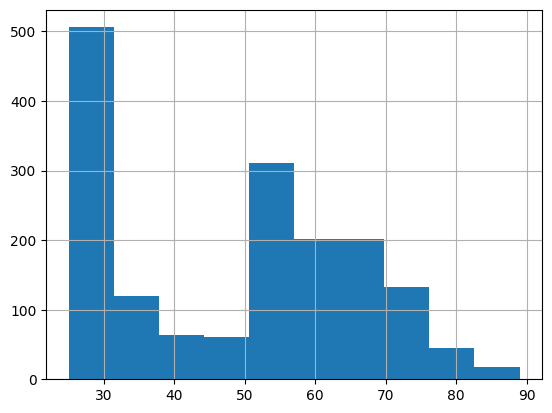

In [6]:
df.host_age.hist()

<Axes: >

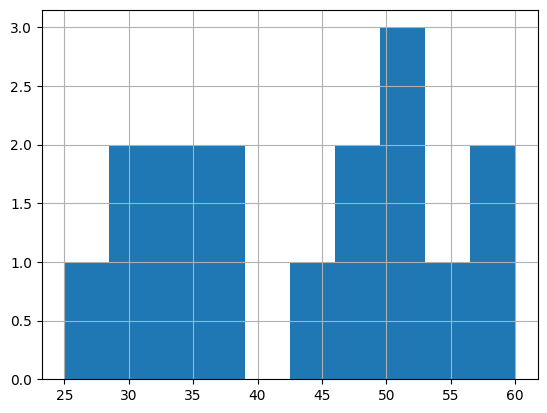

In [7]:
#df[df.phenotype == 'health'].host_age.hist()
df[df.phenotype == 'ASD'].host_age.hist()

<Axes: >

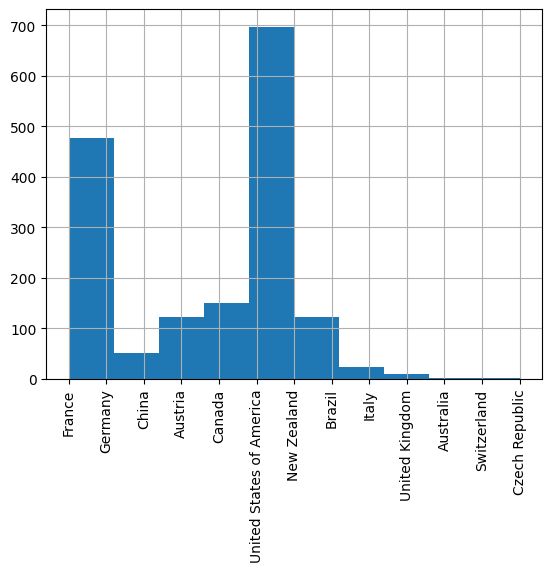

In [8]:
df.country.hist(xrot=90)

<Axes: >

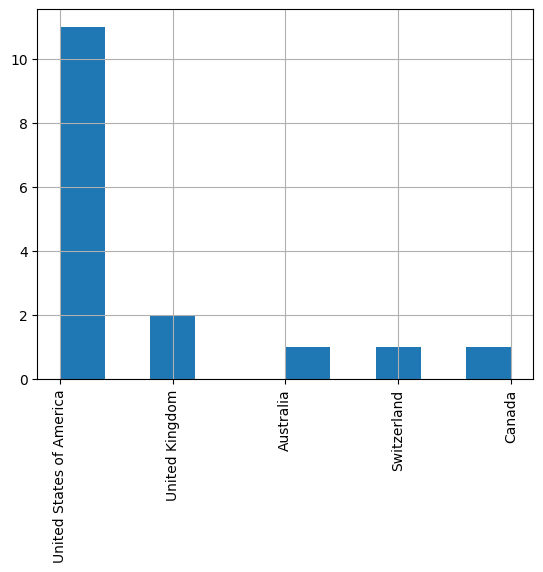

In [9]:
#df[df.phenotype == 'health'].country.hist(xrot=90)
df[df.phenotype == 'ASD'].country.hist(xrot=90)

<Axes: >

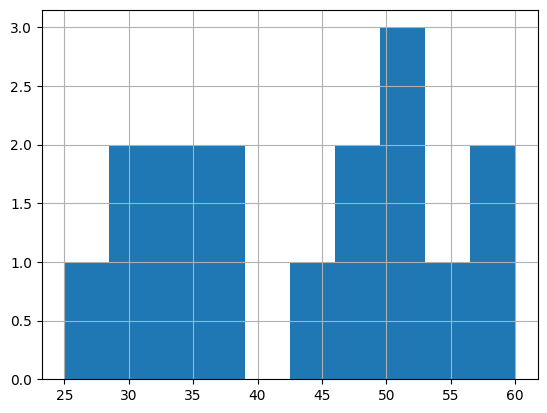

In [10]:
df[df.phenotype == 'ASD'].host_age.hist()

<Axes: >

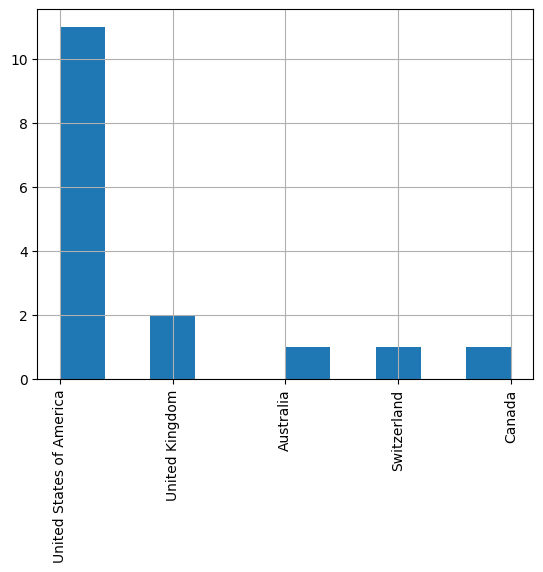

In [11]:
df[df.phenotype == 'ASD'].country.hist(xrot=90)

In [5]:
len(df)

1658

In [6]:
len(df[df.phenotype == 'ASD'])

16

In [7]:
n_models = round(len(df[df.phenotype == 'health'])/len(df[df.phenotype == 'ASD']))
n_models

101

In [8]:
dfs = []
for i in range(n_models):
    dfs.append(pd.concat([df[df.phenotype == 'ASD'], df[df.phenotype == 'health'].sample(len(df[df.phenotype == 'ASD']), random_state=41)]))

In [9]:
all_metabolites = df.columns[7:]

In [10]:
feature_importances = []
accuracies = []
specificities = []
sensitivities = []
precisions = []
f1_scores = []
roc_auc_scores = []
all_test = []
all_pred = []
all_probs = []
from statistics import mean
for df in dfs:
    X = df[all_metabolites]
    y = df.phenotype  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    clf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob =  [ x[0] for x in  clf.predict_proba(X_test)]
    all_test.extend(y_test)
    all_pred.extend(y_pred)
    all_probs.extend(y_prob)
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    specificity = tn/(tn+fp)
    sensitivity = tp/(tp+fn)
    precision = tp/(tp+fp)
    f1_score = (2*tp)/(2*tp+fp+fn)
    roc_auc_score_value = roc_auc_score([int(x) for x in (y_test == 'ASD').tolist()], y_prob)  
    print('Accuracy:',accuracy, '%')
    print('Specificity:',specificity, '%')
    print('Sensitivity:',sensitivity, '%')
    print('Precision:',precision, '%')
    print('F1 Score:',f1_score, '%')
    print('ROC AUC score:', roc_auc_score_value)
    accuracies.append(accuracy)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    f1_scores.append(f1_score)
    roc_auc_scores.append(roc_auc_score_value)
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    forest_importances = pd.DataFrame(zip(importances,std), index=all_metabolites, columns=['importance', 'std'])
    #forest_importances = forest_importances[forest_importances.importance >= forest_importances.importance.quantile(0.99)]
    feature_importances.append(forest_importances)
    #sensitivity, specificity, precision, F1-score, ROC-AUC
print("accuracy:", "mean:", mean(accuracies), "std:", np.std(accuracies))
print("specificity:", "mean:", mean(specificities), "std:", np.std(specificities))
print("sensitivity:", "mean:", mean(sensitivities), "std:", np.std(sensitivities))
print("precision:", "mean:", mean(precisions), "std:", np.std(precisions))
print("f1 score:", "mean", mean(f1_scores), "std:", np.std(f1_scores))
print("ROC AUC score:", "mean", mean(roc_auc_scores), "std:", np.std(roc_auc_scores))

Accuracy: 0.7272727272727273 %
Specificity: 0.5714285714285714 %
Sensitivity: 1.0 %
Precision: 0.5714285714285714 %
F1 Score: 0.7272727272727273 %
ROC AUC score: 0.9285714285714286
Accuracy: 0.9090909090909091 %
Specificity: 1.0 %
Sensitivity: 0.75 %
Precision: 1.0 %
F1 Score: 0.8571428571428571 %
ROC AUC score: 0.9642857142857143
Accuracy: 0.7272727272727273 %
Specificity: 1.0 %
Sensitivity: 0.4 %
Precision: 1.0 %
F1 Score: 0.5714285714285714 %
ROC AUC score: 1.0
Accuracy: 1.0 %
Specificity: 1.0 %
Sensitivity: 1.0 %
Precision: 1.0 %
F1 Score: 1.0 %
ROC AUC score: 1.0
Accuracy: 0.7272727272727273 %
Specificity: 0.8 %
Sensitivity: 0.6666666666666666 %
Precision: 0.8 %
F1 Score: 0.7272727272727273 %
ROC AUC score: 0.85
Accuracy: 1.0 %
Specificity: 1.0 %
Sensitivity: 1.0 %
Precision: 1.0 %
F1 Score: 1.0 %
ROC AUC score: 1.0
Accuracy: 0.9090909090909091 %
Specificity: 0.8571428571428571 %
Sensitivity: 1.0 %
Precision: 0.8 %
F1 Score: 0.8888888888888888 %
ROC AUC score: 1.0
Accuracy: 0.7272

Accuracy: 1.0 %
Specificity: 1.0 %
Sensitivity: 1.0 %
Precision: 1.0 %
F1 Score: 1.0 %
ROC AUC score: 1.0
Accuracy: 0.6363636363636364 %
Specificity: 0.8 %
Sensitivity: 0.5 %
Precision: 0.75 %
F1 Score: 0.6 %
ROC AUC score: 0.7666666666666666
Accuracy: 0.7272727272727273 %
Specificity: 0.75 %
Sensitivity: 0.6666666666666666 %
Precision: 0.5 %
F1 Score: 0.5714285714285714 %
ROC AUC score: 0.875
Accuracy: 0.9090909090909091 %
Specificity: 0.8333333333333334 %
Sensitivity: 1.0 %
Precision: 0.8333333333333334 %
F1 Score: 0.9090909090909091 %
ROC AUC score: 1.0
Accuracy: 0.8181818181818182 %
Specificity: 0.8333333333333334 %
Sensitivity: 0.8 %
Precision: 0.8 %
F1 Score: 0.8 %
ROC AUC score: 0.9666666666666667
Accuracy: 0.9090909090909091 %
Specificity: 1.0 %
Sensitivity: 0.8333333333333334 %
Precision: 1.0 %
F1 Score: 0.9090909090909091 %
ROC AUC score: 1.0
Accuracy: 0.8181818181818182 %
Specificity: 0.8 %
Sensitivity: 0.8333333333333334 %
Precision: 0.8333333333333334 %
F1 Score: 0.8333333

In [17]:
df = pd.concat([df[df.phenotype == 'ASD'], df[df.phenotype == 'health'].sample(16)])
X = df[all_metabolites]
y = df.phenotype

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
clf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=0)

In [20]:
y_pred = clf.predict(X_test)

In [11]:
print(classification_report(all_test, all_pred))

              precision    recall  f1-score   support

         ASD       0.91      0.86      0.88       535
      health       0.87      0.92      0.90       576

    accuracy                           0.89      1111
   macro avg       0.89      0.89      0.89      1111
weighted avg       0.89      0.89      0.89      1111



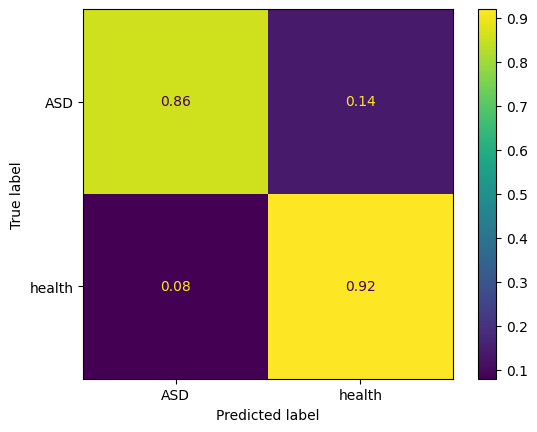

In [12]:
ConfusionMatrixDisplay.from_predictions(all_test, all_pred, normalize='true')

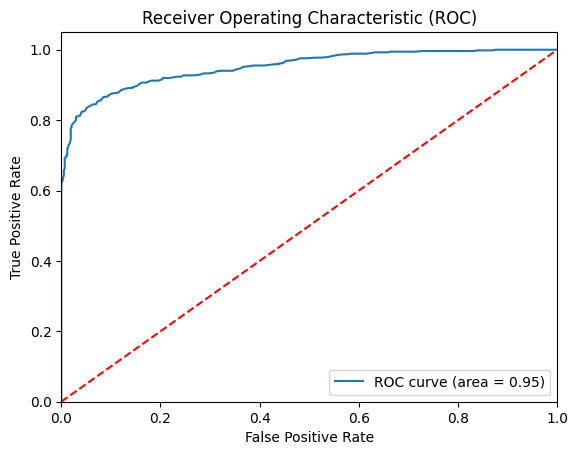

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_true = [ 1 if x=='ASD' else 0 for x in all_test]

# y_true: true binary labels (0 or 1)
# y_proba: predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_true, all_probs)
roc_auc = roc_auc_score(y_true, all_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [15]:
roc_auc

0.9509702751817237

In [23]:
import time

import numpy as np
from numpy import array

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


In [24]:
forest_importances = pd.DataFrame(zip(importances,std), index=all_metabolites, columns=['importance', 'std'])
forest_importances = forest_importances[forest_importances.importance >= forest_importances.importance.quantile(0.95)]
forest_importances

importance       std
5,6-Dimethylbenzimidazole                             0.008220  0.081789
D-glucitol                                            0.017160  0.125122
Gly-Cys                                               0.011674  0.101608
L-phenylalanine                                       0.008618  0.079222
L-arabinose                                           0.011868  0.093227
Hydrogen sulfide                                      0.010921  0.095039
Allantoin                                             0.014235  0.110811
O2                                                    0.010166  0.085843
L-alanyl-L-glutamine                                  0.008777  0.082088
Acetaldehyde                                          0.013907  0.100291
Trehalose                                             0.012856  0.107175
D-Mannitol                                            0.010789  0.096872
Maltohexaose                                          0.008306  0.083753
D-Glucosamine                                         0.008792  0.087894
N-acetylneuraminate                                   0.007812  0.079254
2-Demethylmenaquinone 8                               0.008351  0.078216
glycocholate                                          0.008130  0.080898
D-Mannose                                             0.008291  0.083608
L-tyrosine                                            0.013220  0.095922
Taurine                                               0.008340  0.078126
Succinate                                             0.010875  0.094797
Reduced riboflavin                                    0.009980  0.086281
12-Dehydrocholate                                     0.027978  0.148882
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})    0.016713  0.124290
cardiolipin (tetratetradecanoyl, n-C14:0)             0.020713  0.130489
cardiolipin (tetrahexadecanoyl, n-C16:0)              0.019589  0.129764
Siroheme                                              0.018301  0.124659
Bicarbonate                                           0.008193  0.081525
Ubiquinone-8                                          0.010670  0.086508
cardiolipin (14-methyl-pentadecanoyl, iso-C16)        0.020071  0.130075
methylammonium                                        0.017071  0.118666
butanol                                               0.019713  0.128732
gamma-linolenate                                      0.009875  0.080992
3-Dehydrocholate                                      0.009803  0.088988
5-Methylthioadenosine                                 0.009472  0.090336
3-Hydroxyphenylacetate                                0.009402  0.088656
3-methyl-2-oxopentanoate                              0.014875  0.114819
cis-Aconitate                                         0.010598  0.092424
Malonate                                              0.011167  0.100397
L-Sorbose                                             0.012871  0.107198
4-hydroxyphenylacetate                                0.008250  0.083321
Nitrogen                                              0.016088  0.123900
L-Lyxose                                              0.007773  0.077632

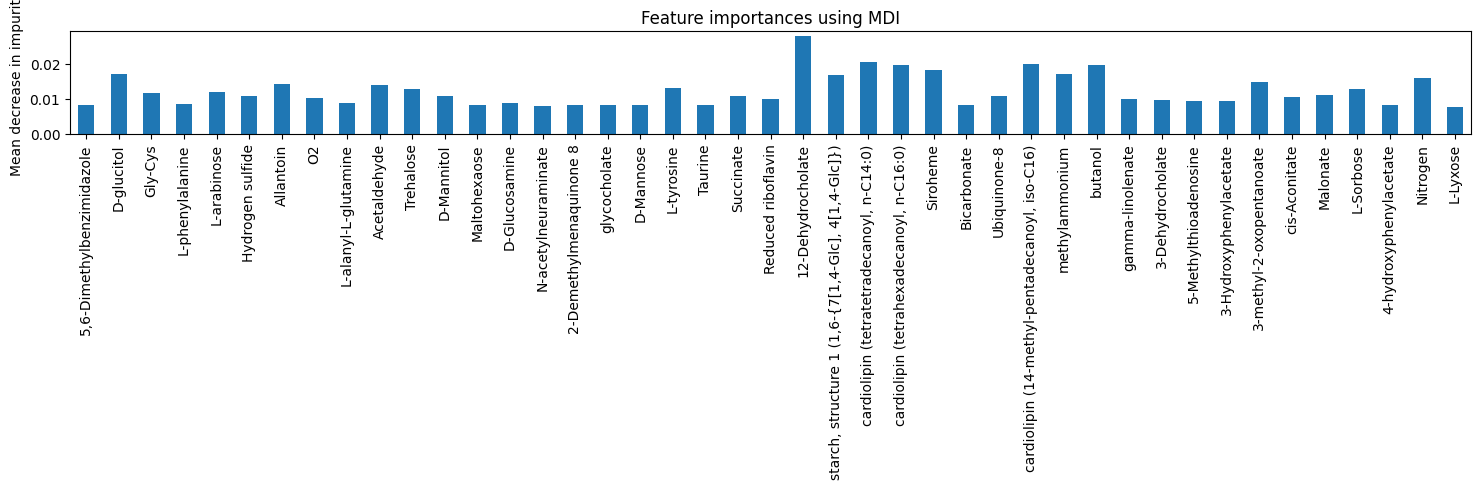

In [25]:

fig, ax = plt.subplots()
forest_importances.importance.plot.bar(ax=ax, figsize=(15,5))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
df3 = pd.concat(feature_importances)
df3 = df3.groupby(df3.index).mean()
len(df3)

855

In [27]:
forest_importances = df3[df3.importance >= df3.importance.quantile(0.95)]

In [28]:
len(forest_importances)

43

In [29]:
print('\n'.join(forest_importances.index.tolist()))

(R)-3-(4-Hydroxyphenyl)propionate
12-Dehydrocholate
3-Dehydrocholate
3-methyl-2-oxopentanoate
Acetaldehyde
Arbutin
Bicarbonate
Butyrate
D-Glucosamine
D-Mannitol
D-glucarate(2-)
D-glucitol
Glutarate
Gly-Cys
Glycyl-L-tyrosine
Hydrogen sulfide
Hydroquinone
L-Sorbose
L-alanyl-L-histidine
L-isoleucine
L-tyrosine
Malonate
Maltohexaose
N-acetyl-D-glucosamine
N-acetyl-D-mannosamine
Nitrogen
O2
Reduced riboflavin
Resistant starch
Siroheme
Succinate
Taurine
Trehalose
Ubiquinone-8
butanol
cardiolipin (14-methyl-pentadecanoyl, iso-C16)
cardiolipin (tetrahexadecanoyl, n-C16:0)
cardiolipin (tetratetradecanoyl, n-C14:0)
chenodeoxycholate
glycochenodeoxycholate
methylammonium
spermine(4+)
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})


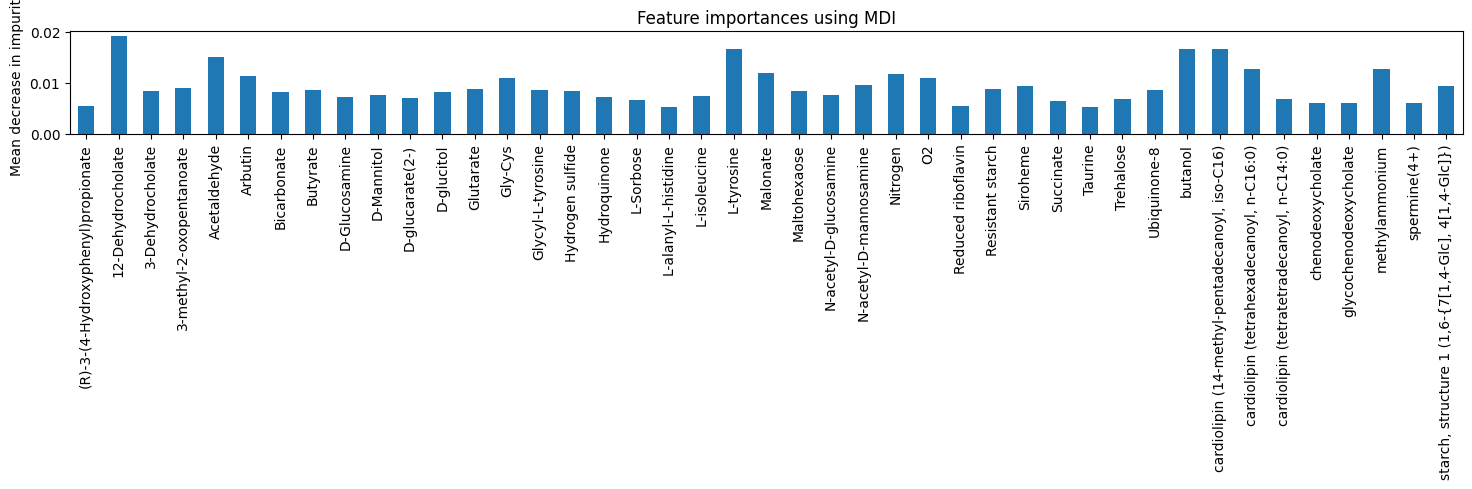

In [30]:
fig, ax = plt.subplots()
forest_importances.importance.plot.bar(ax=ax, figsize=(15,5))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
list(forest_importances.index)

['(R)-3-(4-Hydroxyphenyl)propionate',
 '12-Dehydrocholate',
 '3-Dehydrocholate',
 '3-methyl-2-oxopentanoate',
 'Acetaldehyde',
 'Arbutin',
 'Bicarbonate',
 'Butyrate',
 'D-Glucosamine',
 'D-Mannitol',
 'D-glucarate(2-)',
 'D-glucitol',
 'Glutarate',
 'Gly-Cys',
 'Glycyl-L-tyrosine',
 'Hydrogen sulfide',
 'Hydroquinone',
 'L-Sorbose',
 'L-alanyl-L-histidine',
 'L-isoleucine',
 'L-tyrosine',
 'Malonate',
 'Maltohexaose',
 'N-acetyl-D-glucosamine',
 'N-acetyl-D-mannosamine',
 'Nitrogen',
 'O2',
 'Reduced riboflavin',
 'Resistant starch',
 'Siroheme',
 'Succinate',
 'Taurine',
 'Trehalose',
 'Ubiquinone-8',
 'butanol',
 'cardiolipin (14-methyl-pentadecanoyl, iso-C16)',
 'cardiolipin (tetrahexadecanoyl, n-C16:0)',
 'cardiolipin (tetratetradecanoyl, n-C14:0)',
 'chenodeoxycholate',
 'glycochenodeoxycholate',
 'methylammonium',
 'spermine(4+)',
 'starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})']

# Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, x, y, title):
    result = permutation_importance(model, x, y, n_repeats=10, random_state=0)
    df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': result.importances_mean})
    df = df[df.feature_importance >= df.feature_importance.quantile(0.95)]
    plt.figure(figsize=(20, 20))
    sns.barplot(data=df, x='feature_importance', y='feature_name')
    plt.title(title)
    plt.show()

plot_feature_importances(clf, X_test, y_test, 'All test data')

y_pred = clf.predict(X_test)
plot_feature_importances(clf, X_test[y_pred == 'ASD'], y_test[y_pred == 'ASD'], 'Predicted as "ASD"')
plot_feature_importances(clf, X_test[y_pred == 'health'], y_test[y_pred == 'health'], 'Predicted as "Health"')

In [ ]:
from sklearn.inspection import permutation_importance
feature_importances = []
accuracies = []
from statistics import mean
for df in dfs:
    X = df[all_metabolites]
    y = df.phenotype  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)*100
    print('Accuracy:',accuracy, '%')
    accuracies.append(accuracy)
    result = permutation_importance(clf, X_test[y_pred == 'ASD'], y_test[y_pred == 'ASD'], n_repeats=20, random_state=42)
    forest_importances = pd.DataFrame({'feature_name': X_test.columns, 'feature_importance': result.importances_mean})
    #forest_importances = forest_importances[forest_importances.feature_importance >= forest_importances.feature_importance.quantile(0.95)]
    feature_importances.append(forest_importances)
print("mean accuracy", mean(accuracies), '%')

In [ ]:
feature_importances[0].head()

In [ ]:
df3 = pd.concat(feature_importances)
df3 = df3.groupby(df3.feature_name).mean()
len(df3)

In [ ]:
forest_importances = df3[df3.feature_importance >= df3.feature_importance.quantile(0.95)]

In [ ]:
df3.head()

In [124]:
df3.to_csv('importances_with_perm_ASD.csv')

In [125]:
def plot_feature_importances(df, title):
    plt.figure(figsize=(20, 20))
    sns.barplot(data=df, x='feature_importance', y='feature_name')
    plt.title(title)
    plt.show()

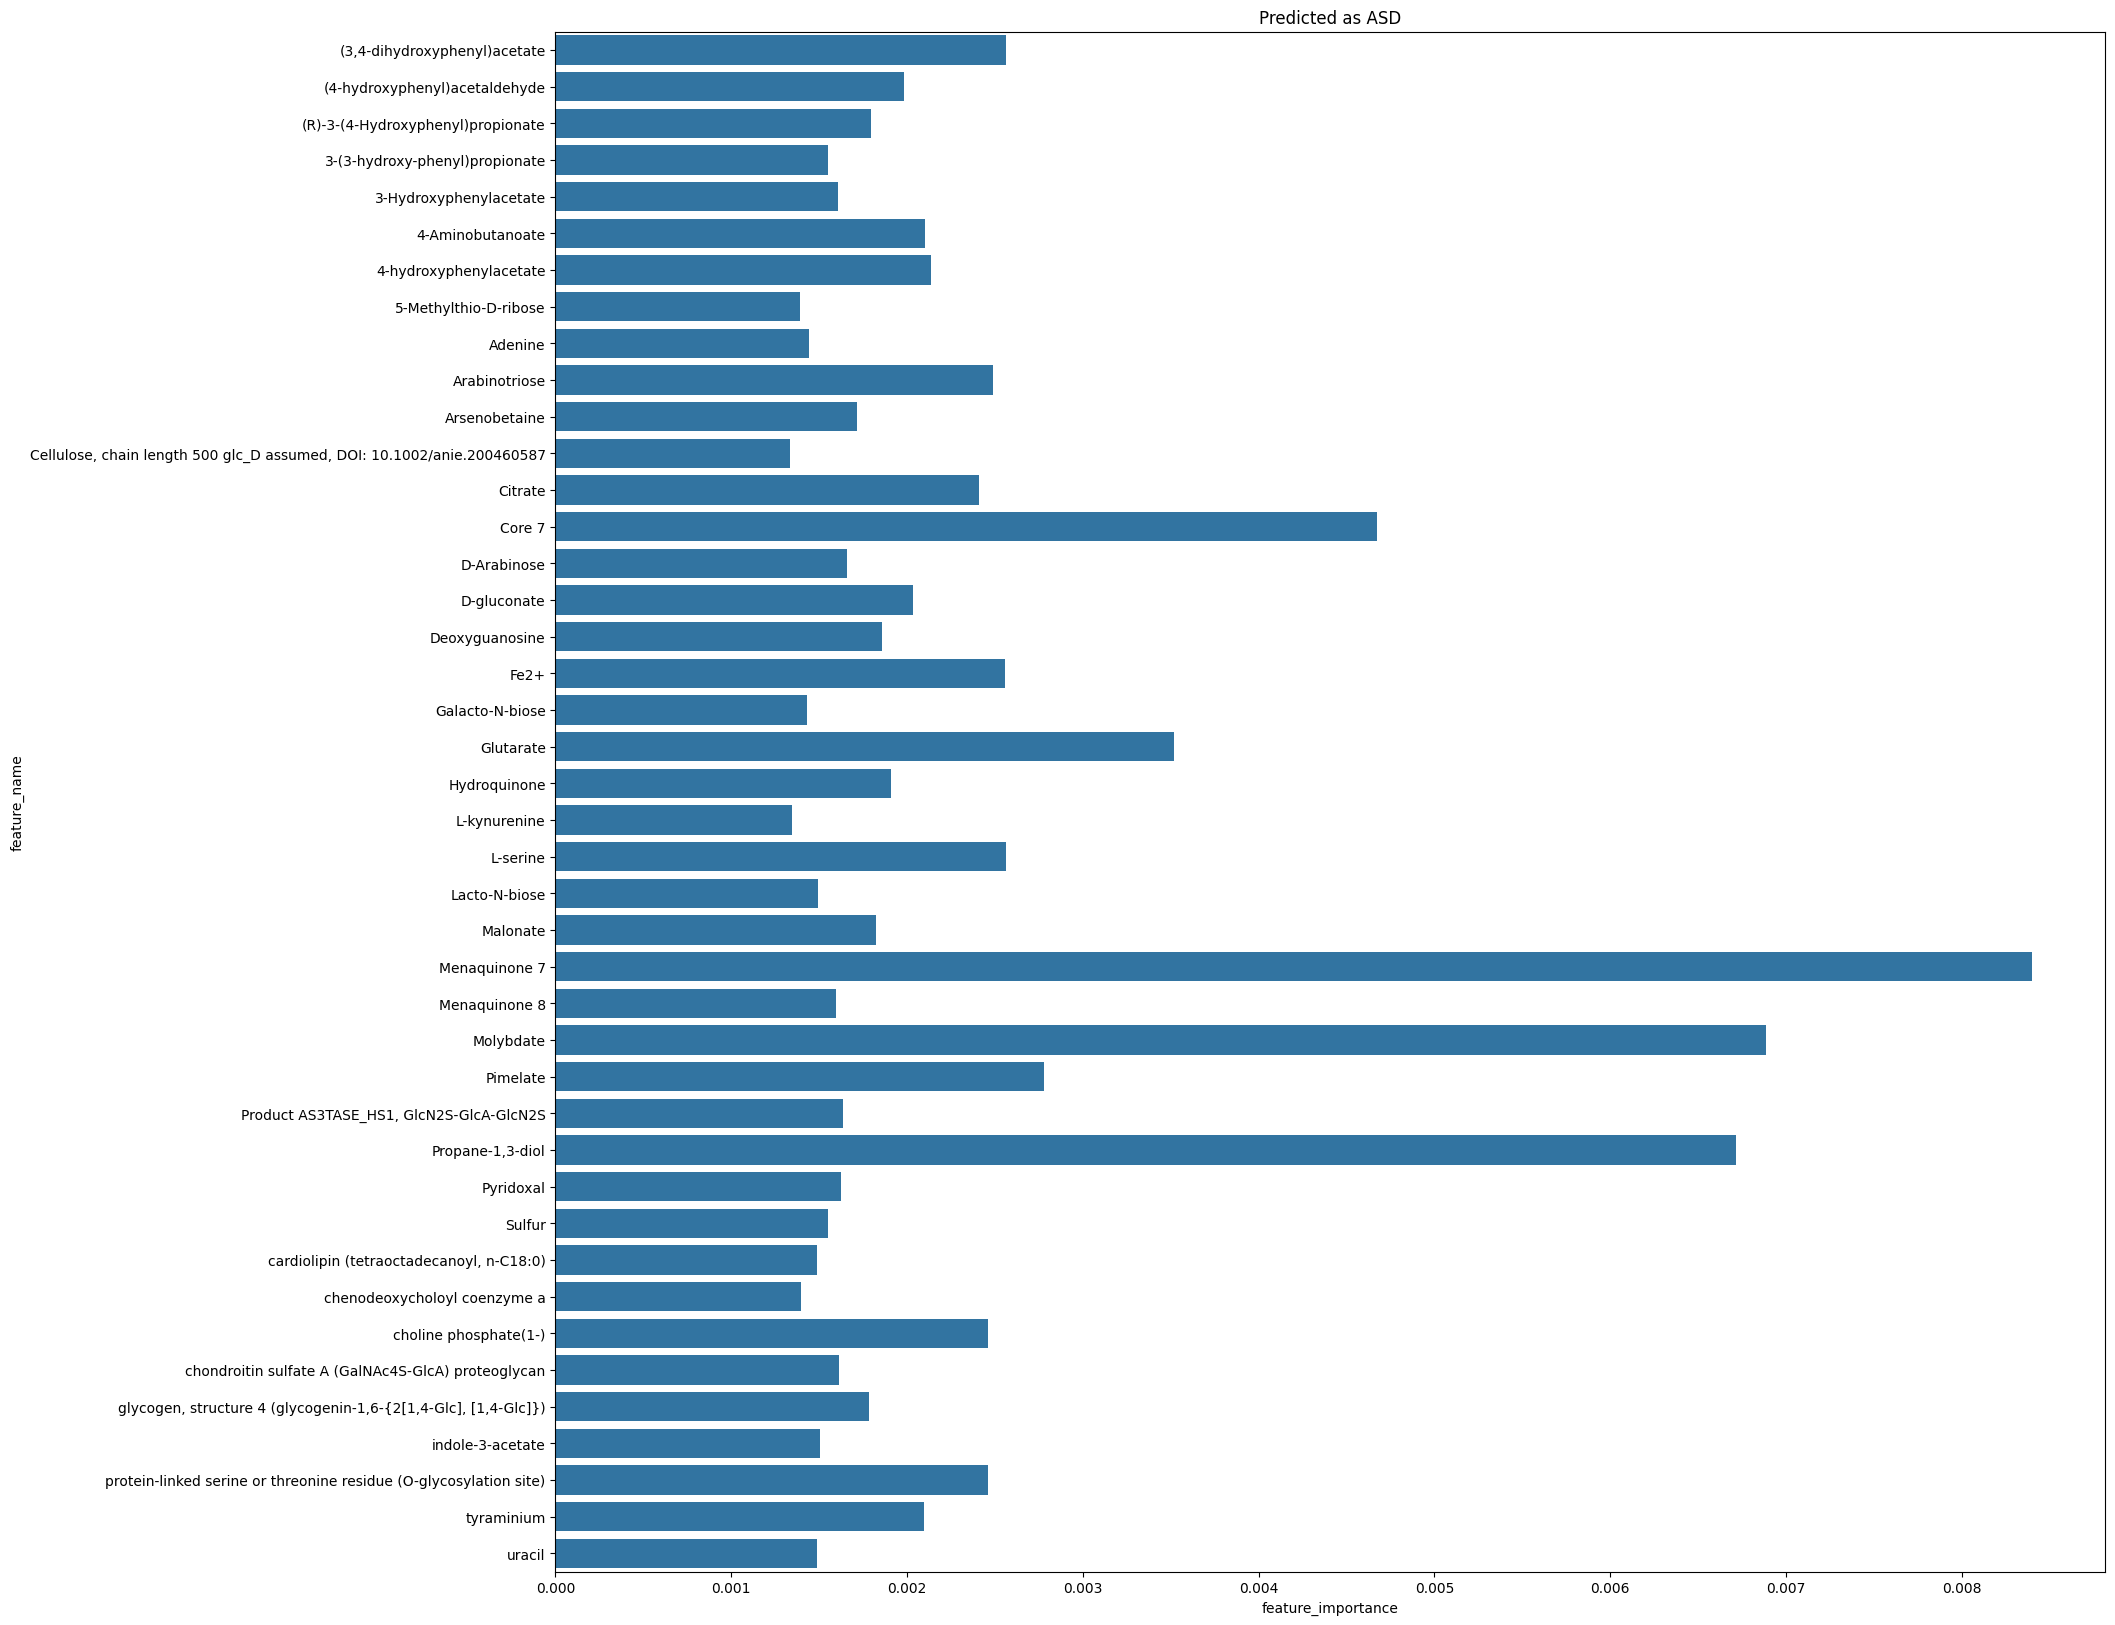

In [126]:
plot_feature_importances(forest_importances, 'Predicted as ASD')

In [ ]:
plot_feature_importances(df3, 'Predicted as "ASD')

In [ ]:
plot_feature_importances(df3, 'Predicted as "Health')

# Shap Explainer

In [32]:
clf.classes_

array(['ASD', 'health'], dtype=object)

In [33]:
import shap

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

C:\Users\rober\anaconda3\envs\Compass\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
shap_values[:,:,1] == shap_values[:,:,0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

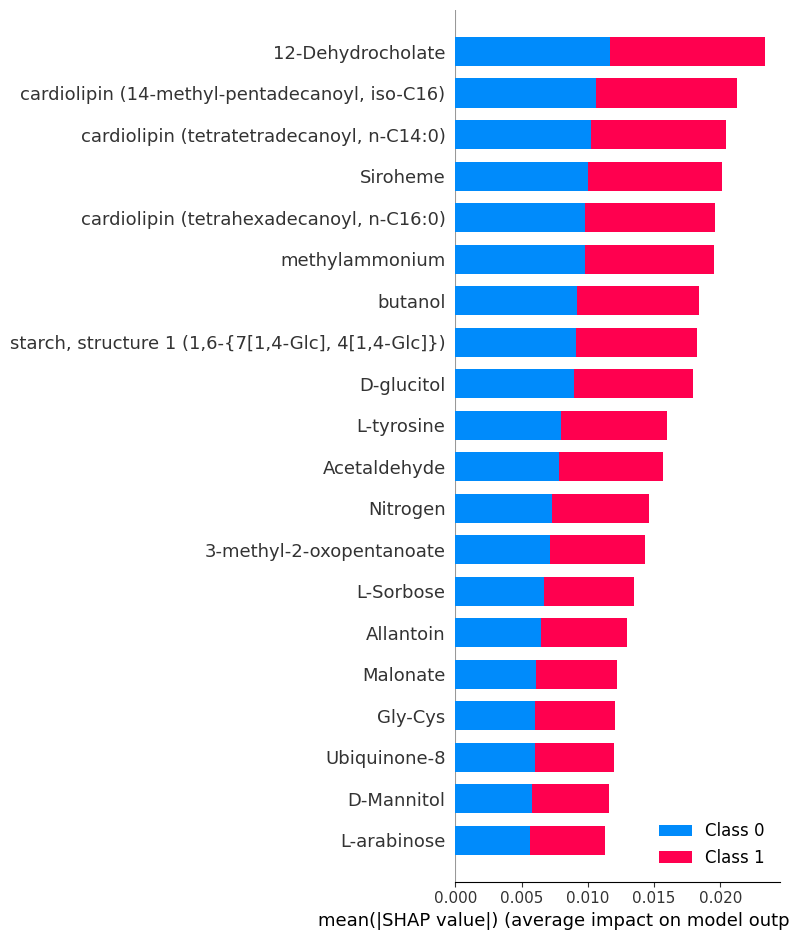

In [35]:
shap.summary_plot([shap_values[:,:,0], shap_values[:,:,1]], X_test, max_display=20, plot_type='bar')

In [36]:
feature_importances = []
accuracies = []
from statistics import mean
for df in dfs:
    X = df[all_metabolites]
    y = df.phenotype  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)*100
    print('Accuracy:',accuracy, '%')
    accuracies.append(accuracy)
    shap_values = explainer.shap_values(X_test)
    feature_importances.append(shap_values)
print("mean accuracy", mean(accuracies), '%')

Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 72.72727272727273 %
Accuracy: 100.0 %
Accuracy: 72.72727272727273 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 72.72727272727273 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 81.81818181818183 %
Accuracy: 100.0 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 72.72727272727273 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 100.0 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 90.9090909090909 %
Accuracy: 100.0 %
Accuracy: 81.81818181818183 %
Accuracy: 90.9090909090909 %
Accuracy: 

In [37]:
feature_importances = np.array(feature_importances)

In [38]:
shap_values = feature_importances.mean(axis=0)

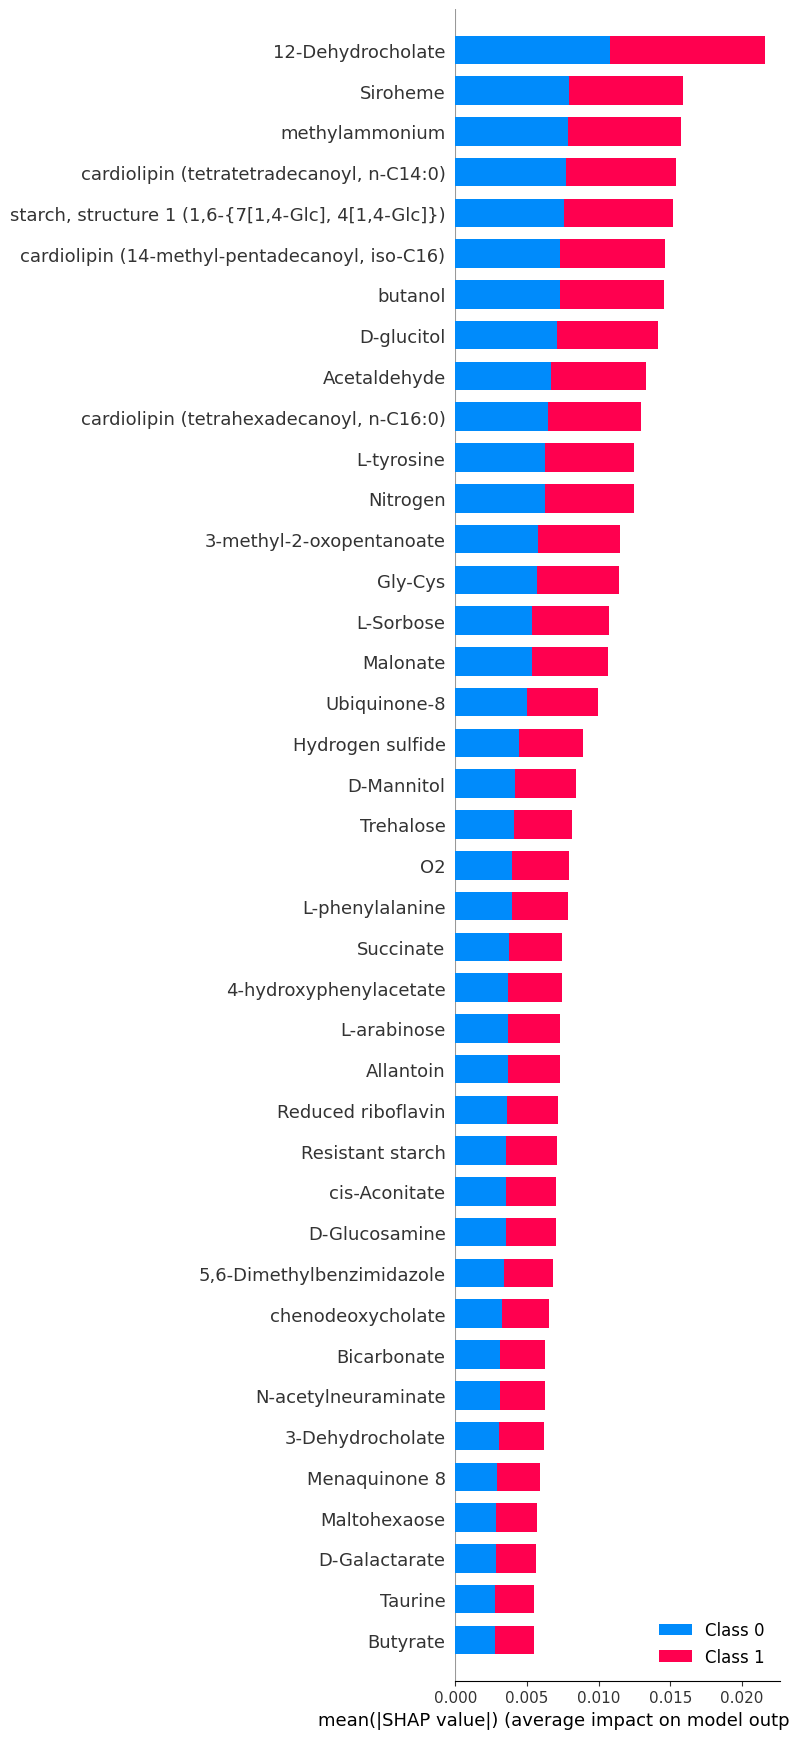

In [39]:
shap.summary_plot([shap_values[:,:,0], shap_values[:,:,1]], X_test, max_display=40, plot_type='bar')

In [40]:
df_important_features = df[list(forest_importances.index) + ['phenotype']].groupby('phenotype').mean()

In [41]:
df_important_features.head()

(R)-3-(4-Hydroxyphenyl)propionate  12-Dehydrocholate  \
phenotype                                                         
ASD                                 0.129930           1.471964   
health                              0.027372          13.931232   

           3-Dehydrocholate  3-methyl-2-oxopentanoate  Acetaldehyde  \
phenotype                                                             
ASD                1.934472                  0.508172      4.242218   
health             3.130443                  0.076359     35.521533   

             Arbutin  Bicarbonate   Butyrate  D-Glucosamine  D-Mannitol  ...  \
phenotype                                                                ...   
ASD        13.791872     0.117675   8.753925      20.420811   16.901326  ...   
health     53.968462     3.008852  25.742809      56.146714   50.769691  ...   

           Ubiquinone-8   butanol  \
phenotype                           
ASD            2.977229  0.009748   
health        13.785354  1.505965   

           cardiolipin (14-methyl-pentadecanoyl, iso-C16)  \
phenotype                                                   
ASD                                              2.234869   
health                                          19.161284   

           cardiolipin (tetrahexadecanoyl, n-C16:0)  \
phenotype                                             
ASD                                        2.237583   
health                                    19.161284   

           cardiolipin (tetratetradecanoyl, n-C14:0)  chenodeoxycholate  \
phenotype                                                                 
ASD                                         3.170888          25.692336   
health                                     19.898500          67.653467   

           glycochenodeoxycholate  methylammonium  spermine(4+)  \
phenotype                                                         
ASD                     23.198845        0.294540      0.139364   
health                  63.806149       12.900074      0.009004   

           starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})  
phenotype                                                      
ASD                                                 9.241457   
health                                             27.491663   

[2 rows x 43 columns]

In [42]:
ratios = []
for column in df_important_features.columns:
    ratios.append(np.log10(df_important_features.loc['ASD', column]/df_important_features.loc['health', column]))

In [43]:
df_t = pd.DataFrame(ratios).T

In [44]:
df_t.columns = df_important_features.columns

In [45]:
df_t

(R)-3-(4-Hydroxyphenyl)propionate  12-Dehydrocholate  3-Dehydrocholate  \
0                           0.676403          -0.976092         -0.209043   

   3-methyl-2-oxopentanoate  Acetaldehyde   Arbutin  Bicarbonate  Butyrate  \
0                  0.823152     -0.922899 -0.592517    -1.407717 -0.468453   

   D-Glucosamine  D-Mannitol  ...  Ubiquinone-8   butanol  \
0      -0.439251   -0.477684  ...     -0.665606 -2.188887   

   cardiolipin (14-methyl-pentadecanoyl, iso-C16)  \
0                                       -0.933173   

   cardiolipin (tetrahexadecanoyl, n-C16:0)  \
0                                 -0.932645   

   cardiolipin (tetratetradecanoyl, n-C14:0)  chenodeoxycholate  \
0                                   -0.79764          -0.420486   

   glycochenodeoxycholate  methylammonium  spermine(4+)  \
0               -0.439396       -1.641447      1.189716   

   starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})  
0                                          -0.473461   

[1 rows x 43 columns]

In [46]:
ratio = df_t.T

In [47]:
ratio

0
(R)-3-(4-Hydroxyphenyl)propionate                   0.676403
12-Dehydrocholate                                  -0.976092
3-Dehydrocholate                                   -0.209043
3-methyl-2-oxopentanoate                            0.823152
Acetaldehyde                                       -0.922899
Arbutin                                            -0.592517
Bicarbonate                                        -1.407717
Butyrate                                           -0.468453
D-Glucosamine                                      -0.439251
D-Mannitol                                         -0.477684
D-glucarate(2-)                                     1.050180
D-glucitol                                         -0.485170
Glutarate                                           0.398559
Gly-Cys                                            -0.485220
Glycyl-L-tyrosine                                  -0.433247
Hydrogen sulfide                                   -0.410913
Hydroquinone                                       -0.623861
L-Sorbose                                           0.335462
L-alanyl-L-histidine                               -0.630247
L-isoleucine                                       -0.818273
L-tyrosine                                         -0.731551
Malonate                                           -0.047516
Maltohexaose                                       -0.571186
N-acetyl-D-glucosamine                             -0.396152
N-acetyl-D-mannosamine                              0.904886
Nitrogen                                            2.202211
O2                                                 -0.540341
Reduced riboflavin                                 -0.997813
Resistant starch                                   -1.555323
Siroheme                                           -0.643475
Succinate                                          -0.258017
Taurine                                            -0.346790
Trehalose                                          -0.463945
Ubiquinone-8                                       -0.665606
butanol                                            -2.188887
cardiolipin (14-methyl-pentadecanoyl, iso-C16)     -0.933173
cardiolipin (tetrahexadecanoyl, n-C16:0)           -0.932645
cardiolipin (tetratetradecanoyl, n-C14:0)          -0.797640
chenodeoxycholate                                  -0.420486
glycochenodeoxycholate                             -0.439396
methylammonium                                     -1.641447
spermine(4+)                                        1.189716
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]}) -0.473461

In [48]:
ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

In [49]:
ratio

0
(R)-3-(4-Hydroxyphenyl)propionate                   0.676403
12-Dehydrocholate                                  -0.976092
3-Dehydrocholate                                   -0.209043
3-methyl-2-oxopentanoate                            0.823152
Acetaldehyde                                       -0.922899
Arbutin                                            -0.592517
Bicarbonate                                        -1.407717
Butyrate                                           -0.468453
D-Glucosamine                                      -0.439251
D-Mannitol                                         -0.477684
D-glucarate(2-)                                     1.050180
D-glucitol                                         -0.485170
Glutarate                                           0.398559
Gly-Cys                                            -0.485220
Glycyl-L-tyrosine                                  -0.433247
Hydrogen sulfide                                   -0.410913
Hydroquinone                                       -0.623861
L-Sorbose                                           0.335462
L-alanyl-L-histidine                               -0.630247
L-isoleucine                                       -0.818273
L-tyrosine                                         -0.731551
Malonate                                           -0.047516
Maltohexaose                                       -0.571186
N-acetyl-D-glucosamine                             -0.396152
N-acetyl-D-mannosamine                              0.904886
Nitrogen                                            2.202211
O2                                                 -0.540341
Reduced riboflavin                                 -0.997813
Resistant starch                                   -1.555323
Siroheme                                           -0.643475
Succinate                                          -0.258017
Taurine                                            -0.346790
Trehalose                                          -0.463945
Ubiquinone-8                                       -0.665606
butanol                                            -2.188887
cardiolipin (14-methyl-pentadecanoyl, iso-C16)     -0.933173
cardiolipin (tetrahexadecanoyl, n-C16:0)           -0.932645
cardiolipin (tetratetradecanoyl, n-C14:0)          -0.797640
chenodeoxycholate                                  -0.420486
glycochenodeoxycholate                             -0.439396
methylammonium                                     -1.641447
spermine(4+)                                        1.189716
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]}) -0.473461

In [50]:
ratio.dropna(how="all", inplace=True)

In [51]:
ratio

0
(R)-3-(4-Hydroxyphenyl)propionate                   0.676403
12-Dehydrocholate                                  -0.976092
3-Dehydrocholate                                   -0.209043
3-methyl-2-oxopentanoate                            0.823152
Acetaldehyde                                       -0.922899
Arbutin                                            -0.592517
Bicarbonate                                        -1.407717
Butyrate                                           -0.468453
D-Glucosamine                                      -0.439251
D-Mannitol                                         -0.477684
D-glucarate(2-)                                     1.050180
D-glucitol                                         -0.485170
Glutarate                                           0.398559
Gly-Cys                                            -0.485220
Glycyl-L-tyrosine                                  -0.433247
Hydrogen sulfide                                   -0.410913
Hydroquinone                                       -0.623861
L-Sorbose                                           0.335462
L-alanyl-L-histidine                               -0.630247
L-isoleucine                                       -0.818273
L-tyrosine                                         -0.731551
Malonate                                           -0.047516
Maltohexaose                                       -0.571186
N-acetyl-D-glucosamine                             -0.396152
N-acetyl-D-mannosamine                              0.904886
Nitrogen                                            2.202211
O2                                                 -0.540341
Reduced riboflavin                                 -0.997813
Resistant starch                                   -1.555323
Siroheme                                           -0.643475
Succinate                                          -0.258017
Taurine                                            -0.346790
Trehalose                                          -0.463945
Ubiquinone-8                                       -0.665606
butanol                                            -2.188887
cardiolipin (14-methyl-pentadecanoyl, iso-C16)     -0.933173
cardiolipin (tetrahexadecanoyl, n-C16:0)           -0.932645
cardiolipin (tetratetradecanoyl, n-C14:0)          -0.797640
chenodeoxycholate                                  -0.420486
glycochenodeoxycholate                             -0.439396
methylammonium                                     -1.641447
spermine(4+)                                        1.189716
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]}) -0.473461

In [52]:
ratio.columns = ['ratio']

In [53]:
ratio

ratio
(R)-3-(4-Hydroxyphenyl)propionate                   0.676403
12-Dehydrocholate                                  -0.976092
3-Dehydrocholate                                   -0.209043
3-methyl-2-oxopentanoate                            0.823152
Acetaldehyde                                       -0.922899
Arbutin                                            -0.592517
Bicarbonate                                        -1.407717
Butyrate                                           -0.468453
D-Glucosamine                                      -0.439251
D-Mannitol                                         -0.477684
D-glucarate(2-)                                     1.050180
D-glucitol                                         -0.485170
Glutarate                                           0.398559
Gly-Cys                                            -0.485220
Glycyl-L-tyrosine                                  -0.433247
Hydrogen sulfide                                   -0.410913
Hydroquinone                                       -0.623861
L-Sorbose                                           0.335462
L-alanyl-L-histidine                               -0.630247
L-isoleucine                                       -0.818273
L-tyrosine                                         -0.731551
Malonate                                           -0.047516
Maltohexaose                                       -0.571186
N-acetyl-D-glucosamine                             -0.396152
N-acetyl-D-mannosamine                              0.904886
Nitrogen                                            2.202211
O2                                                 -0.540341
Reduced riboflavin                                 -0.997813
Resistant starch                                   -1.555323
Siroheme                                           -0.643475
Succinate                                          -0.258017
Taurine                                            -0.346790
Trehalose                                          -0.463945
Ubiquinone-8                                       -0.665606
butanol                                            -2.188887
cardiolipin (14-methyl-pentadecanoyl, iso-C16)     -0.933173
cardiolipin (tetrahexadecanoyl, n-C16:0)           -0.932645
cardiolipin (tetratetradecanoyl, n-C14:0)          -0.797640
chenodeoxycholate                                  -0.420486
glycochenodeoxycholate                             -0.439396
methylammonium                                     -1.641447
spermine(4+)                                        1.189716
starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]}) -0.473461

<Axes: >

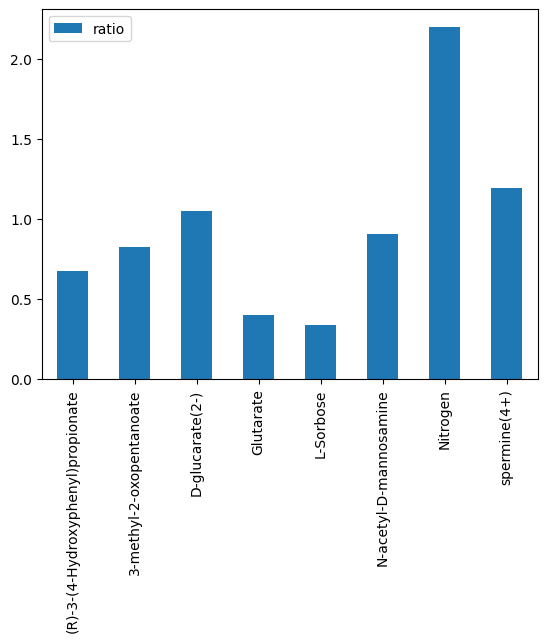

In [54]:
ratio[(ratio.ratio > 0)].plot.bar()

<Axes: >

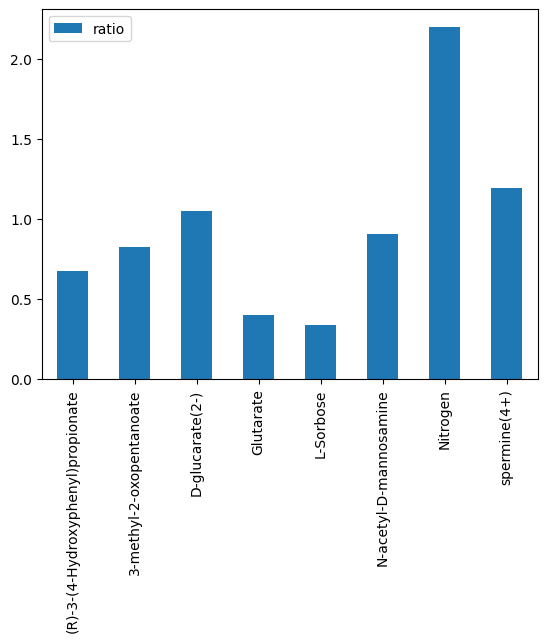

In [55]:
ratio[(ratio.ratio > 0) & (ratio.ratio < 300)].plot.bar()

<Axes: >

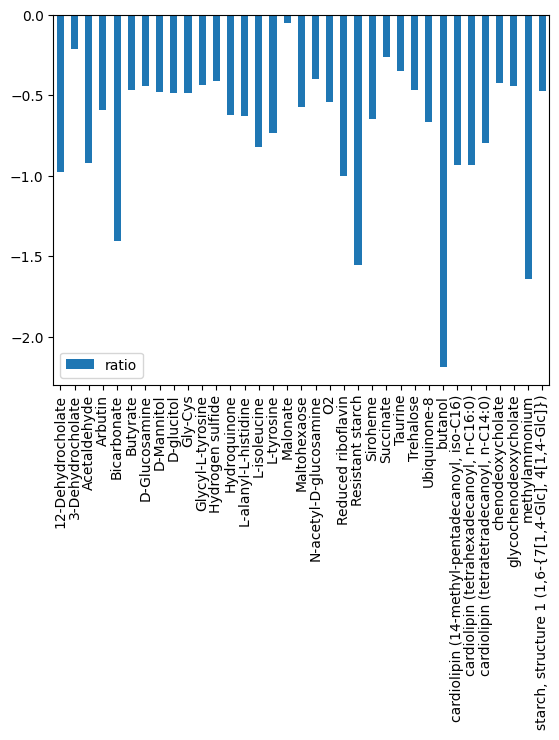

In [56]:
ratio[ratio.ratio < 0].plot.bar()

<Axes: >

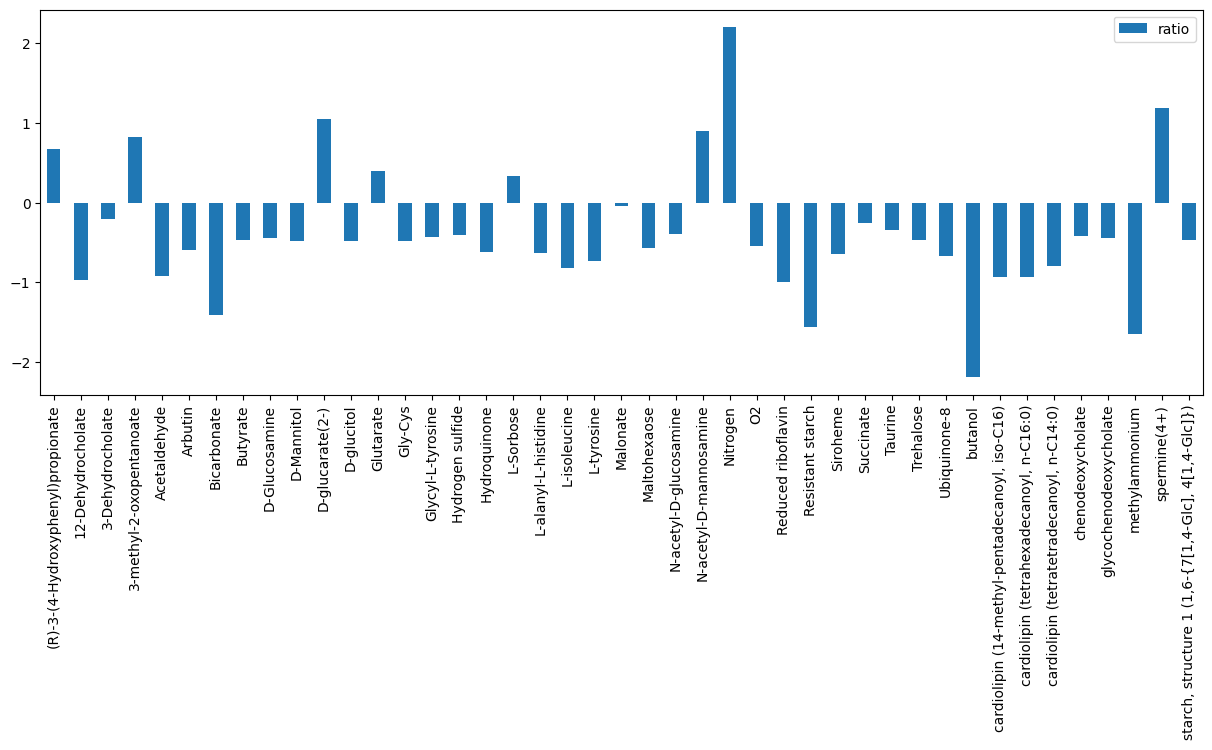

In [57]:
ratio.plot.bar(figsize=(15,5))